# [T-Academy X KaKr] 성인 인구조사 소득 예측 대회

### 목적: 94년 미국 성인을 대상으로 한 조사를 통해 연소득이 $50,000 이 넘는지 안 넘는지 구분하기

# Load Library

In [60]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
pd.options.display.max_rows=150
%matplotlib inline

# Load Data

In [3]:
data = pd.read_csv('/home/theo/aiffel/data_represent/data/kakr-4th-competition/train.csv')
df = data.copy()
print(df.shape)
df.head()

(26049, 16)


id  age workclass  fnlwgt     education  education_num      marital_status  \
0   0   40   Private  168538       HS-grad              9  Married-civ-spouse   
1   1   17   Private  101626           9th              5       Never-married   
2   2   18   Private  353358  Some-college             10       Never-married   
3   3   21   Private  151158  Some-college             10       Never-married   
4   4   24   Private  122234  Some-college             10       Never-married   

          occupation   relationship   race     sex  capital_gain  \
0              Sales        Husband  White    Male             0   
1  Machine-op-inspct      Own-child  White    Male             0   
2      Other-service      Own-child  White    Male             0   
3     Prof-specialty      Own-child  White  Female             0   
4       Adm-clerical  Not-in-family  Black  Female             0   

   capital_loss  hours_per_week native_country income  
0             0              60  United-States   >50K  
1             0              20  United-States  <=50K  
2             0              16  United-States  <=50K  
3             0              25  United-States  <=50K  
4             0              20              ?  <=50K

In [4]:
data_test = pd.read_csv('/home/theo/aiffel/data_represent/data/kakr-4th-competition/test.csv')
df_t = data_test.copy()
print(df_t.shape)
df_t.head()

(6512, 15)


id  age     workclass  fnlwgt     education  education_num  \
0   0   28       Private   67661  Some-college             10   
1   1   40  Self-emp-inc   37869       HS-grad              9   
2   2   20       Private  109952  Some-college             10   
3   3   40       Private  114537     Assoc-voc             11   
4   4   37       Private   51264     Doctorate             16   

       marital_status         occupation    relationship   race     sex  \
0       Never-married       Adm-clerical  Other-relative  White  Female   
1  Married-civ-spouse    Exec-managerial         Husband  White    Male   
2       Never-married  Handlers-cleaners       Own-child  White    Male   
3  Married-civ-spouse    Exec-managerial         Husband  White    Male   
4  Married-civ-spouse     Prof-specialty         Husband  White    Male   

   capital_gain  capital_loss  hours_per_week native_country  
0             0             0              40  United-States  
1             0             0              50  United-States  
2             0             0              25  United-States  
3             0             0              50  United-States  
4             0             0              99         France

# Data Profiling

In [5]:
profile = df.profile_report()
profile

# Data Profile

###### 요약 

1. 총 26049 row, 6columns
2. null 값이 없다!

###### Columns 설명

* id: 각 개인의 고유한 ID


* age : 나이
  * 17세에서 90세까지
  * 누운 호리병 모양의 분포를 보여줍니다.
  
  
* workclass : 고용 형태
  * 총 9개의 고용 형태입니다.
    * Private: 자영업, 18123명, 69.6%	 
    * Self-emp-not-inc: 법인 없는 개인 사업가, 2030명, 7.8%	 
    * Local-gov: Local 정부 소속, 1692명, 6.5%	 
    * ?: 직업 알 수 없음, 1502명,	5.8%	 
    * State-gov: State 정부 소속, 1043명, 4.0%
    * Self-emp-inc: 법인이 있는 개인 사업가, 877명, 3.4%	 
    * Federal-gov: Federal 정부 소속, 765명,	2.9%	 
    * Without-pay: 돈 안 받음.., 11명, < 0.1%	 
    * Never-worked: 일 안 함, 6명, < 0.1%
    
    
* fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
  * 사후 층화 가중치, 한 표본이 몇 개를 대표하는지 의미합니다. 
    (e.g. 모집단의 남녀 비율이 45%,55%인데 표본에서 60%,40% 일 경우 가중치를 주어 조정을 해줍니다.)
  * 값이 168538 일 경우, 이런 특성 가진 사람이 168538명 있다 라는 의미
  * 최솟값 ~ 최댓값 (13769 ~ 	1484705)
 
 
* education : 교육 수준
  * 총 16개의 교육 수준을 나타냅니다.
    * Bachelors(4년제학사)
    * Some-college(전문대)
    * 11th
    * HS-grad
    * Prof-school
    * Assoc-acdm 
    * Assoc-voc 
    * 9th
    * 7th-8th
    * 12th
    * Masters
    * 1st-4th
    * 10th
    * Doctorate
    * 5th-6th
    * Preschool
  
  
* education_num : 교육 수준 수치 (교육 받은 햇수)
  * education을 친절하게도 햇수로 표현했습니다.
  * 높을 수록 교육을 오래 받았습니다.
  
  
* marital_status: 결혼 상태
  * Married-civ-spouse: 기혼,	11970명,	46.0%	 
  * Never-married: 미혼, 8568명, 32.9%	 
  * Divorced: 이혼, 3536명, 13.6%	 
  * Separated: 별거(법적 별거, 결혼 불화, 이혼 직전 등), 826명, 3.2%	 
  * Widowed: 사별, 796명, 3.1%	 
  * Married-spouse-absent: 별거(직업 등의 사유로), 334명,	1.3%	 
  * Married-AF-spouse: 별거(군인), 19명,	0.1%


* occupation : 업종(직업)
  * 총 15개 업종
  * Tech-support(기술자), Craft-repair(기능공), Other-service(제3서비스업), Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.


* relationship : 가족 관계
  * Husband: 남편	10541	40.5%	 
  * Not-in-family: 가족없음	6632	25.5%	 
  * Own-child: 아이 있음	4099	15.7%	 
  * Unmarried: 결혼 안 함	2740	10.5%	 
  * Wife: 아내	1260	4.8%	 
  * Other-relative: 그 외 관계	777	3.0%


* race : 인종
  * White	22315	85.7%	 
  * Black	2476	9.5%	 
  * Asian-Pac-Islander	800	3.1%	 
  * Amer-Indian-Eskimo	254	1.0%	 
  * Other	204	0.8%	


* sex : 성별
  * Male	17482	67.1%	 
  * Female	8567	32.9%


* capital_gain : 양도 소득, 자본 소득
  * 0에서 99999 까지 인데 추가 확인 필요


* capital_loss : 양도 손실
  * 0에서 4356


* hours_per_week : 주당 근무 시간
  * 1시간에서 99시간까지


* native_country : 국적
  * 총 41개국
  
  
* income : 수익 (예측해야 하는 값)
  * 50K 이하	19744	75.8%	 
  * 50K 초과	6305	24.2%

In [6]:
# 94년 미국에서 연소득 5만 달라는 어느 정도 일까?
# 답: 중상층~재벌이다.
# 94년 미국 GNI (1인당 국민소득): 27,750 달러 / 18년 63,690
# 94년 한국 GNI: 9,910 달러 / 18년 40,090 달러 (4천5백만원)

# Data Cleaning

In [135]:
# 각 컬럼들과 income과의 상관관계를 먼저 보려합니다.
# 컬럼들을 정리하고, one hot 인코딩해줍니다.

# 1. education 컬럼은 education_num 컬럼으로 대체 가능하니 버려줍니다.
df = df.drop('education', axis = 1)
print(df.shape)
df.head()

KeyError: "['education'] not found in axis"

In [136]:
# 2. income 컬럼의 값은 True, False로 대체합니다.
df['income_bool'] = df['income'] == '>50K'
print(df.shape)
df[['income','income_bool']].head()

(26049, 16)


income  income_bool
0   >50K         True
1  <=50K        False
2  <=50K        False
3  <=50K        False
4  <=50K        False

In [138]:
#3. fnlwgt 컬럼은 사후 층화 가중치로서, 한 표본이 몇 개를 대표하는지 의미합니다.
'https://m.blog.naver.com/stat833/221747335785'
df_fnlwgt = df.head(1)
df_fnlwgt.drop(df_fnlwgt.index[0], inplace = True)
df_fnlwgt

/home/theo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Empty DataFrame
Columns: [id, age, workclass, fnlwgt, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income, income_bool]
Index: []

# fnlwgt 수만큼 같은 데이터를 만들어볼까?
# 컴퓨터 성능이 허락하질 않는다..

for i in range(1,df['fnlwgt'].shape[0]+1):
    print(i)
    for j in range(0, int(df['fnlwgt'][i])):
        df_fnlwgt = df_fnlwgt.append(df.head(i) ,ignore_index=True)
    
df_fnlwgt

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
# one hot 인코딩

dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
df_num = df.copy()

for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])
    
print(df_num.shape)
df_num.tail(10)

(26049, 16)


id  age  workclass  fnlwgt  education_num  marital_status  \
26039  26039   52          1  129177              9               0   
26040  26040   39          4   30269             11               0   
26041  26041   44          4  103233             13               4   
26042  26042   48          6  191389             10               5   
26043  26043   34          6  234960             13               2   
26044  26044   57          4  250201              7               2   
26045  26045   23          4  238092             13               4   
26046  26046   78          0  165694             14               6   
26047  26047   26          6  151626              9               4   
26048  26048   20          0   99891             10               4   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
26039           1             1     4    0             0             0   
26040          12             4     4    0             0             0   
26041           1             4     2    0             0             0   
26042          12             4     4    0             0             0   
26043          10             0     2    1             0          1887   
26044           8             0     4    1             0             0   
26045          10             3     4    1             0             0   
26046           0             1     4    0             0             0   
26047          10             3     2    0             0             0   
26048           0             3     4    0             0             0   

       hours_per_week  native_country  income  income_bool  
26039              40              38       0        False  
26040              40              38       0        False  
26041              40              38       0        False  
26042              50              38       0        False  
26043              48              38       1         True  
26044              52              38       0        False  
26045              40              38       0        False  
26046              15              38       0        False  
26047              40              38       0        False  
26048              30              38       0        False

In [141]:
# test data..
dtypes = df_t.dtypes
encoders = {}
for column in df_t.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_t[column])
        encoders[column] = encoder
df_num_t = df_t.copy()

for column in encoders.keys():
    encoder = encoders[column]
    df_num_t[column] = encoder.transform(df_t[column])
    
print(df_num_t.shape)
df_num_t.tail(10)

(6512, 15)


id  age  workclass  fnlwgt  education  education_num  marital_status  \
6502  6502   25          4  198587         15             10               4   
6503  6503   70          6  124449         12             14               2   
6504  6504   41          4  163322          1              7               0   
6505  6505   55          4  171015         15             10               4   
6506  6506   56          4  112840         11              9               2   
6507  6507   35          4   61343          9             13               2   
6508  6508   41          5   32185          9             13               2   
6509  6509   39          4  409189          4              3               2   
6510  6510   35          4  180342         11              9               2   
6511  6511   28          4  156819         11              9               0   

      occupation  relationship  race  sex  capital_gain  capital_loss  \
6502          13             1     2    0          2174             0   
6503           4             0     4    1             0          2246   
6504           4             4     4    0             0             0   
6505           1             3     4    0             0             0   
6506           4             0     4    1             0             0   
6507          12             0     4    1             0             0   
6508          13             0     4    1             0             0   
6509           8             0     4    1             0             0   
6510           3             0     4    1             0             0   
6511           6             4     4    0             0             0   

      hours_per_week  native_country  
6502              50              39  
6503               8              39  
6504              36              39  
6505              36              39  
6506              55              39  
6507              40              39  
6508              40              39  
6509              40              26  
6510              40              39  
6511              36              39

<AxesSubplot:>

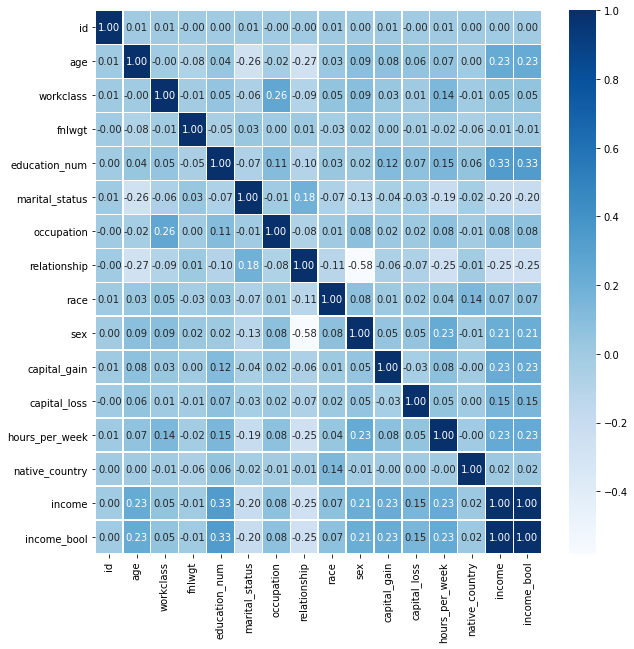

In [10]:
# 상관관계 heatmap

plt.figure(figsize=(10,10))
sns.heatmap(data = df_num.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# age, education_num, marital_status, relationship, sex, capital_gain, capital_loss, hours_per_week 가 연관있어 보인다.

# EDA

* 상관관계가 높은 아래 컬럼들을 살펴보겠습니다.

  1. age, 
  2. education_num, 
  3. marital_status, 
  4. relationship, 
  5. sex, 
  6. capital_gain, 
  7. capital_loss, 
  8. hours_per_week

## 1. age

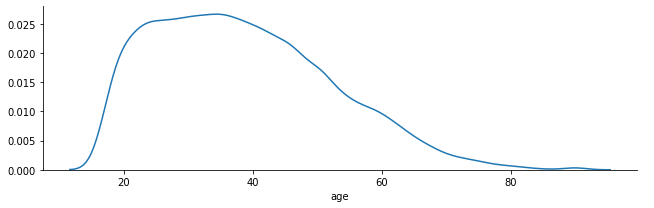

In [11]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'age')
fa.add_legend()
# 코끼리를 삼킨 보아뱀 모양 그래프, 아직 코끼리가 식도에 있어서 위장쪽으로 옮겨줘야합니다.

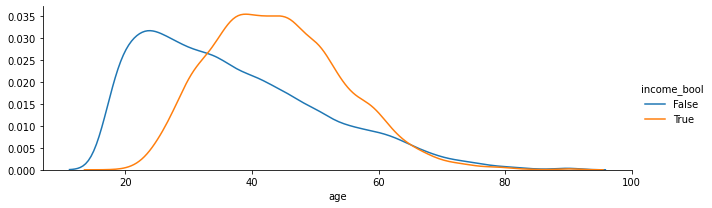

In [12]:
# income을 기준으로 나눠보기
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'age')
fa.add_legend()

# 대략 구분해보면 40~50대에 돈이 많고, 20대에는 돈이 없습니다. 늙어서는 다 똑같습니다..

## 2. education_num

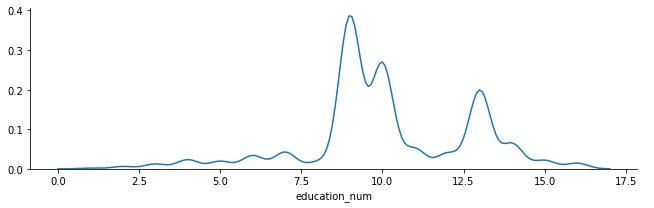

In [13]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'education_num')
fa.add_legend()
# 들쭉 날쭉합니다. 대충 중졸, 고졸, 대졸, 대학원졸 그룹으로 나눌 수 있을 것 같습니다.

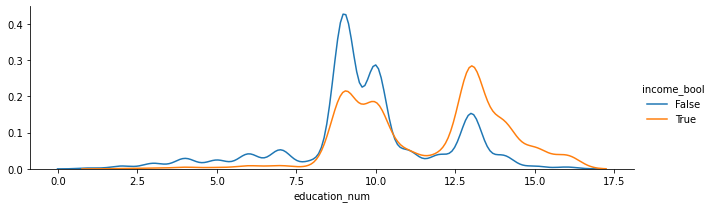

In [14]:
# income 기준으로 나눠보기
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'education_num')
fa.add_legend()

In [78]:
pd.pivot_table(data = df_num, index = 'education_num', values = 'income_bool', aggfunc = np.mean)
# 공부 많이 하면 돈도 많이 법니다.

income_bool
education_num             
1                 0.000000
2                 0.037313
3                 0.049057
4                 0.057426
5                 0.052632
6                 0.072503
7                 0.059653
8                 0.072423
9                 0.158544
10                0.192586
11                0.255474
12                0.255344
13                0.415516
14                0.561684
15                0.733906
16                0.734177

## 3. marital_status

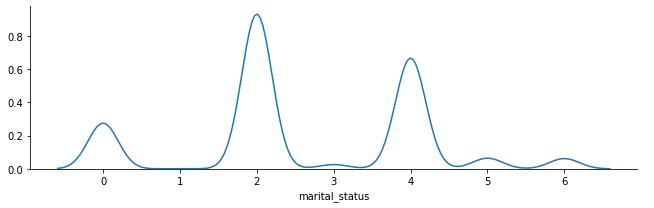

In [15]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'marital_status')
fa.add_legend()
# 결혼 상태 입니다. 0, 2, 4의 상태가 두드러집니다. 인코딩이 되어 있어 어떤 상태인지 알 수 없습니다.

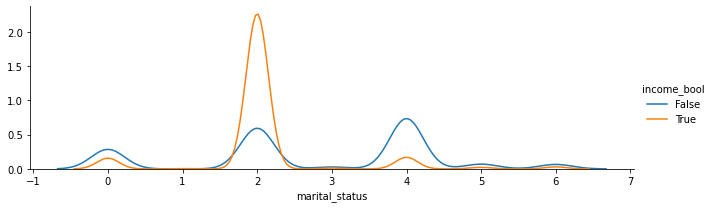

In [16]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'marital_status')
fa.add_legend()
# 2는 어떤 상태일까요?

In [17]:
pd.pivot_table(data = df_num, index = 'marital_status', values = 'income_bool', aggfunc = np.sum)

income_bool
marital_status             
0                       371
1                        10
2                      5372
3                        27
4                       401
5                        54
6                        70

In [18]:
pd.pivot_table(data = df, index = 'marital_status', values = 'income_bool', aggfunc = np.sum)
# 소득이 높은 사람은 결혼했을 확률이 높습니다.

income_bool
marital_status                    
Divorced                       371
Married-AF-spouse               10
Married-civ-spouse            5372
Married-spouse-absent           27
Never-married                  401
Separated                       54
Widowed                         70

## 4. relationship

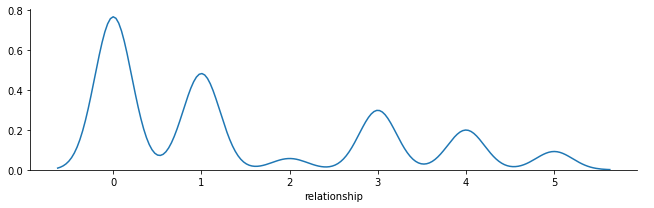

In [23]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'relationship')
fa.add_legend()
# 가족관계는 0,1,3 순서로 표본이 많습니다.

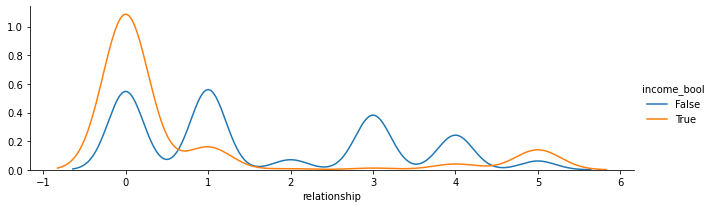

In [24]:
fa = sns.FacetGrid(df_num, hue = 'income_bool',aspect = 3)
fa.map(sns.kdeplot, 'relationship')
fa.add_legend()
# 가족관계가 0, 5이면 돈을 많이 버는 사람일 수 있습니다.

In [25]:
pd.pivot_table(data = df_num, index = 'relationship',values = 'income_bool', aggfunc = np.sum)

income_bool
relationship             
0                    4740
1                     695
2                      33
3                      52
4                     176
5                     609

In [30]:
pd.pivot_table(data = df, index = 'relationship',values = 'income_bool', aggfunc = np.sum)
# 돈을 많이 버는 사람은 남편이거나 독신일 확률이 높습니다.

income_bool
relationship               
Husband                4740
Not-in-family           695
Other-relative           33
Own-child                52
Unmarried               176
Wife                    609

## 5.sex

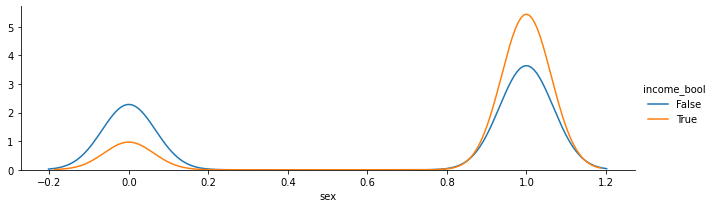

In [31]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'sex')
fa.add_legend()
# 돈을 많이 버는 사람은 남자일 확률이 높습니다.

## 6. capital_gain,

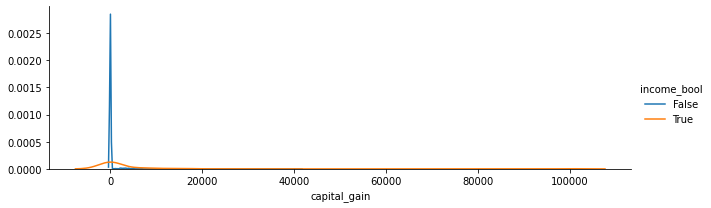

In [32]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'capital_gain')
fa.add_legend()
# 이렇게만 봐서는 잘 모르겠습니다. 자본 소득이 있고 없고를 확인해보겠습니다.

In [42]:
df_num['capital_gain_bool'] = df_num['capital_gain'] > 0
print(df_num.shape)
df_num[['capital_gain', 'capital_gain_bool']].head()

(26049, 17)


capital_gain  capital_gain_bool
0             0              False
1             0              False
2             0              False
3             0              False
4             0              False

In [142]:
# test data
df_num_t['capital_gain_bool'] = df_num_t['capital_gain'] > 0
print(df_num_t.shape)
df_num_t[['capital_gain', 'capital_gain_bool']].head()

(6512, 16)


capital_gain  capital_gain_bool
0             0              False
1             0              False
2             0              False
3             0              False
4             0              False

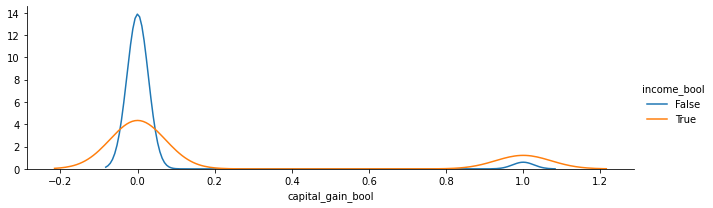

In [43]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'capital_gain_bool')
fa.add_legend()
# 대부분은 자본소득이 없지만, 있다면 부자일 확률이 높습니다.

## 7. capital_loss

In [44]:
# capital_gain과 마찬가지로 유무 여부로 확인해보겠습니다.
df_num['capital_loss_bool'] = df_num['capital_loss'] > 0
print(df_num.shape)
df_num[['capital_loss', 'capital_loss_bool']].head()

(26049, 18)


capital_loss  capital_loss_bool
0             0              False
1             0              False
2             0              False
3             0              False
4             0              False

In [143]:
# test data
df_num_t['capital_loss_bool'] = df_num_t['capital_loss'] > 0
print(df_num_t.shape)
df_num_t[['capital_loss', 'capital_loss_bool']].head()

(6512, 17)


capital_loss  capital_loss_bool
0             0              False
1             0              False
2             0              False
3             0              False
4             0              False

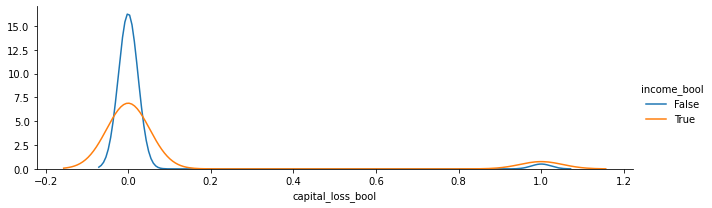

In [49]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'capital_loss_bool')
fa.add_legend()
# 대부분은 자본손실이 없지만 있으면 부자일 확률이 높습니다.

## 8. hours_per_week

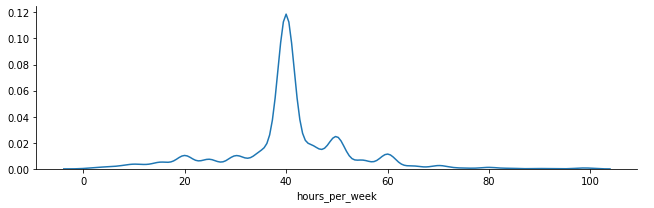

In [54]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'hours_per_week')
fa.add_legend()
# 주 40시간, 50시간, 60시간 순으로 분포되어 있습니다, 그룹별로 만들어야겠습니다.

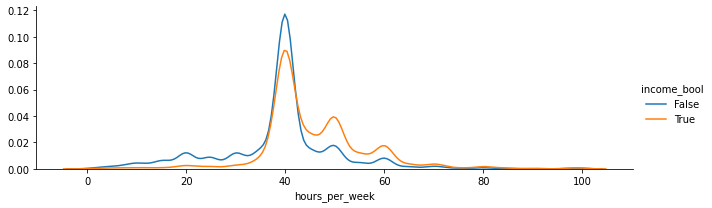

In [56]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'hours_per_week')
fa.add_legend()
# 주 50, 60시간 일 한다면 부자일 확률이 높습니다.

## EDA 결론
 * EDA 결과를 바탕으로 아래와 같이 PREPROCESSING을 진행하겠습니다.
  1. age: 40~50대에 돈이 많고, 20대에는 돈이 없습니다. / 나이가 넓게 분포되어 있는데, 두 그룹으로 나눠보겠습니다.
  2. marital_status: 기혼, 독신 두 그룹으로 나눠보겠습니다.
  3. relationship:기혼 그룹에서 돈을 많이 벌었듯이, 남편과 아내일 경우 소득이 높습니다. / 남편 or 아내 bool 값으로 바꿔보겠습니다.
  4. hours_per_week: 정규화 해보겠습니다.
 ---
  5. education_num: 추가 작업이 필요없습니다.
  6. sex: 추가 작업이 필요 없습니다.
  7. capital_gain, bool 컬럼을 그대로 사용하겠습니다.
  8. capital_loss, bool 컬럼을 그대로 사용하겠습니다.

# PREPROCESSING

## 1. age

In [69]:
pd.pivot_table(data = df_num, index = 'age', values = 'income_bool', aggfunc = np.mean)
# 36~61세까지를 magor_age 그룹으로 분류하겠습니다.

income_bool
age             
17      0.000000
18      0.000000
19      0.001764
20      0.000000
21      0.003527
22      0.016051
23      0.012748
24      0.037094
25      0.063953
26      0.088647
27      0.095238
28      0.141399
29      0.165152
30      0.209064
31      0.224719
32      0.235821
33      0.214697
34      0.272597
35      0.253521
36      0.317143
37      0.336811
38      0.346041
39      0.343465
40      0.336449
41      0.348297
42      0.351047
43      0.365574
44      0.378049
45      0.392982
46      0.389916
47      0.409660
48      0.399093
49      0.369658
50      0.424431
51      0.414938
52      0.388889
53      0.409605
54      0.400000
55      0.353293
56      0.323129
57      0.379699
58      0.348993
59      0.367273
60      0.326613
61      0.316667
62      0.252336
63      0.254054
64      0.238636
65      0.248227
66      0.219512
67      0.241935
68      0.230769
69      0.176471
70      0.176471
71      0.245283
72      0.152542
73      0.156863
74      0.244444
75      0.138889
76      0.081081
77      0.130435
78      0.238095
79      0.388889
80      0.100000
81      0.125000
82      0.000000
83      0.400000
84      0.111111
85      0.000000
86      0.000000
87      0.000000
88      0.000000
90      0.166667

In [74]:
df_num['major_age'] = (df_num['age'] >= 36) & (df_num['age'] <= 61)
print(df_num.shape)
df_num[['age', 'major_age']].head()

(26049, 20)


age  major_age
0   40       True
1   17      False
2   18      False
3   21      False
4   24      False

In [144]:
# test data
df_num_t['major_age'] = (df_num_t['age'] >= 36) & (df_num_t['age'] <= 61)
print(df_num_t.shape)
df_num_t[['age', 'major_age']].head()

(6512, 18)


age  major_age
0   28      False
1   40       True
2   20      False
3   40       True
4   37       True

## 2. marital_status

In [82]:
pd.pivot_table(data = df_num, index = 'marital_status', values = 'income_bool', aggfunc = np.mean)
# 1 = Married-AF-spouse, 2 = Married-civ-spouse

income_bool
marital_status             
0                  0.104921
1                  0.526316
2                  0.448789
3                  0.080838
4                  0.046802
5                  0.065375
6                  0.087940

In [85]:
df_num['married_bool'] = (df_num['marital_status'] == 1) | (df_num['marital_status'] == 2)
print(df_num.shape)
df_num[['marital_status', 'married_bool']].head()

(26049, 21)


marital_status  married_bool
0               2          True
1               4         False
2               4         False
3               4         False
4               4         False

In [145]:
# test data
df_num_t['married_bool'] = (df_num_t['marital_status'] == 1) | (df_num_t['marital_status'] == 2)
print(df_num_t.shape)
df_num_t[['marital_status', 'married_bool']].head()

(6512, 19)


marital_status  married_bool
0               4         False
1               2          True
2               4         False
3               2          True
4               2          True

## 3. relationship

In [87]:
pd.pivot_table(data = df_num, index = 'relationship', values = 'income_bool', aggfunc = np.mean)
# 0 = Husband, 5 = Wife

income_bool
relationship             
0                0.449673
1                0.104795
2                0.042471
3                0.012686
4                0.064234
5                0.483333

In [89]:
df_num['relationship_bool'] = (df_num['relationship'] == 0) | (df_num['relationship'] == 5)
print(df_num.shape)
df_num[['relationship', 'relationship_bool']].head()

(26049, 22)


relationship  relationship_bool
0             0               True
1             3              False
2             3              False
3             3              False
4             1              False

In [146]:
# test data
df_num_t['relationship_bool'] = (df_num_t['relationship'] == 0) | (df_num_t['relationship'] == 5)
print(df_num_t.shape)
df_num_t[['relationship', 'relationship_bool']].head()

(6512, 20)


relationship  relationship_bool
0             2              False
1             0               True
2             3              False
3             0               True
4             0               True

## 4. hours_per_week

In [90]:
pd.pivot_table(data = df_num, index = 'hours_per_week', values = 'income_bool', aggfunc = np.mean)

income_bool
hours_per_week             
1                  0.062500
2                  0.280000
3                  0.029412
4                  0.052632
5                  0.137255
6                  0.130435
7                  0.166667
8                  0.050420
9                  0.000000
10                 0.065502
11                 0.000000
12                 0.071429
13                 0.086957
14                 0.086957
15                 0.027778
16                 0.056604
17                 0.041667
18                 0.098361
19                 0.000000
20                 0.066667
21                 0.000000
22                 0.108108
23                 0.000000
24                 0.099502
25                 0.051948
26                 0.181818
27                 0.040000
28                 0.058824
29                 0.166667
30                 0.067329
31                 0.000000
32                 0.105023
33                 0.107143
34                 0.086957
35                 0.145873
36                 0.198830
37                 0.142857
38                 0.174026
39                 0.120000
40                 0.213592
41                 0.250000
42                 0.347305
43                 0.283333
44                 0.321637
45                 0.384088
46                 0.366667
47                 0.305556
48                 0.285036
49                 0.200000
50                 0.456353
51                 0.200000
52                 0.376238
53                 0.222222
54                 0.379310
55                 0.465364
56                 0.402597
57                 0.500000
58                 0.320000
59                 0.400000
60                 0.432990
61                 1.000000
62                 0.230769
63                 0.428571
64                 0.454545
65                 0.420000
66                 0.133333
67                 0.750000
68                 0.454545
70                 0.388186
72                 0.377358
73                 0.500000
74                 0.000000
75                 0.297872
76                 0.666667
77                 0.000000
78                 0.285714
80                 0.426087
81                 0.000000
82                 0.000000
84                 0.444444
85                 0.333333
86                 0.000000
88                 0.000000
89                 0.000000
90                 0.320000
91                 0.000000
92                 0.000000
94                 0.000000
95                 0.000000
96                 0.200000
97                 0.000000
98                 0.333333
99                 0.307692

In [92]:
df_num['hours_per_week_log'] = np.log(df_num['hours_per_week'] + 1)

In [147]:
#test data
df_num_t['hours_per_week_log'] = np.log(df_num_t['hours_per_week'] + 1)

/home/theo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/theo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours_per_week_log', ylabel='Density'>

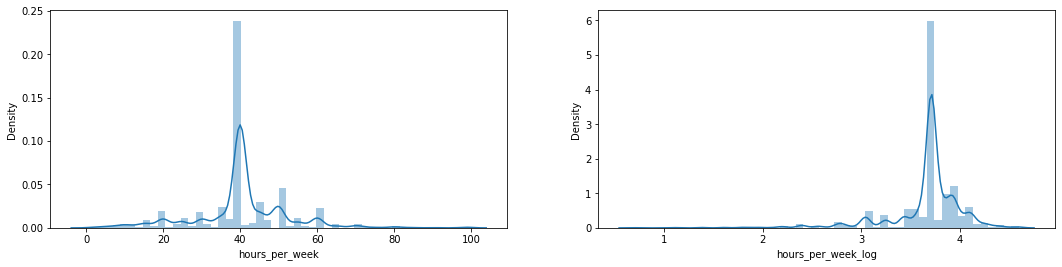

In [93]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)


sns.distplot(df_num["hours_per_week"], ax=ax1)
sns.distplot(df_num["hours_per_week_log"], ax=ax2)

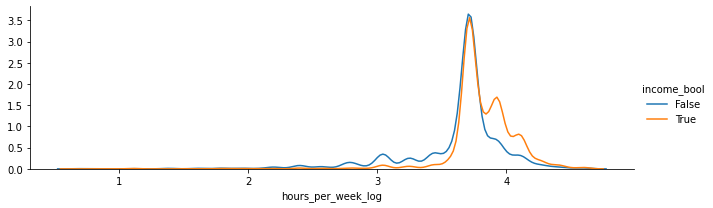

In [94]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'hours_per_week_log')
fa.add_legend()

# Feature Engineering

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
df_num.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'income_bool', 'capital_gain_bool', 'capital_loss_bool', 'age_log',
       'major_age', 'married_bool', 'relationship_bool', 'hours_per_week_log'],
      dtype='object')

In [100]:
features = ['education_num', 'marital_status', 'capital_gain_bool', 'capital_loss_bool', 
           'major_age', 'married_bool', 'relationship_bool', 'hours_per_week_log']
target = 'income_bool'

In [101]:
X = df_num[features]
print(X.shape)
X.head()

(26049, 8)


education_num  marital_status  capital_gain_bool  capital_loss_bool  \
0              9               2              False              False   
1              5               4              False              False   
2             10               4              False              False   
3             10               4              False              False   
4             10               4              False              False   

   major_age  married_bool  relationship_bool  hours_per_week_log  
0       True          True               True            4.110874  
1      False         False              False            3.044522  
2      False         False              False            2.833213  
3      False         False              False            3.258097  
4      False         False              False            3.044522

In [102]:
y = df_num[target]
print(y.shape)
y.head()

(26049,)


0     True
1    False
2    False
3    False
4    False
Name: income_bool, dtype: bool

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20839, 8) (20839,)
(5210, 8) (5210,)


# Model Tuning & Evaluation

In [104]:

# 모듈 import
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


# 0. 쓰고싶은 모델을 Import 한다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 1. 모델들과 결과들의 Dictionary를 만들어준다.
models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}



# 2. 함수로 만들어 보기
def run():

    for model_name, model in models_list.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(model_name)
        print(accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        print('------------------------------'*2)

In [105]:
run()

DecisionTreeClassifier
0.8259117082533589
              precision    recall  f1-score   support

       False       0.86      0.91      0.89      3978
        True       0.66      0.54      0.59      1232

    accuracy                           0.83      5210
   macro avg       0.76      0.73      0.74      5210
weighted avg       0.82      0.83      0.82      5210

[[3639  339]
 [ 568  664]]
------------------------------------------------------------
RandomForestClassifier
0.826679462571977
              precision    recall  f1-score   support

       False       0.87      0.91      0.89      3978
        True       0.66      0.56      0.60      1232

    accuracy                           0.83      5210
   macro avg       0.76      0.73      0.75      5210
weighted avg       0.82      0.83      0.82      5210

[[3621  357]
 [ 546  686]]
------------------------------------------------------------
svm
0.8420345489443378
              precision    recall  f1-score   support

       Fa

In [130]:
from sklearn.model_selection import KFold, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, roc_auc_score
lgbm = LGBMClassifier(n_estimators=200)

params = {'max_depth': [10, 15, 20],
          'min_child_samples': [20, 40, 60],
          'subsample': [0.8, 1]}

In [132]:
grid = GridSearchCV(lgbm, param_grid = params)
grid.fit(X_train, y_train, early_stopping_rounds = 100,
        eval_metric = 'auc',
        eval_set = [(X_train, y_train), (X_test, y_test)])
print('최적 파라미터: ', grid.best_params_)
lgbm_roc_score = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

[1]	valid_0's auc: 0.882882	valid_0's binary_logloss: 0.51849	valid_1's auc: 0.887447	valid_1's binary_logloss: 0.509637
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.886499	valid_0's binary_logloss: 0.490734	valid_1's auc: 0.892639	valid_1's binary_logloss: 0.481053
[3]	valid_0's auc: 0.887069	valid_0's binary_logloss: 0.468604	valid_1's auc: 0.893638	valid_1's binary_logloss: 0.458582
[4]	valid_0's auc: 0.887688	valid_0's binary_logloss: 0.450549	valid_1's auc: 0.894034	valid_1's binary_logloss: 0.44016
[5]	valid_0's auc: 0.888589	valid_0's binary_logloss: 0.435293	valid_1's auc: 0.894833	valid_1's binary_logloss: 0.424697
[6]	valid_0's auc: 0.889263	valid_0's binary_logloss: 0.422527	valid_1's auc: 0.895256	valid_1's binary_logloss: 0.411622
[7]	valid_0's auc: 0.889611	valid_0's binary_logloss: 0.411734	valid_1's auc: 0.89546	valid_1's binary_logloss: 0.400746
[8]	valid_0's auc: 0.89011	valid_0's binary_logloss: 0.402444	valid_1's auc: 0.895466	v

[78]	valid_0's auc: 0.900738	valid_0's binary_logloss: 0.329609	valid_1's auc: 0.896232	valid_1's binary_logloss: 0.332057
[79]	valid_0's auc: 0.90082	valid_0's binary_logloss: 0.32945	valid_1's auc: 0.896142	valid_1's binary_logloss: 0.332198
[80]	valid_0's auc: 0.900901	valid_0's binary_logloss: 0.329355	valid_1's auc: 0.896176	valid_1's binary_logloss: 0.332207
[81]	valid_0's auc: 0.900988	valid_0's binary_logloss: 0.329227	valid_1's auc: 0.896103	valid_1's binary_logloss: 0.332295
[82]	valid_0's auc: 0.901036	valid_0's binary_logloss: 0.329161	valid_1's auc: 0.896048	valid_1's binary_logloss: 0.332327
[83]	valid_0's auc: 0.901094	valid_0's binary_logloss: 0.329064	valid_1's auc: 0.896046	valid_1's binary_logloss: 0.33235
[84]	valid_0's auc: 0.901167	valid_0's binary_logloss: 0.328933	valid_1's auc: 0.896022	valid_1's binary_logloss: 0.332404
[85]	valid_0's auc: 0.901223	valid_0's binary_logloss: 0.328852	valid_1's auc: 0.895991	valid_1's binary_logloss: 0.33243
[86]	valid_0's auc: 

[20]	valid_0's auc: 0.894367	valid_0's binary_logloss: 0.351792	valid_1's auc: 0.895897	valid_1's binary_logloss: 0.34449
[21]	valid_0's auc: 0.894551	valid_0's binary_logloss: 0.350107	valid_1's auc: 0.896072	valid_1's binary_logloss: 0.342871
[22]	valid_0's auc: 0.894886	valid_0's binary_logloss: 0.348539	valid_1's auc: 0.896133	valid_1's binary_logloss: 0.341618
[23]	valid_0's auc: 0.895128	valid_0's binary_logloss: 0.347156	valid_1's auc: 0.896174	valid_1's binary_logloss: 0.340461
[24]	valid_0's auc: 0.895348	valid_0's binary_logloss: 0.345952	valid_1's auc: 0.895855	valid_1's binary_logloss: 0.339545
[25]	valid_0's auc: 0.895511	valid_0's binary_logloss: 0.344886	valid_1's auc: 0.89596	valid_1's binary_logloss: 0.338539
[26]	valid_0's auc: 0.895652	valid_0's binary_logloss: 0.343934	valid_1's auc: 0.89595	valid_1's binary_logloss: 0.337768
[27]	valid_0's auc: 0.89587	valid_0's binary_logloss: 0.342976	valid_1's auc: 0.896022	valid_1's binary_logloss: 0.337072
[28]	valid_0's auc: 

[93]	valid_0's auc: 0.901838	valid_0's binary_logloss: 0.32787	valid_1's auc: 0.89422	valid_1's binary_logloss: 0.335263
[94]	valid_0's auc: 0.901878	valid_0's binary_logloss: 0.327814	valid_1's auc: 0.89416	valid_1's binary_logloss: 0.335417
[95]	valid_0's auc: 0.901959	valid_0's binary_logloss: 0.327716	valid_1's auc: 0.894123	valid_1's binary_logloss: 0.335511
[96]	valid_0's auc: 0.901998	valid_0's binary_logloss: 0.327644	valid_1's auc: 0.8941	valid_1's binary_logloss: 0.335605
[97]	valid_0's auc: 0.902045	valid_0's binary_logloss: 0.327576	valid_1's auc: 0.894049	valid_1's binary_logloss: 0.335634
[98]	valid_0's auc: 0.902063	valid_0's binary_logloss: 0.327525	valid_1's auc: 0.894002	valid_1's binary_logloss: 0.335797
[99]	valid_0's auc: 0.90211	valid_0's binary_logloss: 0.327437	valid_1's auc: 0.893848	valid_1's binary_logloss: 0.335847
[100]	valid_0's auc: 0.902172	valid_0's binary_logloss: 0.327366	valid_1's auc: 0.893846	valid_1's binary_logloss: 0.335913
[101]	valid_0's auc: 

[34]	valid_0's auc: 0.89702	valid_0's binary_logloss: 0.337766	valid_1's auc: 0.895976	valid_1's binary_logloss: 0.334472
[35]	valid_0's auc: 0.897161	valid_0's binary_logloss: 0.337333	valid_1's auc: 0.895787	valid_1's binary_logloss: 0.334291
[36]	valid_0's auc: 0.897248	valid_0's binary_logloss: 0.336912	valid_1's auc: 0.89599	valid_1's binary_logloss: 0.334078
[37]	valid_0's auc: 0.897317	valid_0's binary_logloss: 0.336561	valid_1's auc: 0.895936	valid_1's binary_logloss: 0.333835
[38]	valid_0's auc: 0.897457	valid_0's binary_logloss: 0.336194	valid_1's auc: 0.895905	valid_1's binary_logloss: 0.333741
[39]	valid_0's auc: 0.897697	valid_0's binary_logloss: 0.335747	valid_1's auc: 0.896116	valid_1's binary_logloss: 0.333538
[40]	valid_0's auc: 0.897801	valid_0's binary_logloss: 0.335441	valid_1's auc: 0.896272	valid_1's binary_logloss: 0.333403
[41]	valid_0's auc: 0.897904	valid_0's binary_logloss: 0.335179	valid_1's auc: 0.89608	valid_1's binary_logloss: 0.333321
[42]	valid_0's auc:

[115]	valid_0's auc: 0.9031	valid_0's binary_logloss: 0.326115	valid_1's auc: 0.893193	valid_1's binary_logloss: 0.33805
[116]	valid_0's auc: 0.903121	valid_0's binary_logloss: 0.32607	valid_1's auc: 0.893131	valid_1's binary_logloss: 0.338228
[117]	valid_0's auc: 0.903187	valid_0's binary_logloss: 0.325979	valid_1's auc: 0.893078	valid_1's binary_logloss: 0.338312
[118]	valid_0's auc: 0.90323	valid_0's binary_logloss: 0.325927	valid_1's auc: 0.893059	valid_1's binary_logloss: 0.338362
[119]	valid_0's auc: 0.903307	valid_0's binary_logloss: 0.325852	valid_1's auc: 0.892999	valid_1's binary_logloss: 0.338469
[120]	valid_0's auc: 0.903343	valid_0's binary_logloss: 0.325793	valid_1's auc: 0.893048	valid_1's binary_logloss: 0.338473
[121]	valid_0's auc: 0.903337	valid_0's binary_logloss: 0.325701	valid_1's auc: 0.892983	valid_1's binary_logloss: 0.338574
[122]	valid_0's auc: 0.903394	valid_0's binary_logloss: 0.325618	valid_1's auc: 0.892922	valid_1's binary_logloss: 0.33866
[123]	valid_0'

[44]	valid_0's auc: 0.898359	valid_0's binary_logloss: 0.334259	valid_1's auc: 0.896635	valid_1's binary_logloss: 0.332144
[45]	valid_0's auc: 0.898525	valid_0's binary_logloss: 0.333916	valid_1's auc: 0.896397	valid_1's binary_logloss: 0.332155
[46]	valid_0's auc: 0.898582	valid_0's binary_logloss: 0.333693	valid_1's auc: 0.896505	valid_1's binary_logloss: 0.332022
[47]	valid_0's auc: 0.89876	valid_0's binary_logloss: 0.33344	valid_1's auc: 0.896512	valid_1's binary_logloss: 0.332148
[48]	valid_0's auc: 0.898862	valid_0's binary_logloss: 0.333209	valid_1's auc: 0.896472	valid_1's binary_logloss: 0.332138
[49]	valid_0's auc: 0.898965	valid_0's binary_logloss: 0.33297	valid_1's auc: 0.896485	valid_1's binary_logloss: 0.332163
[50]	valid_0's auc: 0.899107	valid_0's binary_logloss: 0.332716	valid_1's auc: 0.896426	valid_1's binary_logloss: 0.332276
[51]	valid_0's auc: 0.89927	valid_0's binary_logloss: 0.33249	valid_1's auc: 0.896526	valid_1's binary_logloss: 0.332141
[52]	valid_0's auc: 0

[131]	valid_0's auc: 0.904241	valid_0's binary_logloss: 0.324639	valid_1's auc: 0.893605	valid_1's binary_logloss: 0.336523
[132]	valid_0's auc: 0.904294	valid_0's binary_logloss: 0.324566	valid_1's auc: 0.893586	valid_1's binary_logloss: 0.33659
[133]	valid_0's auc: 0.904353	valid_0's binary_logloss: 0.324512	valid_1's auc: 0.893572	valid_1's binary_logloss: 0.336678
[134]	valid_0's auc: 0.904351	valid_0's binary_logloss: 0.324479	valid_1's auc: 0.893489	valid_1's binary_logloss: 0.336761
[135]	valid_0's auc: 0.904385	valid_0's binary_logloss: 0.324425	valid_1's auc: 0.8935	valid_1's binary_logloss: 0.336865
[136]	valid_0's auc: 0.904461	valid_0's binary_logloss: 0.324378	valid_1's auc: 0.893373	valid_1's binary_logloss: 0.336958
[137]	valid_0's auc: 0.904485	valid_0's binary_logloss: 0.324332	valid_1's auc: 0.893317	valid_1's binary_logloss: 0.337003
Early stopping, best iteration is:
[37]	valid_0's auc: 0.897393	valid_0's binary_logloss: 0.336636	valid_1's auc: 0.896806	valid_1's bi

[72]	valid_0's auc: 0.900781	valid_0's binary_logloss: 0.329919	valid_1's auc: 0.895809	valid_1's binary_logloss: 0.332782
[73]	valid_0's auc: 0.900813	valid_0's binary_logloss: 0.329832	valid_1's auc: 0.895763	valid_1's binary_logloss: 0.332794
[74]	valid_0's auc: 0.900917	valid_0's binary_logloss: 0.329707	valid_1's auc: 0.895655	valid_1's binary_logloss: 0.332864
[75]	valid_0's auc: 0.900994	valid_0's binary_logloss: 0.329601	valid_1's auc: 0.895632	valid_1's binary_logloss: 0.33296
[76]	valid_0's auc: 0.900971	valid_0's binary_logloss: 0.329543	valid_1's auc: 0.89576	valid_1's binary_logloss: 0.332938
[77]	valid_0's auc: 0.901042	valid_0's binary_logloss: 0.329444	valid_1's auc: 0.895804	valid_1's binary_logloss: 0.332958
[78]	valid_0's auc: 0.901066	valid_0's binary_logloss: 0.329343	valid_1's auc: 0.895759	valid_1's binary_logloss: 0.332989
[79]	valid_0's auc: 0.901169	valid_0's binary_logloss: 0.329223	valid_1's auc: 0.895698	valid_1's binary_logloss: 0.333138
[80]	valid_0's auc

[4]	valid_0's auc: 0.887688	valid_0's binary_logloss: 0.450549	valid_1's auc: 0.894034	valid_1's binary_logloss: 0.44016
[5]	valid_0's auc: 0.888589	valid_0's binary_logloss: 0.435293	valid_1's auc: 0.894833	valid_1's binary_logloss: 0.424697
[6]	valid_0's auc: 0.889263	valid_0's binary_logloss: 0.422527	valid_1's auc: 0.895256	valid_1's binary_logloss: 0.411622
[7]	valid_0's auc: 0.889611	valid_0's binary_logloss: 0.411734	valid_1's auc: 0.89546	valid_1's binary_logloss: 0.400746
[8]	valid_0's auc: 0.89011	valid_0's binary_logloss: 0.402444	valid_1's auc: 0.895466	valid_1's binary_logloss: 0.391888
[9]	valid_0's auc: 0.890587	valid_0's binary_logloss: 0.394393	valid_1's auc: 0.895801	valid_1's binary_logloss: 0.383831
[10]	valid_0's auc: 0.890792	valid_0's binary_logloss: 0.387511	valid_1's auc: 0.895856	valid_1's binary_logloss: 0.376968
[11]	valid_0's auc: 0.891527	valid_0's binary_logloss: 0.381498	valid_1's auc: 0.895965	valid_1's binary_logloss: 0.371261
[12]	valid_0's auc: 0.892

[99]	valid_0's auc: 0.902014	valid_0's binary_logloss: 0.327551	valid_1's auc: 0.895314	valid_1's binary_logloss: 0.333308
[100]	valid_0's auc: 0.902081	valid_0's binary_logloss: 0.327449	valid_1's auc: 0.895253	valid_1's binary_logloss: 0.333233
[101]	valid_0's auc: 0.902126	valid_0's binary_logloss: 0.327362	valid_1's auc: 0.895225	valid_1's binary_logloss: 0.333349
[102]	valid_0's auc: 0.902146	valid_0's binary_logloss: 0.327319	valid_1's auc: 0.895242	valid_1's binary_logloss: 0.333338
[103]	valid_0's auc: 0.902212	valid_0's binary_logloss: 0.327217	valid_1's auc: 0.895187	valid_1's binary_logloss: 0.333446
[104]	valid_0's auc: 0.902271	valid_0's binary_logloss: 0.327162	valid_1's auc: 0.895167	valid_1's binary_logloss: 0.333474
[105]	valid_0's auc: 0.902322	valid_0's binary_logloss: 0.327067	valid_1's auc: 0.89508	valid_1's binary_logloss: 0.333638
[106]	valid_0's auc: 0.90239	valid_0's binary_logloss: 0.32694	valid_1's auc: 0.894918	valid_1's binary_logloss: 0.333802
[107]	valid_

[32]	valid_0's auc: 0.896694	valid_0's binary_logloss: 0.33945	valid_1's auc: 0.896108	valid_1's binary_logloss: 0.334729
[33]	valid_0's auc: 0.896854	valid_0's binary_logloss: 0.338838	valid_1's auc: 0.896108	valid_1's binary_logloss: 0.334331
[34]	valid_0's auc: 0.896955	valid_0's binary_logloss: 0.338385	valid_1's auc: 0.896049	valid_1's binary_logloss: 0.334077
[35]	valid_0's auc: 0.897079	valid_0's binary_logloss: 0.337954	valid_1's auc: 0.896079	valid_1's binary_logloss: 0.333875
[36]	valid_0's auc: 0.897235	valid_0's binary_logloss: 0.337435	valid_1's auc: 0.896132	valid_1's binary_logloss: 0.333556
[37]	valid_0's auc: 0.897352	valid_0's binary_logloss: 0.336993	valid_1's auc: 0.896075	valid_1's binary_logloss: 0.333346
[38]	valid_0's auc: 0.897393	valid_0's binary_logloss: 0.336668	valid_1's auc: 0.896108	valid_1's binary_logloss: 0.333174
[39]	valid_0's auc: 0.897506	valid_0's binary_logloss: 0.336265	valid_1's auc: 0.896007	valid_1's binary_logloss: 0.333058
[40]	valid_0's au

[1]	valid_0's auc: 0.879598	valid_0's binary_logloss: 0.518225	valid_1's auc: 0.885421	valid_1's binary_logloss: 0.509321
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.880935	valid_0's binary_logloss: 0.490209	valid_1's auc: 0.886584	valid_1's binary_logloss: 0.48082
[3]	valid_0's auc: 0.884216	valid_0's binary_logloss: 0.467988	valid_1's auc: 0.889756	valid_1's binary_logloss: 0.458318
[4]	valid_0's auc: 0.885914	valid_0's binary_logloss: 0.449832	valid_1's auc: 0.890504	valid_1's binary_logloss: 0.440026
[5]	valid_0's auc: 0.886298	valid_0's binary_logloss: 0.434738	valid_1's auc: 0.891264	valid_1's binary_logloss: 0.42472
[6]	valid_0's auc: 0.887125	valid_0's binary_logloss: 0.421949	valid_1's auc: 0.891457	valid_1's binary_logloss: 0.412167
[7]	valid_0's auc: 0.887423	valid_0's binary_logloss: 0.411073	valid_1's auc: 0.892017	valid_1's binary_logloss: 0.401185
[8]	valid_0's auc: 0.88783	valid_0's binary_logloss: 0.401743	valid_1's auc: 0.892318	

[84]	valid_0's auc: 0.901657	valid_0's binary_logloss: 0.328312	valid_1's auc: 0.894672	valid_1's binary_logloss: 0.335401
[85]	valid_0's auc: 0.901695	valid_0's binary_logloss: 0.328245	valid_1's auc: 0.89469	valid_1's binary_logloss: 0.335287
[86]	valid_0's auc: 0.901766	valid_0's binary_logloss: 0.328166	valid_1's auc: 0.894693	valid_1's binary_logloss: 0.335427
[87]	valid_0's auc: 0.901806	valid_0's binary_logloss: 0.328086	valid_1's auc: 0.894689	valid_1's binary_logloss: 0.335464
[88]	valid_0's auc: 0.901863	valid_0's binary_logloss: 0.328001	valid_1's auc: 0.894644	valid_1's binary_logloss: 0.335546
[89]	valid_0's auc: 0.901916	valid_0's binary_logloss: 0.327914	valid_1's auc: 0.894613	valid_1's binary_logloss: 0.335552
[90]	valid_0's auc: 0.901972	valid_0's binary_logloss: 0.327867	valid_1's auc: 0.894601	valid_1's binary_logloss: 0.335555
[91]	valid_0's auc: 0.902013	valid_0's binary_logloss: 0.327809	valid_1's auc: 0.894624	valid_1's binary_logloss: 0.335562
[92]	valid_0's au

[40]	valid_0's auc: 0.897804	valid_0's binary_logloss: 0.335495	valid_1's auc: 0.896675	valid_1's binary_logloss: 0.332328
[41]	valid_0's auc: 0.897902	valid_0's binary_logloss: 0.335191	valid_1's auc: 0.896786	valid_1's binary_logloss: 0.332259
[42]	valid_0's auc: 0.8981	valid_0's binary_logloss: 0.334849	valid_1's auc: 0.896623	valid_1's binary_logloss: 0.33227
[43]	valid_0's auc: 0.898285	valid_0's binary_logloss: 0.33452	valid_1's auc: 0.896576	valid_1's binary_logloss: 0.332332
[44]	valid_0's auc: 0.898359	valid_0's binary_logloss: 0.334259	valid_1's auc: 0.896635	valid_1's binary_logloss: 0.332144
[45]	valid_0's auc: 0.898525	valid_0's binary_logloss: 0.333916	valid_1's auc: 0.896397	valid_1's binary_logloss: 0.332155
[46]	valid_0's auc: 0.898582	valid_0's binary_logloss: 0.333693	valid_1's auc: 0.896505	valid_1's binary_logloss: 0.332022
[47]	valid_0's auc: 0.89876	valid_0's binary_logloss: 0.33344	valid_1's auc: 0.896512	valid_1's binary_logloss: 0.332148
[48]	valid_0's auc: 0.

[110]	valid_0's auc: 0.903373	valid_0's binary_logloss: 0.325869	valid_1's auc: 0.894307	valid_1's binary_logloss: 0.335298
[111]	valid_0's auc: 0.903408	valid_0's binary_logloss: 0.32581	valid_1's auc: 0.894284	valid_1's binary_logloss: 0.335321
[112]	valid_0's auc: 0.90346	valid_0's binary_logloss: 0.325733	valid_1's auc: 0.894283	valid_1's binary_logloss: 0.335377
[113]	valid_0's auc: 0.903498	valid_0's binary_logloss: 0.325677	valid_1's auc: 0.894265	valid_1's binary_logloss: 0.335401
[114]	valid_0's auc: 0.903544	valid_0's binary_logloss: 0.325627	valid_1's auc: 0.894182	valid_1's binary_logloss: 0.33549
[115]	valid_0's auc: 0.903596	valid_0's binary_logloss: 0.325545	valid_1's auc: 0.89428	valid_1's binary_logloss: 0.33551
[116]	valid_0's auc: 0.903639	valid_0's binary_logloss: 0.325473	valid_1's auc: 0.894286	valid_1's binary_logloss: 0.335544
[117]	valid_0's auc: 0.90368	valid_0's binary_logloss: 0.325401	valid_1's auc: 0.894277	valid_1's binary_logloss: 0.335594
[118]	valid_0'

[50]	valid_0's auc: 0.898831	valid_0's binary_logloss: 0.333204	valid_1's auc: 0.896192	valid_1's binary_logloss: 0.332093
[51]	valid_0's auc: 0.898927	valid_0's binary_logloss: 0.33301	valid_1's auc: 0.896134	valid_1's binary_logloss: 0.332114
[52]	valid_0's auc: 0.899013	valid_0's binary_logloss: 0.33284	valid_1's auc: 0.8961	valid_1's binary_logloss: 0.332286
[53]	valid_0's auc: 0.899087	valid_0's binary_logloss: 0.332678	valid_1's auc: 0.896106	valid_1's binary_logloss: 0.332333
[54]	valid_0's auc: 0.899182	valid_0's binary_logloss: 0.332511	valid_1's auc: 0.896076	valid_1's binary_logloss: 0.332356
[55]	valid_0's auc: 0.899266	valid_0's binary_logloss: 0.332388	valid_1's auc: 0.89611	valid_1's binary_logloss: 0.332389
[56]	valid_0's auc: 0.899388	valid_0's binary_logloss: 0.332186	valid_1's auc: 0.895927	valid_1's binary_logloss: 0.332401
[57]	valid_0's auc: 0.899479	valid_0's binary_logloss: 0.332039	valid_1's auc: 0.895976	valid_1's binary_logloss: 0.332465
[58]	valid_0's auc: 0

[128]	valid_0's auc: 0.903671	valid_0's binary_logloss: 0.325321	valid_1's auc: 0.894089	valid_1's binary_logloss: 0.335854
[129]	valid_0's auc: 0.903733	valid_0's binary_logloss: 0.325235	valid_1's auc: 0.89402	valid_1's binary_logloss: 0.335938
[130]	valid_0's auc: 0.903785	valid_0's binary_logloss: 0.325131	valid_1's auc: 0.893943	valid_1's binary_logloss: 0.336007
[131]	valid_0's auc: 0.903835	valid_0's binary_logloss: 0.32504	valid_1's auc: 0.893969	valid_1's binary_logloss: 0.336009
[132]	valid_0's auc: 0.903858	valid_0's binary_logloss: 0.324986	valid_1's auc: 0.894013	valid_1's binary_logloss: 0.33605
[133]	valid_0's auc: 0.903887	valid_0's binary_logloss: 0.324923	valid_1's auc: 0.893978	valid_1's binary_logloss: 0.3361
[134]	valid_0's auc: 0.903915	valid_0's binary_logloss: 0.324885	valid_1's auc: 0.893893	valid_1's binary_logloss: 0.336179
Early stopping, best iteration is:
[34]	valid_0's auc: 0.896762	valid_0's binary_logloss: 0.338404	valid_1's auc: 0.896671	valid_1's bina

[60]	valid_0's auc: 0.898514	valid_0's binary_logloss: 0.333211	valid_1's auc: 0.896462	valid_1's binary_logloss: 0.331795
[61]	valid_0's auc: 0.898565	valid_0's binary_logloss: 0.333131	valid_1's auc: 0.896342	valid_1's binary_logloss: 0.331815
[62]	valid_0's auc: 0.898651	valid_0's binary_logloss: 0.332996	valid_1's auc: 0.89644	valid_1's binary_logloss: 0.33182
[63]	valid_0's auc: 0.898734	valid_0's binary_logloss: 0.332838	valid_1's auc: 0.896434	valid_1's binary_logloss: 0.331847
[64]	valid_0's auc: 0.898866	valid_0's binary_logloss: 0.332649	valid_1's auc: 0.896382	valid_1's binary_logloss: 0.33194
[65]	valid_0's auc: 0.898931	valid_0's binary_logloss: 0.332513	valid_1's auc: 0.896341	valid_1's binary_logloss: 0.331938
[66]	valid_0's auc: 0.898989	valid_0's binary_logloss: 0.332424	valid_1's auc: 0.896376	valid_1's binary_logloss: 0.332019
[67]	valid_0's auc: 0.89904	valid_0's binary_logloss: 0.332351	valid_1's auc: 0.896393	valid_1's binary_logloss: 0.332034
[68]	valid_0's auc: 

[131]	valid_0's auc: 0.902166	valid_0's binary_logloss: 0.327182	valid_1's auc: 0.893989	valid_1's binary_logloss: 0.335317
[132]	valid_0's auc: 0.902223	valid_0's binary_logloss: 0.327121	valid_1's auc: 0.893926	valid_1's binary_logloss: 0.335347
[133]	valid_0's auc: 0.902256	valid_0's binary_logloss: 0.32708	valid_1's auc: 0.893937	valid_1's binary_logloss: 0.335336
[134]	valid_0's auc: 0.902291	valid_0's binary_logloss: 0.32701	valid_1's auc: 0.893838	valid_1's binary_logloss: 0.335436
[135]	valid_0's auc: 0.902371	valid_0's binary_logloss: 0.326941	valid_1's auc: 0.893817	valid_1's binary_logloss: 0.335472
[136]	valid_0's auc: 0.902405	valid_0's binary_logloss: 0.326911	valid_1's auc: 0.893826	valid_1's binary_logloss: 0.335484
[137]	valid_0's auc: 0.902453	valid_0's binary_logloss: 0.326853	valid_1's auc: 0.893839	valid_1's binary_logloss: 0.335486
[138]	valid_0's auc: 0.902514	valid_0's binary_logloss: 0.326814	valid_1's auc: 0.89385	valid_1's binary_logloss: 0.335436
[139]	valid

[52]	valid_0's auc: 0.8981	valid_0's binary_logloss: 0.333979	valid_1's auc: 0.896716	valid_1's binary_logloss: 0.331393
[53]	valid_0's auc: 0.898262	valid_0's binary_logloss: 0.333764	valid_1's auc: 0.896787	valid_1's binary_logloss: 0.331454
[54]	valid_0's auc: 0.898365	valid_0's binary_logloss: 0.333603	valid_1's auc: 0.896808	valid_1's binary_logloss: 0.331418
[55]	valid_0's auc: 0.898425	valid_0's binary_logloss: 0.333472	valid_1's auc: 0.896741	valid_1's binary_logloss: 0.331421
[56]	valid_0's auc: 0.89851	valid_0's binary_logloss: 0.333294	valid_1's auc: 0.896704	valid_1's binary_logloss: 0.331516
[57]	valid_0's auc: 0.898626	valid_0's binary_logloss: 0.333144	valid_1's auc: 0.896584	valid_1's binary_logloss: 0.331601
[58]	valid_0's auc: 0.898713	valid_0's binary_logloss: 0.333013	valid_1's auc: 0.896554	valid_1's binary_logloss: 0.331663
[59]	valid_0's auc: 0.898795	valid_0's binary_logloss: 0.33289	valid_1's auc: 0.896434	valid_1's binary_logloss: 0.331674
[60]	valid_0's auc: 

[129]	valid_0's auc: 0.902155	valid_0's binary_logloss: 0.327404	valid_1's auc: 0.893675	valid_1's binary_logloss: 0.336185
[130]	valid_0's auc: 0.902185	valid_0's binary_logloss: 0.327363	valid_1's auc: 0.89363	valid_1's binary_logloss: 0.336306
[131]	valid_0's auc: 0.902234	valid_0's binary_logloss: 0.327336	valid_1's auc: 0.893669	valid_1's binary_logloss: 0.336243
[132]	valid_0's auc: 0.90226	valid_0's binary_logloss: 0.327286	valid_1's auc: 0.893643	valid_1's binary_logloss: 0.33628
[133]	valid_0's auc: 0.902296	valid_0's binary_logloss: 0.327232	valid_1's auc: 0.893649	valid_1's binary_logloss: 0.336295
[134]	valid_0's auc: 0.902339	valid_0's binary_logloss: 0.327195	valid_1's auc: 0.893608	valid_1's binary_logloss: 0.336525
[135]	valid_0's auc: 0.902356	valid_0's binary_logloss: 0.327155	valid_1's auc: 0.893624	valid_1's binary_logloss: 0.336546
[136]	valid_0's auc: 0.902372	valid_0's binary_logloss: 0.327107	valid_1's auc: 0.893608	valid_1's binary_logloss: 0.336572
[137]	valid

[56]	valid_0's auc: 0.898698	valid_0's binary_logloss: 0.332926	valid_1's auc: 0.896233	valid_1's binary_logloss: 0.332722
[57]	valid_0's auc: 0.898803	valid_0's binary_logloss: 0.33276	valid_1's auc: 0.896268	valid_1's binary_logloss: 0.332797
[58]	valid_0's auc: 0.89887	valid_0's binary_logloss: 0.332569	valid_1's auc: 0.896316	valid_1's binary_logloss: 0.332787
[59]	valid_0's auc: 0.898967	valid_0's binary_logloss: 0.332436	valid_1's auc: 0.89634	valid_1's binary_logloss: 0.332798
[60]	valid_0's auc: 0.899051	valid_0's binary_logloss: 0.332286	valid_1's auc: 0.896273	valid_1's binary_logloss: 0.332798
[61]	valid_0's auc: 0.899122	valid_0's binary_logloss: 0.332163	valid_1's auc: 0.896312	valid_1's binary_logloss: 0.332797
[62]	valid_0's auc: 0.899237	valid_0's binary_logloss: 0.332043	valid_1's auc: 0.896294	valid_1's binary_logloss: 0.332874
[63]	valid_0's auc: 0.899274	valid_0's binary_logloss: 0.331952	valid_1's auc: 0.896294	valid_1's binary_logloss: 0.332889
[64]	valid_0's auc:

[124]	valid_0's auc: 0.902132	valid_0's binary_logloss: 0.327488	valid_1's auc: 0.893025	valid_1's binary_logloss: 0.337757
[125]	valid_0's auc: 0.902198	valid_0's binary_logloss: 0.32743	valid_1's auc: 0.89298	valid_1's binary_logloss: 0.33782
[126]	valid_0's auc: 0.902239	valid_0's binary_logloss: 0.327382	valid_1's auc: 0.892894	valid_1's binary_logloss: 0.337926
[127]	valid_0's auc: 0.902288	valid_0's binary_logloss: 0.327331	valid_1's auc: 0.892895	valid_1's binary_logloss: 0.337996
[128]	valid_0's auc: 0.902312	valid_0's binary_logloss: 0.327282	valid_1's auc: 0.892832	valid_1's binary_logloss: 0.338109
[129]	valid_0's auc: 0.902317	valid_0's binary_logloss: 0.327273	valid_1's auc: 0.892802	valid_1's binary_logloss: 0.338118
[130]	valid_0's auc: 0.902346	valid_0's binary_logloss: 0.327219	valid_1's auc: 0.892854	valid_1's binary_logloss: 0.338153
[131]	valid_0's auc: 0.902353	valid_0's binary_logloss: 0.327179	valid_1's auc: 0.892862	valid_1's binary_logloss: 0.338235
[132]	valid

[80]	valid_0's auc: 0.900485	valid_0's binary_logloss: 0.3304	valid_1's auc: 0.895436	valid_1's binary_logloss: 0.333601
[81]	valid_0's auc: 0.900531	valid_0's binary_logloss: 0.33031	valid_1's auc: 0.895293	valid_1's binary_logloss: 0.333785
[82]	valid_0's auc: 0.900609	valid_0's binary_logloss: 0.330247	valid_1's auc: 0.895111	valid_1's binary_logloss: 0.333786
[83]	valid_0's auc: 0.900711	valid_0's binary_logloss: 0.330089	valid_1's auc: 0.895027	valid_1's binary_logloss: 0.333938
[84]	valid_0's auc: 0.900752	valid_0's binary_logloss: 0.329989	valid_1's auc: 0.894985	valid_1's binary_logloss: 0.334011
[85]	valid_0's auc: 0.90082	valid_0's binary_logloss: 0.329885	valid_1's auc: 0.894877	valid_1's binary_logloss: 0.334218
[86]	valid_0's auc: 0.900843	valid_0's binary_logloss: 0.329793	valid_1's auc: 0.894845	valid_1's binary_logloss: 0.334392
[87]	valid_0's auc: 0.900864	valid_0's binary_logloss: 0.329734	valid_1's auc: 0.895003	valid_1's binary_logloss: 0.334324
[88]	valid_0's auc: 

[6]	valid_0's auc: 0.888947	valid_0's binary_logloss: 0.422393	valid_1's auc: 0.893367	valid_1's binary_logloss: 0.412465
[7]	valid_0's auc: 0.889553	valid_0's binary_logloss: 0.411463	valid_1's auc: 0.894073	valid_1's binary_logloss: 0.401359
[8]	valid_0's auc: 0.889849	valid_0's binary_logloss: 0.402196	valid_1's auc: 0.894255	valid_1's binary_logloss: 0.391988
[9]	valid_0's auc: 0.890211	valid_0's binary_logloss: 0.394182	valid_1's auc: 0.894189	valid_1's binary_logloss: 0.384159
[10]	valid_0's auc: 0.89072	valid_0's binary_logloss: 0.387237	valid_1's auc: 0.894318	valid_1's binary_logloss: 0.377267
[11]	valid_0's auc: 0.890927	valid_0's binary_logloss: 0.381289	valid_1's auc: 0.894211	valid_1's binary_logloss: 0.371574
[12]	valid_0's auc: 0.891151	valid_0's binary_logloss: 0.376101	valid_1's auc: 0.894678	valid_1's binary_logloss: 0.366452
[13]	valid_0's auc: 0.891548	valid_0's binary_logloss: 0.371509	valid_1's auc: 0.894774	valid_1's binary_logloss: 0.362026
[14]	valid_0's auc: 0

[98]	valid_0's auc: 0.90149	valid_0's binary_logloss: 0.32861	valid_1's auc: 0.895186	valid_1's binary_logloss: 0.333899
[99]	valid_0's auc: 0.901555	valid_0's binary_logloss: 0.328516	valid_1's auc: 0.895157	valid_1's binary_logloss: 0.333893
[100]	valid_0's auc: 0.9016	valid_0's binary_logloss: 0.328432	valid_1's auc: 0.895079	valid_1's binary_logloss: 0.333932
[101]	valid_0's auc: 0.901638	valid_0's binary_logloss: 0.328374	valid_1's auc: 0.894957	valid_1's binary_logloss: 0.334048
[102]	valid_0's auc: 0.901674	valid_0's binary_logloss: 0.32831	valid_1's auc: 0.894958	valid_1's binary_logloss: 0.334212
[103]	valid_0's auc: 0.901745	valid_0's binary_logloss: 0.32822	valid_1's auc: 0.895015	valid_1's binary_logloss: 0.334199
[104]	valid_0's auc: 0.901757	valid_0's binary_logloss: 0.32818	valid_1's auc: 0.894875	valid_1's binary_logloss: 0.334308
[105]	valid_0's auc: 0.901815	valid_0's binary_logloss: 0.328121	valid_1's auc: 0.894738	valid_1's binary_logloss: 0.334471
[106]	valid_0's a

[65]	valid_0's auc: 0.898931	valid_0's binary_logloss: 0.332513	valid_1's auc: 0.896341	valid_1's binary_logloss: 0.331938
[66]	valid_0's auc: 0.898989	valid_0's binary_logloss: 0.332424	valid_1's auc: 0.896376	valid_1's binary_logloss: 0.332019
[67]	valid_0's auc: 0.89904	valid_0's binary_logloss: 0.332351	valid_1's auc: 0.896393	valid_1's binary_logloss: 0.332034
[68]	valid_0's auc: 0.899098	valid_0's binary_logloss: 0.332221	valid_1's auc: 0.896271	valid_1's binary_logloss: 0.332096
[69]	valid_0's auc: 0.899177	valid_0's binary_logloss: 0.332104	valid_1's auc: 0.896195	valid_1's binary_logloss: 0.332182
[70]	valid_0's auc: 0.899238	valid_0's binary_logloss: 0.331961	valid_1's auc: 0.896129	valid_1's binary_logloss: 0.332289
[71]	valid_0's auc: 0.899295	valid_0's binary_logloss: 0.331814	valid_1's auc: 0.896126	valid_1's binary_logloss: 0.33237
[72]	valid_0's auc: 0.899374	valid_0's binary_logloss: 0.331719	valid_1's auc: 0.896087	valid_1's binary_logloss: 0.332398
[73]	valid_0's auc

[16]	valid_0's auc: 0.89265	valid_0's binary_logloss: 0.361324	valid_1's auc: 0.89581	valid_1's binary_logloss: 0.352225
[17]	valid_0's auc: 0.892957	valid_0's binary_logloss: 0.358591	valid_1's auc: 0.895575	valid_1's binary_logloss: 0.349828
[18]	valid_0's auc: 0.893229	valid_0's binary_logloss: 0.356199	valid_1's auc: 0.895937	valid_1's binary_logloss: 0.347581
[19]	valid_0's auc: 0.893226	valid_0's binary_logloss: 0.354171	valid_1's auc: 0.895906	valid_1's binary_logloss: 0.345598
[20]	valid_0's auc: 0.893585	valid_0's binary_logloss: 0.352391	valid_1's auc: 0.895782	valid_1's binary_logloss: 0.343984
[21]	valid_0's auc: 0.894119	valid_0's binary_logloss: 0.350687	valid_1's auc: 0.895797	valid_1's binary_logloss: 0.342648
[22]	valid_0's auc: 0.894422	valid_0's binary_logloss: 0.349188	valid_1's auc: 0.895946	valid_1's binary_logloss: 0.341254
[23]	valid_0's auc: 0.894764	valid_0's binary_logloss: 0.347751	valid_1's auc: 0.896084	valid_1's binary_logloss: 0.340083
[24]	valid_0's auc

[114]	valid_0's auc: 0.901714	valid_0's binary_logloss: 0.328153	valid_1's auc: 0.89427	valid_1's binary_logloss: 0.335287
[115]	valid_0's auc: 0.901718	valid_0's binary_logloss: 0.328121	valid_1's auc: 0.894243	valid_1's binary_logloss: 0.33532
[116]	valid_0's auc: 0.901723	valid_0's binary_logloss: 0.328074	valid_1's auc: 0.894277	valid_1's binary_logloss: 0.33536
[117]	valid_0's auc: 0.901746	valid_0's binary_logloss: 0.328015	valid_1's auc: 0.894261	valid_1's binary_logloss: 0.335416
[118]	valid_0's auc: 0.901788	valid_0's binary_logloss: 0.327972	valid_1's auc: 0.894155	valid_1's binary_logloss: 0.335486
[119]	valid_0's auc: 0.901834	valid_0's binary_logloss: 0.327882	valid_1's auc: 0.894064	valid_1's binary_logloss: 0.335649
[120]	valid_0's auc: 0.901876	valid_0's binary_logloss: 0.327826	valid_1's auc: 0.894033	valid_1's binary_logloss: 0.335696
[121]	valid_0's auc: 0.901862	valid_0's binary_logloss: 0.327809	valid_1's auc: 0.893999	valid_1's binary_logloss: 0.335781
[122]	valid

[61]	valid_0's auc: 0.899122	valid_0's binary_logloss: 0.332163	valid_1's auc: 0.896312	valid_1's binary_logloss: 0.332797
[62]	valid_0's auc: 0.899237	valid_0's binary_logloss: 0.332043	valid_1's auc: 0.896294	valid_1's binary_logloss: 0.332874
[63]	valid_0's auc: 0.899274	valid_0's binary_logloss: 0.331952	valid_1's auc: 0.896294	valid_1's binary_logloss: 0.332889
[64]	valid_0's auc: 0.899383	valid_0's binary_logloss: 0.331815	valid_1's auc: 0.896197	valid_1's binary_logloss: 0.333114
[65]	valid_0's auc: 0.899407	valid_0's binary_logloss: 0.331713	valid_1's auc: 0.896133	valid_1's binary_logloss: 0.333195
[66]	valid_0's auc: 0.89954	valid_0's binary_logloss: 0.33155	valid_1's auc: 0.895996	valid_1's binary_logloss: 0.333296
[67]	valid_0's auc: 0.899633	valid_0's binary_logloss: 0.331461	valid_1's auc: 0.895962	valid_1's binary_logloss: 0.333357
[68]	valid_0's auc: 0.899652	valid_0's binary_logloss: 0.33138	valid_1's auc: 0.895878	valid_1's binary_logloss: 0.333403
[69]	valid_0's auc:

[129]	valid_0's auc: 0.902317	valid_0's binary_logloss: 0.327273	valid_1's auc: 0.892802	valid_1's binary_logloss: 0.338118
[130]	valid_0's auc: 0.902346	valid_0's binary_logloss: 0.327219	valid_1's auc: 0.892854	valid_1's binary_logloss: 0.338153
[131]	valid_0's auc: 0.902353	valid_0's binary_logloss: 0.327179	valid_1's auc: 0.892862	valid_1's binary_logloss: 0.338235
[132]	valid_0's auc: 0.902382	valid_0's binary_logloss: 0.327126	valid_1's auc: 0.892831	valid_1's binary_logloss: 0.3383
[133]	valid_0's auc: 0.902418	valid_0's binary_logloss: 0.327075	valid_1's auc: 0.892853	valid_1's binary_logloss: 0.338313
[134]	valid_0's auc: 0.902428	valid_0's binary_logloss: 0.327034	valid_1's auc: 0.892786	valid_1's binary_logloss: 0.338454
[135]	valid_0's auc: 0.902456	valid_0's binary_logloss: 0.327009	valid_1's auc: 0.892729	valid_1's binary_logloss: 0.3385
[136]	valid_0's auc: 0.90248	valid_0's binary_logloss: 0.326962	valid_1's auc: 0.892634	valid_1's binary_logloss: 0.338582
[137]	valid_0

[70]	valid_0's auc: 0.899697	valid_0's binary_logloss: 0.331482	valid_1's auc: 0.895986	valid_1's binary_logloss: 0.332637
[71]	valid_0's auc: 0.899812	valid_0's binary_logloss: 0.331308	valid_1's auc: 0.895955	valid_1's binary_logloss: 0.332727
[72]	valid_0's auc: 0.8999	valid_0's binary_logloss: 0.331183	valid_1's auc: 0.895853	valid_1's binary_logloss: 0.332854
[73]	valid_0's auc: 0.899973	valid_0's binary_logloss: 0.331097	valid_1's auc: 0.895746	valid_1's binary_logloss: 0.333033
[74]	valid_0's auc: 0.900017	valid_0's binary_logloss: 0.331006	valid_1's auc: 0.895698	valid_1's binary_logloss: 0.333081
[75]	valid_0's auc: 0.900124	valid_0's binary_logloss: 0.330879	valid_1's auc: 0.895685	valid_1's binary_logloss: 0.333146
[76]	valid_0's auc: 0.900186	valid_0's binary_logloss: 0.330792	valid_1's auc: 0.89558	valid_1's binary_logloss: 0.333312
[77]	valid_0's auc: 0.90025	valid_0's binary_logloss: 0.330715	valid_1's auc: 0.895542	valid_1's binary_logloss: 0.333408
[78]	valid_0's auc: 

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.881583	valid_0's binary_logloss: 0.518403	valid_1's auc: 0.88941	valid_1's binary_logloss: 0.5094
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.883687	valid_0's binary_logloss: 0.490622	valid_1's auc: 0.88963	valid_1's binary_logloss: 0.481218
[3]	valid_0's auc: 0.885373	valid_0's binary_logloss: 0.468309	valid_1's auc: 0.891498	valid_1's binary_logloss: 0.458327
[4]	valid_0's auc: 0.887711	valid_0's binary_logloss: 0.450299	valid_1's auc: 0.893308	valid_1's binary_logloss: 0.440164
[5]	valid_0's auc: 0.888349	valid_0's binary_logloss: 0.435179	valid_1's auc: 0.893315	valid_1's binary_logloss: 0.425099
[6]	valid_0's auc: 0.888947	valid_0's binary_logloss: 0.422393	valid_1's auc: 0.893367	valid_1's binary_logloss: 0.412465
[7]	valid_0's auc: 0.889553	valid_0's binary_logloss: 0.411463	valid_1's auc: 0.894073	valid_1's binary_logl

[79]	valid_0's auc: 0.900425	valid_0's binary_logloss: 0.330168	valid_1's auc: 0.895604	valid_1's binary_logloss: 0.33295
[80]	valid_0's auc: 0.900502	valid_0's binary_logloss: 0.330057	valid_1's auc: 0.8955	valid_1's binary_logloss: 0.333139
[81]	valid_0's auc: 0.900567	valid_0's binary_logloss: 0.329943	valid_1's auc: 0.895449	valid_1's binary_logloss: 0.333147
[82]	valid_0's auc: 0.900637	valid_0's binary_logloss: 0.329853	valid_1's auc: 0.895481	valid_1's binary_logloss: 0.333245
[83]	valid_0's auc: 0.900683	valid_0's binary_logloss: 0.32978	valid_1's auc: 0.895408	valid_1's binary_logloss: 0.333303
[84]	valid_0's auc: 0.900766	valid_0's binary_logloss: 0.329668	valid_1's auc: 0.895316	valid_1's binary_logloss: 0.333448
[85]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.329551	valid_1's auc: 0.895322	valid_1's binary_logloss: 0.333423
[86]	valid_0's auc: 0.900877	valid_0's binary_logloss: 0.329488	valid_1's auc: 0.895349	valid_1's binary_logloss: 0.33343
[87]	valid_0's auc: 0

[25]	valid_0's auc: 0.894185	valid_0's binary_logloss: 0.345788	valid_1's auc: 0.896237	valid_1's binary_logloss: 0.338213
[26]	valid_0's auc: 0.894331	valid_0's binary_logloss: 0.344846	valid_1's auc: 0.896213	valid_1's binary_logloss: 0.337462
[27]	valid_0's auc: 0.894645	valid_0's binary_logloss: 0.343944	valid_1's auc: 0.896167	valid_1's binary_logloss: 0.336879
[28]	valid_0's auc: 0.894772	valid_0's binary_logloss: 0.343183	valid_1's auc: 0.896113	valid_1's binary_logloss: 0.336517
[29]	valid_0's auc: 0.894907	valid_0's binary_logloss: 0.342528	valid_1's auc: 0.896079	valid_1's binary_logloss: 0.335985
[30]	valid_0's auc: 0.895159	valid_0's binary_logloss: 0.341808	valid_1's auc: 0.896213	valid_1's binary_logloss: 0.335403
[31]	valid_0's auc: 0.895325	valid_0's binary_logloss: 0.341212	valid_1's auc: 0.89639	valid_1's binary_logloss: 0.3349
[32]	valid_0's auc: 0.895445	valid_0's binary_logloss: 0.340689	valid_1's auc: 0.896327	valid_1's binary_logloss: 0.334563
[33]	valid_0's auc:

[111]	valid_0's auc: 0.900824	valid_0's binary_logloss: 0.329238	valid_1's auc: 0.894671	valid_1's binary_logloss: 0.334347
[112]	valid_0's auc: 0.900876	valid_0's binary_logloss: 0.329182	valid_1's auc: 0.89462	valid_1's binary_logloss: 0.334377
[113]	valid_0's auc: 0.900943	valid_0's binary_logloss: 0.32911	valid_1's auc: 0.894632	valid_1's binary_logloss: 0.334513
[114]	valid_0's auc: 0.900956	valid_0's binary_logloss: 0.329054	valid_1's auc: 0.894646	valid_1's binary_logloss: 0.334587
[115]	valid_0's auc: 0.900981	valid_0's binary_logloss: 0.329002	valid_1's auc: 0.8946	valid_1's binary_logloss: 0.334639
[116]	valid_0's auc: 0.901046	valid_0's binary_logloss: 0.32891	valid_1's auc: 0.894617	valid_1's binary_logloss: 0.334654
[117]	valid_0's auc: 0.901109	valid_0's binary_logloss: 0.328818	valid_1's auc: 0.894563	valid_1's binary_logloss: 0.334721
[118]	valid_0's auc: 0.901172	valid_0's binary_logloss: 0.328751	valid_1's auc: 0.894624	valid_1's binary_logloss: 0.334731
[119]	valid_0

[51]	valid_0's auc: 0.897558	valid_0's binary_logloss: 0.334634	valid_1's auc: 0.89643	valid_1's binary_logloss: 0.331746
[52]	valid_0's auc: 0.897679	valid_0's binary_logloss: 0.334472	valid_1's auc: 0.896449	valid_1's binary_logloss: 0.331759
[53]	valid_0's auc: 0.897754	valid_0's binary_logloss: 0.3343	valid_1's auc: 0.896402	valid_1's binary_logloss: 0.331824
[54]	valid_0's auc: 0.897843	valid_0's binary_logloss: 0.334151	valid_1's auc: 0.896385	valid_1's binary_logloss: 0.331883
[55]	valid_0's auc: 0.897904	valid_0's binary_logloss: 0.33402	valid_1's auc: 0.896378	valid_1's binary_logloss: 0.33187
[56]	valid_0's auc: 0.897993	valid_0's binary_logloss: 0.333902	valid_1's auc: 0.896413	valid_1's binary_logloss: 0.331857
[57]	valid_0's auc: 0.898131	valid_0's binary_logloss: 0.33377	valid_1's auc: 0.896321	valid_1's binary_logloss: 0.331964
[58]	valid_0's auc: 0.898231	valid_0's binary_logloss: 0.333591	valid_1's auc: 0.896385	valid_1's binary_logloss: 0.331995
[59]	valid_0's auc: 0.

[1]	valid_0's auc: 0.879246	valid_0's binary_logloss: 0.518333	valid_1's auc: 0.885463	valid_1's binary_logloss: 0.509305
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.881015	valid_0's binary_logloss: 0.490397	valid_1's auc: 0.886772	valid_1's binary_logloss: 0.480782
[3]	valid_0's auc: 0.884016	valid_0's binary_logloss: 0.468145	valid_1's auc: 0.890229	valid_1's binary_logloss: 0.458125
[4]	valid_0's auc: 0.885115	valid_0's binary_logloss: 0.450056	valid_1's auc: 0.891063	valid_1's binary_logloss: 0.439846
[5]	valid_0's auc: 0.885939	valid_0's binary_logloss: 0.43488	valid_1's auc: 0.891171	valid_1's binary_logloss: 0.424743
[6]	valid_0's auc: 0.886479	valid_0's binary_logloss: 0.422154	valid_1's auc: 0.891989	valid_1's binary_logloss: 0.411773
[7]	valid_0's auc: 0.888667	valid_0's binary_logloss: 0.411379	valid_1's auc: 0.893803	valid_1's binary_logloss: 0.40107
[8]	valid_0's auc: 0.888848	valid_0's binary_logloss: 0.402139	valid_1's auc: 0.893691

[114]	valid_0's auc: 0.900953	valid_0's binary_logloss: 0.32915	valid_1's auc: 0.89422	valid_1's binary_logloss: 0.336771
[115]	valid_0's auc: 0.900996	valid_0's binary_logloss: 0.329095	valid_1's auc: 0.894192	valid_1's binary_logloss: 0.336821
[116]	valid_0's auc: 0.901049	valid_0's binary_logloss: 0.329034	valid_1's auc: 0.894203	valid_1's binary_logloss: 0.336857
[117]	valid_0's auc: 0.901069	valid_0's binary_logloss: 0.32898	valid_1's auc: 0.894175	valid_1's binary_logloss: 0.33687
[118]	valid_0's auc: 0.901122	valid_0's binary_logloss: 0.328938	valid_1's auc: 0.89414	valid_1's binary_logloss: 0.336919
[119]	valid_0's auc: 0.901139	valid_0's binary_logloss: 0.328904	valid_1's auc: 0.894177	valid_1's binary_logloss: 0.336938
[120]	valid_0's auc: 0.901158	valid_0's binary_logloss: 0.328837	valid_1's auc: 0.894155	valid_1's binary_logloss: 0.337035
[121]	valid_0's auc: 0.90118	valid_0's binary_logloss: 0.328804	valid_1's auc: 0.894152	valid_1's binary_logloss: 0.337087
[122]	valid_0'

[75]	valid_0's auc: 0.899719	valid_0's binary_logloss: 0.331467	valid_1's auc: 0.895411	valid_1's binary_logloss: 0.333384
[76]	valid_0's auc: 0.899792	valid_0's binary_logloss: 0.331385	valid_1's auc: 0.89541	valid_1's binary_logloss: 0.333444
[77]	valid_0's auc: 0.899858	valid_0's binary_logloss: 0.331304	valid_1's auc: 0.895366	valid_1's binary_logloss: 0.333524
[78]	valid_0's auc: 0.899912	valid_0's binary_logloss: 0.33123	valid_1's auc: 0.895415	valid_1's binary_logloss: 0.333502
[79]	valid_0's auc: 0.899988	valid_0's binary_logloss: 0.331141	valid_1's auc: 0.895345	valid_1's binary_logloss: 0.333587
[80]	valid_0's auc: 0.900065	valid_0's binary_logloss: 0.331028	valid_1's auc: 0.895344	valid_1's binary_logloss: 0.333667
[81]	valid_0's auc: 0.90012	valid_0's binary_logloss: 0.330939	valid_1's auc: 0.895317	valid_1's binary_logloss: 0.333747
[82]	valid_0's auc: 0.900157	valid_0's binary_logloss: 0.330876	valid_1's auc: 0.895197	valid_1's binary_logloss: 0.33383
[83]	valid_0's auc: 

[2]	valid_0's auc: 0.883642	valid_0's binary_logloss: 0.490608	valid_1's auc: 0.890164	valid_1's binary_logloss: 0.481023
[3]	valid_0's auc: 0.885044	valid_0's binary_logloss: 0.468405	valid_1's auc: 0.891361	valid_1's binary_logloss: 0.458386
[4]	valid_0's auc: 0.887695	valid_0's binary_logloss: 0.450338	valid_1's auc: 0.893339	valid_1's binary_logloss: 0.44014
[5]	valid_0's auc: 0.887998	valid_0's binary_logloss: 0.435169	valid_1's auc: 0.893465	valid_1's binary_logloss: 0.424809
[6]	valid_0's auc: 0.888265	valid_0's binary_logloss: 0.422504	valid_1's auc: 0.89353	valid_1's binary_logloss: 0.412065
[7]	valid_0's auc: 0.888831	valid_0's binary_logloss: 0.411612	valid_1's auc: 0.894151	valid_1's binary_logloss: 0.400966
[8]	valid_0's auc: 0.889318	valid_0's binary_logloss: 0.40229	valid_1's auc: 0.894726	valid_1's binary_logloss: 0.391519
[9]	valid_0's auc: 0.889525	valid_0's binary_logloss: 0.394362	valid_1's auc: 0.894699	valid_1's binary_logloss: 0.383736
[10]	valid_0's auc: 0.88980

[102]	valid_0's auc: 0.90064	valid_0's binary_logloss: 0.32966	valid_1's auc: 0.894775	valid_1's binary_logloss: 0.334606
[103]	valid_0's auc: 0.900692	valid_0's binary_logloss: 0.329582	valid_1's auc: 0.894797	valid_1's binary_logloss: 0.334682
[104]	valid_0's auc: 0.900727	valid_0's binary_logloss: 0.329512	valid_1's auc: 0.894799	valid_1's binary_logloss: 0.334801
[105]	valid_0's auc: 0.900716	valid_0's binary_logloss: 0.329492	valid_1's auc: 0.894724	valid_1's binary_logloss: 0.334809
[106]	valid_0's auc: 0.90075	valid_0's binary_logloss: 0.329428	valid_1's auc: 0.894706	valid_1's binary_logloss: 0.334877
[107]	valid_0's auc: 0.900782	valid_0's binary_logloss: 0.329366	valid_1's auc: 0.894668	valid_1's binary_logloss: 0.334888
[108]	valid_0's auc: 0.900824	valid_0's binary_logloss: 0.329301	valid_1's auc: 0.894628	valid_1's binary_logloss: 0.334922
[109]	valid_0's auc: 0.900885	valid_0's binary_logloss: 0.329249	valid_1's auc: 0.894594	valid_1's binary_logloss: 0.335008
[110]	valid

[38]	valid_0's auc: 0.896271	valid_0's binary_logloss: 0.337987	valid_1's auc: 0.896901	valid_1's binary_logloss: 0.332612
[39]	valid_0's auc: 0.896353	valid_0's binary_logloss: 0.337625	valid_1's auc: 0.89707	valid_1's binary_logloss: 0.332334
[40]	valid_0's auc: 0.896443	valid_0's binary_logloss: 0.337308	valid_1's auc: 0.897067	valid_1's binary_logloss: 0.332072
[41]	valid_0's auc: 0.896609	valid_0's binary_logloss: 0.336996	valid_1's auc: 0.897049	valid_1's binary_logloss: 0.331914
[42]	valid_0's auc: 0.896721	valid_0's binary_logloss: 0.3367	valid_1's auc: 0.89699	valid_1's binary_logloss: 0.331848
[43]	valid_0's auc: 0.896864	valid_0's binary_logloss: 0.336457	valid_1's auc: 0.897024	valid_1's binary_logloss: 0.331729
[44]	valid_0's auc: 0.896932	valid_0's binary_logloss: 0.336223	valid_1's auc: 0.896964	valid_1's binary_logloss: 0.331616
[45]	valid_0's auc: 0.897043	valid_0's binary_logloss: 0.335989	valid_1's auc: 0.897162	valid_1's binary_logloss: 0.331398
[46]	valid_0's auc: 

[133]	valid_0's auc: 0.901638	valid_0's binary_logloss: 0.328092	valid_1's auc: 0.894253	valid_1's binary_logloss: 0.33527
[134]	valid_0's auc: 0.901665	valid_0's binary_logloss: 0.328053	valid_1's auc: 0.894185	valid_1's binary_logloss: 0.33528
[135]	valid_0's auc: 0.901717	valid_0's binary_logloss: 0.327975	valid_1's auc: 0.894131	valid_1's binary_logloss: 0.335396
[136]	valid_0's auc: 0.901725	valid_0's binary_logloss: 0.327947	valid_1's auc: 0.894161	valid_1's binary_logloss: 0.3354
[137]	valid_0's auc: 0.901734	valid_0's binary_logloss: 0.327884	valid_1's auc: 0.894073	valid_1's binary_logloss: 0.335506
[138]	valid_0's auc: 0.901773	valid_0's binary_logloss: 0.327841	valid_1's auc: 0.894015	valid_1's binary_logloss: 0.335545
[139]	valid_0's auc: 0.901788	valid_0's binary_logloss: 0.327802	valid_1's auc: 0.893939	valid_1's binary_logloss: 0.335669
[140]	valid_0's auc: 0.901827	valid_0's binary_logloss: 0.327772	valid_1's auc: 0.893867	valid_1's binary_logloss: 0.335762
[141]	valid_

[72]	valid_0's auc: 0.899135	valid_0's binary_logloss: 0.332083	valid_1's auc: 0.895879	valid_1's binary_logloss: 0.332648
[73]	valid_0's auc: 0.899178	valid_0's binary_logloss: 0.332023	valid_1's auc: 0.895817	valid_1's binary_logloss: 0.332642
[74]	valid_0's auc: 0.899242	valid_0's binary_logloss: 0.331933	valid_1's auc: 0.895781	valid_1's binary_logloss: 0.3327
[75]	valid_0's auc: 0.899367	valid_0's binary_logloss: 0.33182	valid_1's auc: 0.895724	valid_1's binary_logloss: 0.332845
[76]	valid_0's auc: 0.899421	valid_0's binary_logloss: 0.331753	valid_1's auc: 0.895779	valid_1's binary_logloss: 0.332798
[77]	valid_0's auc: 0.899466	valid_0's binary_logloss: 0.331663	valid_1's auc: 0.895743	valid_1's binary_logloss: 0.332801
[78]	valid_0's auc: 0.899567	valid_0's binary_logloss: 0.331581	valid_1's auc: 0.895746	valid_1's binary_logloss: 0.332856
[79]	valid_0's auc: 0.899619	valid_0's binary_logloss: 0.331498	valid_1's auc: 0.8956	valid_1's binary_logloss: 0.332926
[80]	valid_0's auc: 0

[19]	valid_0's auc: 0.892933	valid_0's binary_logloss: 0.353854	valid_1's auc: 0.896248	valid_1's binary_logloss: 0.344653
[20]	valid_0's auc: 0.893138	valid_0's binary_logloss: 0.352034	valid_1's auc: 0.896413	valid_1's binary_logloss: 0.342957
[21]	valid_0's auc: 0.893349	valid_0's binary_logloss: 0.350446	valid_1's auc: 0.896404	valid_1's binary_logloss: 0.341577
[22]	valid_0's auc: 0.89344	valid_0's binary_logloss: 0.34909	valid_1's auc: 0.896496	valid_1's binary_logloss: 0.34039
[23]	valid_0's auc: 0.893742	valid_0's binary_logloss: 0.347789	valid_1's auc: 0.896577	valid_1's binary_logloss: 0.339326
[24]	valid_0's auc: 0.894009	valid_0's binary_logloss: 0.346609	valid_1's auc: 0.896691	valid_1's binary_logloss: 0.338293
[25]	valid_0's auc: 0.894423	valid_0's binary_logloss: 0.345391	valid_1's auc: 0.897019	valid_1's binary_logloss: 0.337331
[26]	valid_0's auc: 0.89459	valid_0's binary_logloss: 0.344424	valid_1's auc: 0.897135	valid_1's binary_logloss: 0.336674
[27]	valid_0's auc: 

[126]	valid_0's auc: 0.901394	valid_0's binary_logloss: 0.328523	valid_1's auc: 0.893794	valid_1's binary_logloss: 0.337497
Early stopping, best iteration is:
[26]	valid_0's auc: 0.89459	valid_0's binary_logloss: 0.344424	valid_1's auc: 0.897135	valid_1's binary_logloss: 0.336674
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.882267	valid_0's binary_logloss: 0.518563	valid_1's auc: 0.886948	valid_1's binary_logloss: 0.509715
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.88646	valid_0's binary_logloss: 0.490733	valid_1's auc: 0.892161	valid_1's binary_logloss: 0.481382
[3]	valid_0's auc: 0.887009	valid_0's binary_logloss: 0.46852	valid_1's auc: 0.892981	valid_1's binary_logloss: 0.458806
[4]	valid_0's auc: 0.887434	valid_0's binary_logloss: 0.450555	valid_1's auc: 0.89265	valid_1's binary_logloss: 0.44087
[5]	valid_0's auc: 0.888344	valid_0's binary_logloss: 0.435404	valid_1'

[84]	valid_0's auc: 0.900254	valid_0's binary_logloss: 0.330737	valid_1's auc: 0.895045	valid_1's binary_logloss: 0.33398
[85]	valid_0's auc: 0.90029	valid_0's binary_logloss: 0.330667	valid_1's auc: 0.895078	valid_1's binary_logloss: 0.33402
[86]	valid_0's auc: 0.90034	valid_0's binary_logloss: 0.330604	valid_1's auc: 0.894943	valid_1's binary_logloss: 0.334161
[87]	valid_0's auc: 0.90036	valid_0's binary_logloss: 0.330548	valid_1's auc: 0.894904	valid_1's binary_logloss: 0.334288
[88]	valid_0's auc: 0.900377	valid_0's binary_logloss: 0.330471	valid_1's auc: 0.895003	valid_1's binary_logloss: 0.334284
[89]	valid_0's auc: 0.900439	valid_0's binary_logloss: 0.330381	valid_1's auc: 0.894982	valid_1's binary_logloss: 0.334333
[90]	valid_0's auc: 0.900457	valid_0's binary_logloss: 0.330351	valid_1's auc: 0.894989	valid_1's binary_logloss: 0.334305
[91]	valid_0's auc: 0.900575	valid_0's binary_logloss: 0.330229	valid_1's auc: 0.894963	valid_1's binary_logloss: 0.334358
[92]	valid_0's auc: 0

[29]	valid_0's auc: 0.895316	valid_0's binary_logloss: 0.342104	valid_1's auc: 0.896609	valid_1's binary_logloss: 0.334909
[30]	valid_0's auc: 0.89546	valid_0's binary_logloss: 0.341434	valid_1's auc: 0.896636	valid_1's binary_logloss: 0.334538
[31]	valid_0's auc: 0.895593	valid_0's binary_logloss: 0.340892	valid_1's auc: 0.8965	valid_1's binary_logloss: 0.334235
[32]	valid_0's auc: 0.895667	valid_0's binary_logloss: 0.340364	valid_1's auc: 0.896643	valid_1's binary_logloss: 0.333779
[33]	valid_0's auc: 0.895839	valid_0's binary_logloss: 0.339854	valid_1's auc: 0.896644	valid_1's binary_logloss: 0.333478
[34]	valid_0's auc: 0.896045	valid_0's binary_logloss: 0.339365	valid_1's auc: 0.896691	valid_1's binary_logloss: 0.333208
[35]	valid_0's auc: 0.896171	valid_0's binary_logloss: 0.338862	valid_1's auc: 0.896819	valid_1's binary_logloss: 0.332835
[36]	valid_0's auc: 0.896229	valid_0's binary_logloss: 0.338432	valid_1's auc: 0.896863	valid_1's binary_logloss: 0.332612
[37]	valid_0's auc:

[136]	valid_0's auc: 0.901811	valid_0's binary_logloss: 0.327934	valid_1's auc: 0.893824	valid_1's binary_logloss: 0.336496
[137]	valid_0's auc: 0.901814	valid_0's binary_logloss: 0.327878	valid_1's auc: 0.893788	valid_1's binary_logloss: 0.336575
[138]	valid_0's auc: 0.901833	valid_0's binary_logloss: 0.327835	valid_1's auc: 0.893754	valid_1's binary_logloss: 0.336675
[139]	valid_0's auc: 0.901856	valid_0's binary_logloss: 0.327809	valid_1's auc: 0.893756	valid_1's binary_logloss: 0.336636
[140]	valid_0's auc: 0.90187	valid_0's binary_logloss: 0.327794	valid_1's auc: 0.893721	valid_1's binary_logloss: 0.336695
[141]	valid_0's auc: 0.901882	valid_0's binary_logloss: 0.327754	valid_1's auc: 0.893655	valid_1's binary_logloss: 0.336772
[142]	valid_0's auc: 0.901914	valid_0's binary_logloss: 0.327719	valid_1's auc: 0.893623	valid_1's binary_logloss: 0.336775
[143]	valid_0's auc: 0.901917	valid_0's binary_logloss: 0.327708	valid_1's auc: 0.893625	valid_1's binary_logloss: 0.336786
[144]	val

[79]	valid_0's auc: 0.901136	valid_0's binary_logloss: 0.329219	valid_1's auc: 0.895839	valid_1's binary_logloss: 0.332665
[80]	valid_0's auc: 0.901192	valid_0's binary_logloss: 0.329118	valid_1's auc: 0.895785	valid_1's binary_logloss: 0.332769
[81]	valid_0's auc: 0.901258	valid_0's binary_logloss: 0.329028	valid_1's auc: 0.895806	valid_1's binary_logloss: 0.332761
[82]	valid_0's auc: 0.901344	valid_0's binary_logloss: 0.3289	valid_1's auc: 0.895774	valid_1's binary_logloss: 0.332813
[83]	valid_0's auc: 0.901439	valid_0's binary_logloss: 0.328783	valid_1's auc: 0.895675	valid_1's binary_logloss: 0.332854
[84]	valid_0's auc: 0.901505	valid_0's binary_logloss: 0.328666	valid_1's auc: 0.895644	valid_1's binary_logloss: 0.332919
[85]	valid_0's auc: 0.901504	valid_0's binary_logloss: 0.328583	valid_1's auc: 0.895534	valid_1's binary_logloss: 0.332954
[86]	valid_0's auc: 0.901609	valid_0's binary_logloss: 0.328462	valid_1's auc: 0.895492	valid_1's binary_logloss: 0.333016
[87]	valid_0's auc

[23]	valid_0's auc: 0.895128	valid_0's binary_logloss: 0.347156	valid_1's auc: 0.896174	valid_1's binary_logloss: 0.340461
[24]	valid_0's auc: 0.895348	valid_0's binary_logloss: 0.345952	valid_1's auc: 0.895855	valid_1's binary_logloss: 0.339545
[25]	valid_0's auc: 0.895511	valid_0's binary_logloss: 0.344886	valid_1's auc: 0.89596	valid_1's binary_logloss: 0.338539
[26]	valid_0's auc: 0.895652	valid_0's binary_logloss: 0.343934	valid_1's auc: 0.89595	valid_1's binary_logloss: 0.337768
[27]	valid_0's auc: 0.89587	valid_0's binary_logloss: 0.342976	valid_1's auc: 0.896022	valid_1's binary_logloss: 0.337072
[28]	valid_0's auc: 0.896006	valid_0's binary_logloss: 0.342184	valid_1's auc: 0.896185	valid_1's binary_logloss: 0.336432
[29]	valid_0's auc: 0.896162	valid_0's binary_logloss: 0.341437	valid_1's auc: 0.896084	valid_1's binary_logloss: 0.335903
[30]	valid_0's auc: 0.896338	valid_0's binary_logloss: 0.340723	valid_1's auc: 0.896167	valid_1's binary_logloss: 0.335402
[31]	valid_0's auc:

[1]	valid_0's auc: 0.879598	valid_0's binary_logloss: 0.518225	valid_1's auc: 0.885421	valid_1's binary_logloss: 0.509321
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.880935	valid_0's binary_logloss: 0.490209	valid_1's auc: 0.886584	valid_1's binary_logloss: 0.48082
[3]	valid_0's auc: 0.884216	valid_0's binary_logloss: 0.467988	valid_1's auc: 0.889756	valid_1's binary_logloss: 0.458318
[4]	valid_0's auc: 0.885914	valid_0's binary_logloss: 0.449832	valid_1's auc: 0.890504	valid_1's binary_logloss: 0.440026
[5]	valid_0's auc: 0.886298	valid_0's binary_logloss: 0.434738	valid_1's auc: 0.891264	valid_1's binary_logloss: 0.42472
[6]	valid_0's auc: 0.887125	valid_0's binary_logloss: 0.421949	valid_1's auc: 0.891457	valid_1's binary_logloss: 0.412167
[7]	valid_0's auc: 0.887423	valid_0's binary_logloss: 0.411073	valid_1's auc: 0.892017	valid_1's binary_logloss: 0.401185
[8]	valid_0's auc: 0.88783	valid_0's binary_logloss: 0.401743	valid_1's auc: 0.892318	

[113]	valid_0's auc: 0.903204	valid_0's binary_logloss: 0.325739	valid_1's auc: 0.892869	valid_1's binary_logloss: 0.338429
[114]	valid_0's auc: 0.903228	valid_0's binary_logloss: 0.325686	valid_1's auc: 0.892862	valid_1's binary_logloss: 0.338551
[115]	valid_0's auc: 0.90328	valid_0's binary_logloss: 0.325624	valid_1's auc: 0.892803	valid_1's binary_logloss: 0.338557
[116]	valid_0's auc: 0.90331	valid_0's binary_logloss: 0.325576	valid_1's auc: 0.892792	valid_1's binary_logloss: 0.338614
[117]	valid_0's auc: 0.903331	valid_0's binary_logloss: 0.325543	valid_1's auc: 0.892754	valid_1's binary_logloss: 0.338738
[118]	valid_0's auc: 0.903362	valid_0's binary_logloss: 0.325503	valid_1's auc: 0.892748	valid_1's binary_logloss: 0.338833
[119]	valid_0's auc: 0.903463	valid_0's binary_logloss: 0.325424	valid_1's auc: 0.892741	valid_1's binary_logloss: 0.338959
[120]	valid_0's auc: 0.903502	valid_0's binary_logloss: 0.325358	valid_1's auc: 0.892773	valid_1's binary_logloss: 0.338979
[121]	vali

[61]	valid_0's auc: 0.900315	valid_0's binary_logloss: 0.330662	valid_1's auc: 0.895842	valid_1's binary_logloss: 0.332747
[62]	valid_0's auc: 0.900394	valid_0's binary_logloss: 0.330565	valid_1's auc: 0.895878	valid_1's binary_logloss: 0.332732
[63]	valid_0's auc: 0.900561	valid_0's binary_logloss: 0.330372	valid_1's auc: 0.895792	valid_1's binary_logloss: 0.332765
[64]	valid_0's auc: 0.900608	valid_0's binary_logloss: 0.33023	valid_1's auc: 0.895747	valid_1's binary_logloss: 0.33287
[65]	valid_0's auc: 0.900661	valid_0's binary_logloss: 0.330095	valid_1's auc: 0.895718	valid_1's binary_logloss: 0.332858
[66]	valid_0's auc: 0.900757	valid_0's binary_logloss: 0.329954	valid_1's auc: 0.895631	valid_1's binary_logloss: 0.332985
[67]	valid_0's auc: 0.900827	valid_0's binary_logloss: 0.329828	valid_1's auc: 0.895601	valid_1's binary_logloss: 0.333004
[68]	valid_0's auc: 0.900923	valid_0's binary_logloss: 0.329706	valid_1's auc: 0.895581	valid_1's binary_logloss: 0.33305
[69]	valid_0's auc:

[16]	valid_0's auc: 0.89294	valid_0's binary_logloss: 0.360899	valid_1's auc: 0.895332	valid_1's binary_logloss: 0.352032
[17]	valid_0's auc: 0.893071	valid_0's binary_logloss: 0.358267	valid_1's auc: 0.895204	valid_1's binary_logloss: 0.349633
[18]	valid_0's auc: 0.89367	valid_0's binary_logloss: 0.355873	valid_1's auc: 0.89545	valid_1's binary_logloss: 0.347526
[19]	valid_0's auc: 0.89387	valid_0's binary_logloss: 0.353723	valid_1's auc: 0.895609	valid_1's binary_logloss: 0.345581
[20]	valid_0's auc: 0.894197	valid_0's binary_logloss: 0.351838	valid_1's auc: 0.895782	valid_1's binary_logloss: 0.343852
[21]	valid_0's auc: 0.894381	valid_0's binary_logloss: 0.350145	valid_1's auc: 0.895932	valid_1's binary_logloss: 0.34236
[22]	valid_0's auc: 0.894668	valid_0's binary_logloss: 0.348597	valid_1's auc: 0.89594	valid_1's binary_logloss: 0.341199
[23]	valid_0's auc: 0.894895	valid_0's binary_logloss: 0.347189	valid_1's auc: 0.896064	valid_1's binary_logloss: 0.34001
[24]	valid_0's auc: 0.8

[112]	valid_0's auc: 0.903252	valid_0's binary_logloss: 0.325775	valid_1's auc: 0.894485	valid_1's binary_logloss: 0.33526
[113]	valid_0's auc: 0.903324	valid_0's binary_logloss: 0.325708	valid_1's auc: 0.894493	valid_1's binary_logloss: 0.335292
[114]	valid_0's auc: 0.903372	valid_0's binary_logloss: 0.325618	valid_1's auc: 0.894425	valid_1's binary_logloss: 0.335457
[115]	valid_0's auc: 0.903439	valid_0's binary_logloss: 0.325561	valid_1's auc: 0.894308	valid_1's binary_logloss: 0.335516
[116]	valid_0's auc: 0.903486	valid_0's binary_logloss: 0.325506	valid_1's auc: 0.894234	valid_1's binary_logloss: 0.335546
[117]	valid_0's auc: 0.903574	valid_0's binary_logloss: 0.325406	valid_1's auc: 0.894241	valid_1's binary_logloss: 0.335521
[118]	valid_0's auc: 0.903592	valid_0's binary_logloss: 0.325365	valid_1's auc: 0.894162	valid_1's binary_logloss: 0.335642
[119]	valid_0's auc: 0.903618	valid_0's binary_logloss: 0.325294	valid_1's auc: 0.894144	valid_1's binary_logloss: 0.33578
[120]	vali

[64]	valid_0's auc: 0.899925	valid_0's binary_logloss: 0.331174	valid_1's auc: 0.896428	valid_1's binary_logloss: 0.332039
[65]	valid_0's auc: 0.900035	valid_0's binary_logloss: 0.330965	valid_1's auc: 0.896426	valid_1's binary_logloss: 0.332113
[66]	valid_0's auc: 0.900118	valid_0's binary_logloss: 0.330838	valid_1's auc: 0.896277	valid_1's binary_logloss: 0.33227
[67]	valid_0's auc: 0.900195	valid_0's binary_logloss: 0.330712	valid_1's auc: 0.896265	valid_1's binary_logloss: 0.332303
[68]	valid_0's auc: 0.900284	valid_0's binary_logloss: 0.330569	valid_1's auc: 0.896192	valid_1's binary_logloss: 0.332368
[69]	valid_0's auc: 0.900364	valid_0's binary_logloss: 0.330442	valid_1's auc: 0.896187	valid_1's binary_logloss: 0.332333
[70]	valid_0's auc: 0.900404	valid_0's binary_logloss: 0.330332	valid_1's auc: 0.896229	valid_1's binary_logloss: 0.332379
[71]	valid_0's auc: 0.900512	valid_0's binary_logloss: 0.330192	valid_1's auc: 0.896128	valid_1's binary_logloss: 0.332475
[72]	valid_0's au

[23]	valid_0's auc: 0.895128	valid_0's binary_logloss: 0.347156	valid_1's auc: 0.896174	valid_1's binary_logloss: 0.340461
[24]	valid_0's auc: 0.895348	valid_0's binary_logloss: 0.345952	valid_1's auc: 0.895855	valid_1's binary_logloss: 0.339545
[25]	valid_0's auc: 0.895511	valid_0's binary_logloss: 0.344886	valid_1's auc: 0.89596	valid_1's binary_logloss: 0.338539
[26]	valid_0's auc: 0.895652	valid_0's binary_logloss: 0.343934	valid_1's auc: 0.89595	valid_1's binary_logloss: 0.337768
[27]	valid_0's auc: 0.89587	valid_0's binary_logloss: 0.342976	valid_1's auc: 0.896022	valid_1's binary_logloss: 0.337072
[28]	valid_0's auc: 0.896006	valid_0's binary_logloss: 0.342184	valid_1's auc: 0.896185	valid_1's binary_logloss: 0.336432
[29]	valid_0's auc: 0.896162	valid_0's binary_logloss: 0.341437	valid_1's auc: 0.896084	valid_1's binary_logloss: 0.335903
[30]	valid_0's auc: 0.896338	valid_0's binary_logloss: 0.340723	valid_1's auc: 0.896167	valid_1's binary_logloss: 0.335402
[31]	valid_0's auc:

[2]	valid_0's auc: 0.880935	valid_0's binary_logloss: 0.490209	valid_1's auc: 0.886584	valid_1's binary_logloss: 0.48082
[3]	valid_0's auc: 0.884216	valid_0's binary_logloss: 0.467988	valid_1's auc: 0.889756	valid_1's binary_logloss: 0.458318
[4]	valid_0's auc: 0.885914	valid_0's binary_logloss: 0.449832	valid_1's auc: 0.890504	valid_1's binary_logloss: 0.440026
[5]	valid_0's auc: 0.886298	valid_0's binary_logloss: 0.434738	valid_1's auc: 0.891264	valid_1's binary_logloss: 0.42472
[6]	valid_0's auc: 0.887125	valid_0's binary_logloss: 0.421949	valid_1's auc: 0.891457	valid_1's binary_logloss: 0.412167
[7]	valid_0's auc: 0.887423	valid_0's binary_logloss: 0.411073	valid_1's auc: 0.892017	valid_1's binary_logloss: 0.401185
[8]	valid_0's auc: 0.88783	valid_0's binary_logloss: 0.401743	valid_1's auc: 0.892318	valid_1's binary_logloss: 0.391861
[9]	valid_0's auc: 0.888779	valid_0's binary_logloss: 0.393699	valid_1's auc: 0.892847	valid_1's binary_logloss: 0.384022
[10]	valid_0's auc: 0.89101

[92]	valid_0's auc: 0.902185	valid_0's binary_logloss: 0.327495	valid_1's auc: 0.89375	valid_1's binary_logloss: 0.336737
[93]	valid_0's auc: 0.902267	valid_0's binary_logloss: 0.327414	valid_1's auc: 0.893694	valid_1's binary_logloss: 0.336767
[94]	valid_0's auc: 0.902282	valid_0's binary_logloss: 0.327326	valid_1's auc: 0.893621	valid_1's binary_logloss: 0.336857
[95]	valid_0's auc: 0.902287	valid_0's binary_logloss: 0.327257	valid_1's auc: 0.893639	valid_1's binary_logloss: 0.336908
[96]	valid_0's auc: 0.902331	valid_0's binary_logloss: 0.327205	valid_1's auc: 0.893551	valid_1's binary_logloss: 0.337032
[97]	valid_0's auc: 0.90235	valid_0's binary_logloss: 0.327161	valid_1's auc: 0.893525	valid_1's binary_logloss: 0.337064
[98]	valid_0's auc: 0.902396	valid_0's binary_logloss: 0.327043	valid_1's auc: 0.893581	valid_1's binary_logloss: 0.337085
[99]	valid_0's auc: 0.902431	valid_0's binary_logloss: 0.326988	valid_1's auc: 0.893462	valid_1's binary_logloss: 0.337133
[100]	valid_0's au

[32]	valid_0's auc: 0.896704	valid_0's binary_logloss: 0.33918	valid_1's auc: 0.896577	valid_1's binary_logloss: 0.334247
[33]	valid_0's auc: 0.896874	valid_0's binary_logloss: 0.338552	valid_1's auc: 0.896793	valid_1's binary_logloss: 0.333706
[34]	valid_0's auc: 0.897033	valid_0's binary_logloss: 0.337951	valid_1's auc: 0.896671	valid_1's binary_logloss: 0.333351
[35]	valid_0's auc: 0.897134	valid_0's binary_logloss: 0.337526	valid_1's auc: 0.896707	valid_1's binary_logloss: 0.333182
[36]	valid_0's auc: 0.897241	valid_0's binary_logloss: 0.337102	valid_1's auc: 0.896739	valid_1's binary_logloss: 0.33297
[37]	valid_0's auc: 0.897419	valid_0's binary_logloss: 0.336629	valid_1's auc: 0.896812	valid_1's binary_logloss: 0.332758
[38]	valid_0's auc: 0.897545	valid_0's binary_logloss: 0.336262	valid_1's auc: 0.896744	valid_1's binary_logloss: 0.332645
[39]	valid_0's auc: 0.897659	valid_0's binary_logloss: 0.335884	valid_1's auc: 0.896749	valid_1's binary_logloss: 0.332474
[40]	valid_0's auc

[1]	valid_0's auc: 0.881754	valid_0's binary_logloss: 0.518322	valid_1's auc: 0.889597	valid_1's binary_logloss: 0.509363
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.883653	valid_0's binary_logloss: 0.490573	valid_1's auc: 0.890567	valid_1's binary_logloss: 0.480995
[3]	valid_0's auc: 0.884949	valid_0's binary_logloss: 0.468326	valid_1's auc: 0.891984	valid_1's binary_logloss: 0.45818
[4]	valid_0's auc: 0.885749	valid_0's binary_logloss: 0.450245	valid_1's auc: 0.891739	valid_1's binary_logloss: 0.440095
[5]	valid_0's auc: 0.886464	valid_0's binary_logloss: 0.435181	valid_1's auc: 0.891652	valid_1's binary_logloss: 0.42516
[6]	valid_0's auc: 0.888963	valid_0's binary_logloss: 0.422381	valid_1's auc: 0.893929	valid_1's binary_logloss: 0.412302
[7]	valid_0's auc: 0.890043	valid_0's binary_logloss: 0.411396	valid_1's auc: 0.894646	valid_1's binary_logloss: 0.401244
[8]	valid_0's auc: 0.890372	valid_0's binary_logloss: 0.402062	valid_1's auc: 0.894934

[71]	valid_0's auc: 0.900878	valid_0's binary_logloss: 0.329707	valid_1's auc: 0.895869	valid_1's binary_logloss: 0.332513
[72]	valid_0's auc: 0.900972	valid_0's binary_logloss: 0.329554	valid_1's auc: 0.895833	valid_1's binary_logloss: 0.332597
[73]	valid_0's auc: 0.901095	valid_0's binary_logloss: 0.329384	valid_1's auc: 0.895731	valid_1's binary_logloss: 0.332749
[74]	valid_0's auc: 0.901164	valid_0's binary_logloss: 0.329279	valid_1's auc: 0.895675	valid_1's binary_logloss: 0.332831
[75]	valid_0's auc: 0.901248	valid_0's binary_logloss: 0.329138	valid_1's auc: 0.895668	valid_1's binary_logloss: 0.332877
[76]	valid_0's auc: 0.901322	valid_0's binary_logloss: 0.329014	valid_1's auc: 0.895672	valid_1's binary_logloss: 0.332913
[77]	valid_0's auc: 0.901366	valid_0's binary_logloss: 0.328914	valid_1's auc: 0.895651	valid_1's binary_logloss: 0.333012
[78]	valid_0's auc: 0.90144	valid_0's binary_logloss: 0.328791	valid_1's auc: 0.895521	valid_1's binary_logloss: 0.333135
[79]	valid_0's au

[37]	valid_0's auc: 0.896181	valid_0's binary_logloss: 0.338242	valid_1's auc: 0.896969	valid_1's binary_logloss: 0.332656
[38]	valid_0's auc: 0.896302	valid_0's binary_logloss: 0.337831	valid_1's auc: 0.897034	valid_1's binary_logloss: 0.332392
[39]	valid_0's auc: 0.896432	valid_0's binary_logloss: 0.3375	valid_1's auc: 0.896996	valid_1's binary_logloss: 0.332219
[40]	valid_0's auc: 0.896554	valid_0's binary_logloss: 0.337175	valid_1's auc: 0.897046	valid_1's binary_logloss: 0.332041
[41]	valid_0's auc: 0.896629	valid_0's binary_logloss: 0.336894	valid_1's auc: 0.896929	valid_1's binary_logloss: 0.331869
[42]	valid_0's auc: 0.896722	valid_0's binary_logloss: 0.336594	valid_1's auc: 0.896843	valid_1's binary_logloss: 0.331821
[43]	valid_0's auc: 0.896809	valid_0's binary_logloss: 0.336357	valid_1's auc: 0.896837	valid_1's binary_logloss: 0.331678
[44]	valid_0's auc: 0.896897	valid_0's binary_logloss: 0.336117	valid_1's auc: 0.896807	valid_1's binary_logloss: 0.33159
[45]	valid_0's auc:

[127]	valid_0's auc: 0.902469	valid_0's binary_logloss: 0.326835	valid_1's auc: 0.89409	valid_1's binary_logloss: 0.33472
[128]	valid_0's auc: 0.902523	valid_0's binary_logloss: 0.326777	valid_1's auc: 0.894037	valid_1's binary_logloss: 0.334779
[129]	valid_0's auc: 0.902589	valid_0's binary_logloss: 0.326715	valid_1's auc: 0.894009	valid_1's binary_logloss: 0.334845
[130]	valid_0's auc: 0.902582	valid_0's binary_logloss: 0.326683	valid_1's auc: 0.894014	valid_1's binary_logloss: 0.334879
[131]	valid_0's auc: 0.902604	valid_0's binary_logloss: 0.326636	valid_1's auc: 0.893901	valid_1's binary_logloss: 0.334878
[132]	valid_0's auc: 0.902685	valid_0's binary_logloss: 0.326579	valid_1's auc: 0.893922	valid_1's binary_logloss: 0.334915
[133]	valid_0's auc: 0.902764	valid_0's binary_logloss: 0.32649	valid_1's auc: 0.894008	valid_1's binary_logloss: 0.334911
[134]	valid_0's auc: 0.902805	valid_0's binary_logloss: 0.326416	valid_1's auc: 0.894006	valid_1's binary_logloss: 0.334947
[135]	valid

[73]	valid_0's auc: 0.899909	valid_0's binary_logloss: 0.330886	valid_1's auc: 0.895602	valid_1's binary_logloss: 0.332934
[74]	valid_0's auc: 0.899962	valid_0's binary_logloss: 0.330812	valid_1's auc: 0.895466	valid_1's binary_logloss: 0.333022
[75]	valid_0's auc: 0.90006	valid_0's binary_logloss: 0.330747	valid_1's auc: 0.89543	valid_1's binary_logloss: 0.333077
[76]	valid_0's auc: 0.900142	valid_0's binary_logloss: 0.330611	valid_1's auc: 0.895428	valid_1's binary_logloss: 0.333164
[77]	valid_0's auc: 0.900234	valid_0's binary_logloss: 0.330504	valid_1's auc: 0.895357	valid_1's binary_logloss: 0.333224
[78]	valid_0's auc: 0.900304	valid_0's binary_logloss: 0.330398	valid_1's auc: 0.895381	valid_1's binary_logloss: 0.333253
[79]	valid_0's auc: 0.900391	valid_0's binary_logloss: 0.33029	valid_1's auc: 0.895271	valid_1's binary_logloss: 0.333436
[80]	valid_0's auc: 0.900434	valid_0's binary_logloss: 0.330216	valid_1's auc: 0.89522	valid_1's binary_logloss: 0.333519
[81]	valid_0's auc: 

[27]	valid_0's auc: 0.895052	valid_0's binary_logloss: 0.343106	valid_1's auc: 0.896551	valid_1's binary_logloss: 0.336571
[28]	valid_0's auc: 0.895286	valid_0's binary_logloss: 0.342278	valid_1's auc: 0.896429	valid_1's binary_logloss: 0.33592
[29]	valid_0's auc: 0.895548	valid_0's binary_logloss: 0.341554	valid_1's auc: 0.89651	valid_1's binary_logloss: 0.335523
[30]	valid_0's auc: 0.895641	valid_0's binary_logloss: 0.340909	valid_1's auc: 0.896432	valid_1's binary_logloss: 0.334889
[31]	valid_0's auc: 0.895798	valid_0's binary_logloss: 0.340277	valid_1's auc: 0.896621	valid_1's binary_logloss: 0.334527
[32]	valid_0's auc: 0.895979	valid_0's binary_logloss: 0.33963	valid_1's auc: 0.896601	valid_1's binary_logloss: 0.334131
[33]	valid_0's auc: 0.896117	valid_0's binary_logloss: 0.339086	valid_1's auc: 0.896607	valid_1's binary_logloss: 0.333803
[34]	valid_0's auc: 0.896163	valid_0's binary_logloss: 0.33863	valid_1's auc: 0.896624	valid_1's binary_logloss: 0.333503
[35]	valid_0's auc: 

[102]	valid_0's auc: 0.901443	valid_0's binary_logloss: 0.328376	valid_1's auc: 0.89413	valid_1's binary_logloss: 0.336329
[103]	valid_0's auc: 0.901462	valid_0's binary_logloss: 0.328332	valid_1's auc: 0.894112	valid_1's binary_logloss: 0.336386
[104]	valid_0's auc: 0.901561	valid_0's binary_logloss: 0.328196	valid_1's auc: 0.894069	valid_1's binary_logloss: 0.336439
[105]	valid_0's auc: 0.901605	valid_0's binary_logloss: 0.328124	valid_1's auc: 0.894014	valid_1's binary_logloss: 0.33651
[106]	valid_0's auc: 0.901637	valid_0's binary_logloss: 0.328094	valid_1's auc: 0.893879	valid_1's binary_logloss: 0.336611
[107]	valid_0's auc: 0.901682	valid_0's binary_logloss: 0.328036	valid_1's auc: 0.893894	valid_1's binary_logloss: 0.336682
[108]	valid_0's auc: 0.901742	valid_0's binary_logloss: 0.327972	valid_1's auc: 0.89386	valid_1's binary_logloss: 0.336868
[109]	valid_0's auc: 0.90177	valid_0's binary_logloss: 0.327927	valid_1's auc: 0.893776	valid_1's binary_logloss: 0.336961
[110]	valid_

[68]	valid_0's auc: 0.899717	valid_0's binary_logloss: 0.331428	valid_1's auc: 0.895985	valid_1's binary_logloss: 0.33242
[69]	valid_0's auc: 0.899772	valid_0's binary_logloss: 0.331318	valid_1's auc: 0.896021	valid_1's binary_logloss: 0.332442
[70]	valid_0's auc: 0.899894	valid_0's binary_logloss: 0.331147	valid_1's auc: 0.896037	valid_1's binary_logloss: 0.332465
[71]	valid_0's auc: 0.900002	valid_0's binary_logloss: 0.331017	valid_1's auc: 0.89601	valid_1's binary_logloss: 0.332514
[72]	valid_0's auc: 0.900026	valid_0's binary_logloss: 0.330929	valid_1's auc: 0.896055	valid_1's binary_logloss: 0.332515
[73]	valid_0's auc: 0.900106	valid_0's binary_logloss: 0.330818	valid_1's auc: 0.896004	valid_1's binary_logloss: 0.332585
[74]	valid_0's auc: 0.900163	valid_0's binary_logloss: 0.330728	valid_1's auc: 0.895997	valid_1's binary_logloss: 0.332615
[75]	valid_0's auc: 0.900205	valid_0's binary_logloss: 0.330628	valid_1's auc: 0.895803	valid_1's binary_logloss: 0.332767
[76]	valid_0's auc

[24]	valid_0's auc: 0.894852	valid_0's binary_logloss: 0.346347	valid_1's auc: 0.89603	valid_1's binary_logloss: 0.338988
[25]	valid_0's auc: 0.895051	valid_0's binary_logloss: 0.345224	valid_1's auc: 0.895997	valid_1's binary_logloss: 0.338183
[26]	valid_0's auc: 0.895174	valid_0's binary_logloss: 0.344206	valid_1's auc: 0.896395	valid_1's binary_logloss: 0.337205
[27]	valid_0's auc: 0.895385	valid_0's binary_logloss: 0.343267	valid_1's auc: 0.896306	valid_1's binary_logloss: 0.336509
[28]	valid_0's auc: 0.895555	valid_0's binary_logloss: 0.342462	valid_1's auc: 0.896314	valid_1's binary_logloss: 0.3359
[29]	valid_0's auc: 0.895645	valid_0's binary_logloss: 0.341711	valid_1's auc: 0.896278	valid_1's binary_logloss: 0.335451
[30]	valid_0's auc: 0.895825	valid_0's binary_logloss: 0.341076	valid_1's auc: 0.896282	valid_1's binary_logloss: 0.335041
[31]	valid_0's auc: 0.895931	valid_0's binary_logloss: 0.340466	valid_1's auc: 0.8963	valid_1's binary_logloss: 0.334615
[32]	valid_0's auc: 0

[137]	valid_0's auc: 0.903182	valid_0's binary_logloss: 0.325829	valid_1's auc: 0.894221	valid_1's binary_logloss: 0.335631
[138]	valid_0's auc: 0.90322	valid_0's binary_logloss: 0.32577	valid_1's auc: 0.89423	valid_1's binary_logloss: 0.335665
[139]	valid_0's auc: 0.903237	valid_0's binary_logloss: 0.325739	valid_1's auc: 0.894276	valid_1's binary_logloss: 0.335702
[140]	valid_0's auc: 0.903225	valid_0's binary_logloss: 0.325716	valid_1's auc: 0.894201	valid_1's binary_logloss: 0.335729
[141]	valid_0's auc: 0.90325	valid_0's binary_logloss: 0.325672	valid_1's auc: 0.894202	valid_1's binary_logloss: 0.335767
[142]	valid_0's auc: 0.903297	valid_0's binary_logloss: 0.325614	valid_1's auc: 0.89421	valid_1's binary_logloss: 0.335775
[143]	valid_0's auc: 0.90332	valid_0's binary_logloss: 0.325589	valid_1's auc: 0.894178	valid_1's binary_logloss: 0.335845
[144]	valid_0's auc: 0.903375	valid_0's binary_logloss: 0.325537	valid_1's auc: 0.894153	valid_1's binary_logloss: 0.335896
[145]	valid_0'

[83]	valid_0's auc: 0.900424	valid_0's binary_logloss: 0.330115	valid_1's auc: 0.895601	valid_1's binary_logloss: 0.332483
[84]	valid_0's auc: 0.900504	valid_0's binary_logloss: 0.329993	valid_1's auc: 0.8955	valid_1's binary_logloss: 0.332597
[85]	valid_0's auc: 0.900532	valid_0's binary_logloss: 0.329927	valid_1's auc: 0.89543	valid_1's binary_logloss: 0.332685
[86]	valid_0's auc: 0.900601	valid_0's binary_logloss: 0.32987	valid_1's auc: 0.895379	valid_1's binary_logloss: 0.332765
[87]	valid_0's auc: 0.900644	valid_0's binary_logloss: 0.329773	valid_1's auc: 0.895375	valid_1's binary_logloss: 0.332836
[88]	valid_0's auc: 0.900678	valid_0's binary_logloss: 0.329727	valid_1's auc: 0.895405	valid_1's binary_logloss: 0.332841
[89]	valid_0's auc: 0.900702	valid_0's binary_logloss: 0.329651	valid_1's auc: 0.895438	valid_1's binary_logloss: 0.332907
[90]	valid_0's auc: 0.90074	valid_0's binary_logloss: 0.329552	valid_1's auc: 0.895386	valid_1's binary_logloss: 0.332894
[91]	valid_0's auc: 0

[31]	valid_0's auc: 0.895886	valid_0's binary_logloss: 0.340592	valid_1's auc: 0.896662	valid_1's binary_logloss: 0.334518
[32]	valid_0's auc: 0.896036	valid_0's binary_logloss: 0.340008	valid_1's auc: 0.896762	valid_1's binary_logloss: 0.334007
[33]	valid_0's auc: 0.896214	valid_0's binary_logloss: 0.339453	valid_1's auc: 0.896733	valid_1's binary_logloss: 0.333717
[34]	valid_0's auc: 0.896312	valid_0's binary_logloss: 0.338917	valid_1's auc: 0.896761	valid_1's binary_logloss: 0.333353
[35]	valid_0's auc: 0.896463	valid_0's binary_logloss: 0.338432	valid_1's auc: 0.896899	valid_1's binary_logloss: 0.333008
[36]	valid_0's auc: 0.896547	valid_0's binary_logloss: 0.338007	valid_1's auc: 0.896826	valid_1's binary_logloss: 0.332751
[37]	valid_0's auc: 0.896687	valid_0's binary_logloss: 0.337633	valid_1's auc: 0.896772	valid_1's binary_logloss: 0.332515
[38]	valid_0's auc: 0.896824	valid_0's binary_logloss: 0.337263	valid_1's auc: 0.896821	valid_1's binary_logloss: 0.332326
[39]	valid_0's a

[1]	valid_0's auc: 0.87973	valid_0's binary_logloss: 0.518257	valid_1's auc: 0.885079	valid_1's binary_logloss: 0.509373
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.881105	valid_0's binary_logloss: 0.490286	valid_1's auc: 0.886559	valid_1's binary_logloss: 0.480855
[3]	valid_0's auc: 0.881838	valid_0's binary_logloss: 0.468075	valid_1's auc: 0.886687	valid_1's binary_logloss: 0.458444
[4]	valid_0's auc: 0.885588	valid_0's binary_logloss: 0.449933	valid_1's auc: 0.890482	valid_1's binary_logloss: 0.440096
[5]	valid_0's auc: 0.885767	valid_0's binary_logloss: 0.434901	valid_1's auc: 0.890773	valid_1's binary_logloss: 0.424819
[6]	valid_0's auc: 0.886439	valid_0's binary_logloss: 0.422165	valid_1's auc: 0.891072	valid_1's binary_logloss: 0.412223
[7]	valid_0's auc: 0.886768	valid_0's binary_logloss: 0.411289	valid_1's auc: 0.891794	valid_1's binary_logloss: 0.401143
[8]	valid_0's auc: 0.887203	valid_0's binary_logloss: 0.401982	valid_1's auc: 0.89239

[114]	valid_0's auc: 0.90195	valid_0's binary_logloss: 0.327626	valid_1's auc: 0.893436	valid_1's binary_logloss: 0.337455
[115]	valid_0's auc: 0.902035	valid_0's binary_logloss: 0.327502	valid_1's auc: 0.893494	valid_1's binary_logloss: 0.337453
[116]	valid_0's auc: 0.90204	valid_0's binary_logloss: 0.327462	valid_1's auc: 0.893388	valid_1's binary_logloss: 0.337494
[117]	valid_0's auc: 0.902125	valid_0's binary_logloss: 0.32737	valid_1's auc: 0.893273	valid_1's binary_logloss: 0.337646
[118]	valid_0's auc: 0.902202	valid_0's binary_logloss: 0.327308	valid_1's auc: 0.893235	valid_1's binary_logloss: 0.33774
[119]	valid_0's auc: 0.902259	valid_0's binary_logloss: 0.327256	valid_1's auc: 0.893283	valid_1's binary_logloss: 0.337833
[120]	valid_0's auc: 0.90229	valid_0's binary_logloss: 0.327212	valid_1's auc: 0.893267	valid_1's binary_logloss: 0.337917
[121]	valid_0's auc: 0.902324	valid_0's binary_logloss: 0.327143	valid_1's auc: 0.89309	valid_1's binary_logloss: 0.338016
[122]	valid_0'

[72]	valid_0's auc: 0.900026	valid_0's binary_logloss: 0.330929	valid_1's auc: 0.896055	valid_1's binary_logloss: 0.332515
[73]	valid_0's auc: 0.900106	valid_0's binary_logloss: 0.330818	valid_1's auc: 0.896004	valid_1's binary_logloss: 0.332585
[74]	valid_0's auc: 0.900163	valid_0's binary_logloss: 0.330728	valid_1's auc: 0.895997	valid_1's binary_logloss: 0.332615
[75]	valid_0's auc: 0.900205	valid_0's binary_logloss: 0.330628	valid_1's auc: 0.895803	valid_1's binary_logloss: 0.332767
[76]	valid_0's auc: 0.900314	valid_0's binary_logloss: 0.330542	valid_1's auc: 0.895756	valid_1's binary_logloss: 0.332793
[77]	valid_0's auc: 0.90037	valid_0's binary_logloss: 0.330456	valid_1's auc: 0.895741	valid_1's binary_logloss: 0.332797
[78]	valid_0's auc: 0.900419	valid_0's binary_logloss: 0.330362	valid_1's auc: 0.895623	valid_1's binary_logloss: 0.332938
[79]	valid_0's auc: 0.900525	valid_0's binary_logloss: 0.330249	valid_1's auc: 0.89564	valid_1's binary_logloss: 0.332964
[80]	valid_0's auc

[29]	valid_0's auc: 0.895645	valid_0's binary_logloss: 0.341711	valid_1's auc: 0.896278	valid_1's binary_logloss: 0.335451
[30]	valid_0's auc: 0.895825	valid_0's binary_logloss: 0.341076	valid_1's auc: 0.896282	valid_1's binary_logloss: 0.335041
[31]	valid_0's auc: 0.895931	valid_0's binary_logloss: 0.340466	valid_1's auc: 0.8963	valid_1's binary_logloss: 0.334615
[32]	valid_0's auc: 0.896155	valid_0's binary_logloss: 0.339814	valid_1's auc: 0.89637	valid_1's binary_logloss: 0.334085
[33]	valid_0's auc: 0.896271	valid_0's binary_logloss: 0.339278	valid_1's auc: 0.896421	valid_1's binary_logloss: 0.333705
[34]	valid_0's auc: 0.896425	valid_0's binary_logloss: 0.338717	valid_1's auc: 0.896477	valid_1's binary_logloss: 0.333318
[35]	valid_0's auc: 0.896494	valid_0's binary_logloss: 0.338269	valid_1's auc: 0.896622	valid_1's binary_logloss: 0.333029
[36]	valid_0's auc: 0.896623	valid_0's binary_logloss: 0.337829	valid_1's auc: 0.896616	valid_1's binary_logloss: 0.332766
[37]	valid_0's auc:

[141]	valid_0's auc: 0.90325	valid_0's binary_logloss: 0.325672	valid_1's auc: 0.894202	valid_1's binary_logloss: 0.335767
[142]	valid_0's auc: 0.903297	valid_0's binary_logloss: 0.325614	valid_1's auc: 0.89421	valid_1's binary_logloss: 0.335775
[143]	valid_0's auc: 0.90332	valid_0's binary_logloss: 0.325589	valid_1's auc: 0.894178	valid_1's binary_logloss: 0.335845
[144]	valid_0's auc: 0.903375	valid_0's binary_logloss: 0.325537	valid_1's auc: 0.894153	valid_1's binary_logloss: 0.335896
[145]	valid_0's auc: 0.903368	valid_0's binary_logloss: 0.325516	valid_1's auc: 0.894122	valid_1's binary_logloss: 0.335916
[146]	valid_0's auc: 0.903401	valid_0's binary_logloss: 0.325471	valid_1's auc: 0.89405	valid_1's binary_logloss: 0.335958
[147]	valid_0's auc: 0.903411	valid_0's binary_logloss: 0.325415	valid_1's auc: 0.893912	valid_1's binary_logloss: 0.335994
Early stopping, best iteration is:
[47]	valid_0's auc: 0.898132	valid_0's binary_logloss: 0.334423	valid_1's auc: 0.896378	valid_1's bin

[79]	valid_0's auc: 0.899635	valid_0's binary_logloss: 0.331275	valid_1's auc: 0.8957	valid_1's binary_logloss: 0.333135
[80]	valid_0's auc: 0.899705	valid_0's binary_logloss: 0.331171	valid_1's auc: 0.895674	valid_1's binary_logloss: 0.333183
[81]	valid_0's auc: 0.899788	valid_0's binary_logloss: 0.331059	valid_1's auc: 0.895669	valid_1's binary_logloss: 0.333257
[82]	valid_0's auc: 0.89991	valid_0's binary_logloss: 0.330978	valid_1's auc: 0.895573	valid_1's binary_logloss: 0.333312
[83]	valid_0's auc: 0.899947	valid_0's binary_logloss: 0.330848	valid_1's auc: 0.895564	valid_1's binary_logloss: 0.333306
[84]	valid_0's auc: 0.900014	valid_0's binary_logloss: 0.330761	valid_1's auc: 0.895537	valid_1's binary_logloss: 0.333298
[85]	valid_0's auc: 0.900073	valid_0's binary_logloss: 0.330667	valid_1's auc: 0.895469	valid_1's binary_logloss: 0.333387
[86]	valid_0's auc: 0.900127	valid_0's binary_logloss: 0.330573	valid_1's auc: 0.895412	valid_1's binary_logloss: 0.333492
[87]	valid_0's auc:

[26]	valid_0's auc: 0.894967	valid_0's binary_logloss: 0.344602	valid_1's auc: 0.896536	valid_1's binary_logloss: 0.337159
[27]	valid_0's auc: 0.895123	valid_0's binary_logloss: 0.343671	valid_1's auc: 0.896438	valid_1's binary_logloss: 0.336389
[28]	valid_0's auc: 0.895247	valid_0's binary_logloss: 0.342858	valid_1's auc: 0.896551	valid_1's binary_logloss: 0.335637
[29]	valid_0's auc: 0.895397	valid_0's binary_logloss: 0.342128	valid_1's auc: 0.896664	valid_1's binary_logloss: 0.335151
[30]	valid_0's auc: 0.895492	valid_0's binary_logloss: 0.341505	valid_1's auc: 0.896538	valid_1's binary_logloss: 0.33469
[31]	valid_0's auc: 0.895618	valid_0's binary_logloss: 0.340867	valid_1's auc: 0.896619	valid_1's binary_logloss: 0.33431
[32]	valid_0's auc: 0.895772	valid_0's binary_logloss: 0.340329	valid_1's auc: 0.896527	valid_1's binary_logloss: 0.334087
[33]	valid_0's auc: 0.89588	valid_0's binary_logloss: 0.339789	valid_1's auc: 0.896642	valid_1's binary_logloss: 0.33369
[34]	valid_0's auc: 

[129]	valid_0's auc: 0.901663	valid_0's binary_logloss: 0.328031	valid_1's auc: 0.893483	valid_1's binary_logloss: 0.336195
[130]	valid_0's auc: 0.901694	valid_0's binary_logloss: 0.327974	valid_1's auc: 0.893446	valid_1's binary_logloss: 0.336242
[131]	valid_0's auc: 0.901743	valid_0's binary_logloss: 0.327932	valid_1's auc: 0.893433	valid_1's binary_logloss: 0.336296
[132]	valid_0's auc: 0.90179	valid_0's binary_logloss: 0.327881	valid_1's auc: 0.893443	valid_1's binary_logloss: 0.336353
[133]	valid_0's auc: 0.901837	valid_0's binary_logloss: 0.327823	valid_1's auc: 0.893465	valid_1's binary_logloss: 0.336317
[134]	valid_0's auc: 0.90185	valid_0's binary_logloss: 0.327785	valid_1's auc: 0.893433	valid_1's binary_logloss: 0.33633
[135]	valid_0's auc: 0.901875	valid_0's binary_logloss: 0.327726	valid_1's auc: 0.893447	valid_1's binary_logloss: 0.336361
[136]	valid_0's auc: 0.901902	valid_0's binary_logloss: 0.327697	valid_1's auc: 0.893448	valid_1's binary_logloss: 0.336397
[137]	valid

[67]	valid_0's auc: 0.899075	valid_0's binary_logloss: 0.332153	valid_1's auc: 0.895771	valid_1's binary_logloss: 0.333151
[68]	valid_0's auc: 0.899133	valid_0's binary_logloss: 0.332043	valid_1's auc: 0.895686	valid_1's binary_logloss: 0.333343
[69]	valid_0's auc: 0.899198	valid_0's binary_logloss: 0.331901	valid_1's auc: 0.895642	valid_1's binary_logloss: 0.333419
[70]	valid_0's auc: 0.899274	valid_0's binary_logloss: 0.331797	valid_1's auc: 0.895615	valid_1's binary_logloss: 0.333609
[71]	valid_0's auc: 0.899358	valid_0's binary_logloss: 0.331669	valid_1's auc: 0.895496	valid_1's binary_logloss: 0.333732
[72]	valid_0's auc: 0.899414	valid_0's binary_logloss: 0.331574	valid_1's auc: 0.895381	valid_1's binary_logloss: 0.333937
[73]	valid_0's auc: 0.899518	valid_0's binary_logloss: 0.331459	valid_1's auc: 0.895349	valid_1's binary_logloss: 0.334033
[74]	valid_0's auc: 0.899542	valid_0's binary_logloss: 0.331385	valid_1's auc: 0.895305	valid_1's binary_logloss: 0.334205
[75]	valid_0's a

[34]	valid_0's auc: 0.896173	valid_0's binary_logloss: 0.339042	valid_1's auc: 0.89629	valid_1's binary_logloss: 0.333487
[35]	valid_0's auc: 0.896273	valid_0's binary_logloss: 0.338622	valid_1's auc: 0.896381	valid_1's binary_logloss: 0.333203
[36]	valid_0's auc: 0.89641	valid_0's binary_logloss: 0.338137	valid_1's auc: 0.896423	valid_1's binary_logloss: 0.33289
[37]	valid_0's auc: 0.896492	valid_0's binary_logloss: 0.337777	valid_1's auc: 0.896397	valid_1's binary_logloss: 0.332791
[38]	valid_0's auc: 0.896579	valid_0's binary_logloss: 0.337394	valid_1's auc: 0.896362	valid_1's binary_logloss: 0.332589
[39]	valid_0's auc: 0.896661	valid_0's binary_logloss: 0.337071	valid_1's auc: 0.896457	valid_1's binary_logloss: 0.332372
[40]	valid_0's auc: 0.896857	valid_0's binary_logloss: 0.336696	valid_1's auc: 0.896507	valid_1's binary_logloss: 0.332281
[41]	valid_0's auc: 0.896994	valid_0's binary_logloss: 0.336363	valid_1's auc: 0.896495	valid_1's binary_logloss: 0.332249
[42]	valid_0's auc:

[134]	valid_0's auc: 0.902199	valid_0's binary_logloss: 0.327568	valid_1's auc: 0.893121	valid_1's binary_logloss: 0.336901
[135]	valid_0's auc: 0.902217	valid_0's binary_logloss: 0.327545	valid_1's auc: 0.893128	valid_1's binary_logloss: 0.336959
[136]	valid_0's auc: 0.902243	valid_0's binary_logloss: 0.327503	valid_1's auc: 0.893098	valid_1's binary_logloss: 0.336969
[137]	valid_0's auc: 0.902254	valid_0's binary_logloss: 0.327472	valid_1's auc: 0.893044	valid_1's binary_logloss: 0.33704
[138]	valid_0's auc: 0.902302	valid_0's binary_logloss: 0.327421	valid_1's auc: 0.893061	valid_1's binary_logloss: 0.337046
[139]	valid_0's auc: 0.90235	valid_0's binary_logloss: 0.327348	valid_1's auc: 0.893053	valid_1's binary_logloss: 0.337082
[140]	valid_0's auc: 0.90238	valid_0's binary_logloss: 0.327304	valid_1's auc: 0.893032	valid_1's binary_logloss: 0.337139
Early stopping, best iteration is:
[40]	valid_0's auc: 0.896857	valid_0's binary_logloss: 0.336696	valid_1's auc: 0.896507	valid_1's bi

[81]	valid_0's auc: 0.8999	valid_0's binary_logloss: 0.330775	valid_1's auc: 0.895593	valid_1's binary_logloss: 0.333354
[82]	valid_0's auc: 0.899975	valid_0's binary_logloss: 0.330666	valid_1's auc: 0.89558	valid_1's binary_logloss: 0.333437
[83]	valid_0's auc: 0.899997	valid_0's binary_logloss: 0.330611	valid_1's auc: 0.895589	valid_1's binary_logloss: 0.333444
[84]	valid_0's auc: 0.899988	valid_0's binary_logloss: 0.330543	valid_1's auc: 0.895555	valid_1's binary_logloss: 0.333544
[85]	valid_0's auc: 0.900053	valid_0's binary_logloss: 0.330481	valid_1's auc: 0.895475	valid_1's binary_logloss: 0.333681
[86]	valid_0's auc: 0.900136	valid_0's binary_logloss: 0.330389	valid_1's auc: 0.895343	valid_1's binary_logloss: 0.333853
[87]	valid_0's auc: 0.900176	valid_0's binary_logloss: 0.330322	valid_1's auc: 0.895243	valid_1's binary_logloss: 0.333942
[88]	valid_0's auc: 0.900219	valid_0's binary_logloss: 0.330225	valid_1's auc: 0.895149	valid_1's binary_logloss: 0.334058
[89]	valid_0's auc:

[31]	valid_0's auc: 0.895325	valid_0's binary_logloss: 0.341212	valid_1's auc: 0.89639	valid_1's binary_logloss: 0.3349
[32]	valid_0's auc: 0.895445	valid_0's binary_logloss: 0.340689	valid_1's auc: 0.896327	valid_1's binary_logloss: 0.334563
[33]	valid_0's auc: 0.895579	valid_0's binary_logloss: 0.340143	valid_1's auc: 0.896487	valid_1's binary_logloss: 0.334103
[34]	valid_0's auc: 0.895696	valid_0's binary_logloss: 0.339704	valid_1's auc: 0.896409	valid_1's binary_logloss: 0.33394
[35]	valid_0's auc: 0.895816	valid_0's binary_logloss: 0.339258	valid_1's auc: 0.896631	valid_1's binary_logloss: 0.333598
[36]	valid_0's auc: 0.895942	valid_0's binary_logloss: 0.338826	valid_1's auc: 0.896674	valid_1's binary_logloss: 0.333247
[37]	valid_0's auc: 0.896104	valid_0's binary_logloss: 0.338424	valid_1's auc: 0.896758	valid_1's binary_logloss: 0.332929
[38]	valid_0's auc: 0.896263	valid_0's binary_logloss: 0.338001	valid_1's auc: 0.896851	valid_1's binary_logloss: 0.332573
[39]	valid_0's auc: 

[135]	valid_0's auc: 0.902097	valid_0's binary_logloss: 0.327477	valid_1's auc: 0.893397	valid_1's binary_logloss: 0.336298
[136]	valid_0's auc: 0.902128	valid_0's binary_logloss: 0.327412	valid_1's auc: 0.893284	valid_1's binary_logloss: 0.33635
[137]	valid_0's auc: 0.90218	valid_0's binary_logloss: 0.327337	valid_1's auc: 0.893296	valid_1's binary_logloss: 0.336429
[138]	valid_0's auc: 0.902231	valid_0's binary_logloss: 0.32729	valid_1's auc: 0.893199	valid_1's binary_logloss: 0.336489
[139]	valid_0's auc: 0.902242	valid_0's binary_logloss: 0.327214	valid_1's auc: 0.893133	valid_1's binary_logloss: 0.336538
[140]	valid_0's auc: 0.902293	valid_0's binary_logloss: 0.327167	valid_1's auc: 0.893092	valid_1's binary_logloss: 0.336633
[141]	valid_0's auc: 0.902293	valid_0's binary_logloss: 0.327136	valid_1's auc: 0.893099	valid_1's binary_logloss: 0.336623
[142]	valid_0's auc: 0.902338	valid_0's binary_logloss: 0.327079	valid_1's auc: 0.893123	valid_1's binary_logloss: 0.336583
[143]	valid

[73]	valid_0's auc: 0.899419	valid_0's binary_logloss: 0.331664	valid_1's auc: 0.895756	valid_1's binary_logloss: 0.333046
[74]	valid_0's auc: 0.89946	valid_0's binary_logloss: 0.331593	valid_1's auc: 0.895752	valid_1's binary_logloss: 0.333117
[75]	valid_0's auc: 0.899517	valid_0's binary_logloss: 0.331496	valid_1's auc: 0.895704	valid_1's binary_logloss: 0.333226
[76]	valid_0's auc: 0.899575	valid_0's binary_logloss: 0.331415	valid_1's auc: 0.895578	valid_1's binary_logloss: 0.333288
[77]	valid_0's auc: 0.899602	valid_0's binary_logloss: 0.331361	valid_1's auc: 0.895619	valid_1's binary_logloss: 0.333349
[78]	valid_0's auc: 0.899669	valid_0's binary_logloss: 0.33127	valid_1's auc: 0.89558	valid_1's binary_logloss: 0.333433
[79]	valid_0's auc: 0.899716	valid_0's binary_logloss: 0.331153	valid_1's auc: 0.895611	valid_1's binary_logloss: 0.333455
[80]	valid_0's auc: 0.899744	valid_0's binary_logloss: 0.331083	valid_1's auc: 0.895551	valid_1's binary_logloss: 0.333579
[81]	valid_0's auc:

[8]	valid_0's auc: 0.888848	valid_0's binary_logloss: 0.402139	valid_1's auc: 0.893691	valid_1's binary_logloss: 0.391869
[9]	valid_0's auc: 0.889496	valid_0's binary_logloss: 0.394093	valid_1's auc: 0.894575	valid_1's binary_logloss: 0.383743
[10]	valid_0's auc: 0.889979	valid_0's binary_logloss: 0.387213	valid_1's auc: 0.894862	valid_1's binary_logloss: 0.376761
[11]	valid_0's auc: 0.890385	valid_0's binary_logloss: 0.381227	valid_1's auc: 0.895056	valid_1's binary_logloss: 0.371023
[12]	valid_0's auc: 0.890848	valid_0's binary_logloss: 0.376036	valid_1's auc: 0.89522	valid_1's binary_logloss: 0.365862
[13]	valid_0's auc: 0.891624	valid_0's binary_logloss: 0.371416	valid_1's auc: 0.895308	valid_1's binary_logloss: 0.361645
[14]	valid_0's auc: 0.891815	valid_0's binary_logloss: 0.367463	valid_1's auc: 0.895372	valid_1's binary_logloss: 0.3578
[15]	valid_0's auc: 0.891945	valid_0's binary_logloss: 0.363955	valid_1's auc: 0.895717	valid_1's binary_logloss: 0.354464
[16]	valid_0's auc: 0

[117]	valid_0's auc: 0.901547	valid_0's binary_logloss: 0.328391	valid_1's auc: 0.893564	valid_1's binary_logloss: 0.33786
[118]	valid_0's auc: 0.901569	valid_0's binary_logloss: 0.328344	valid_1's auc: 0.893505	valid_1's binary_logloss: 0.33786
[119]	valid_0's auc: 0.901584	valid_0's binary_logloss: 0.328308	valid_1's auc: 0.893416	valid_1's binary_logloss: 0.337915
[120]	valid_0's auc: 0.901614	valid_0's binary_logloss: 0.328246	valid_1's auc: 0.893488	valid_1's binary_logloss: 0.337946
[121]	valid_0's auc: 0.901645	valid_0's binary_logloss: 0.328205	valid_1's auc: 0.893415	valid_1's binary_logloss: 0.338021
[122]	valid_0's auc: 0.901663	valid_0's binary_logloss: 0.32815	valid_1's auc: 0.893301	valid_1's binary_logloss: 0.338142
[123]	valid_0's auc: 0.901693	valid_0's binary_logloss: 0.328109	valid_1's auc: 0.893222	valid_1's binary_logloss: 0.338265
[124]	valid_0's auc: 0.901713	valid_0's binary_logloss: 0.328064	valid_1's auc: 0.893165	valid_1's binary_logloss: 0.338344
[125]	valid

[70]	valid_0's auc: 0.899542	valid_0's binary_logloss: 0.331682	valid_1's auc: 0.895808	valid_1's binary_logloss: 0.33285
[71]	valid_0's auc: 0.899569	valid_0's binary_logloss: 0.331598	valid_1's auc: 0.895769	valid_1's binary_logloss: 0.332854
[72]	valid_0's auc: 0.899671	valid_0's binary_logloss: 0.331474	valid_1's auc: 0.895784	valid_1's binary_logloss: 0.332924
[73]	valid_0's auc: 0.899728	valid_0's binary_logloss: 0.331378	valid_1's auc: 0.895559	valid_1's binary_logloss: 0.332974
[74]	valid_0's auc: 0.899832	valid_0's binary_logloss: 0.331256	valid_1's auc: 0.895592	valid_1's binary_logloss: 0.333013
[75]	valid_0's auc: 0.899945	valid_0's binary_logloss: 0.331155	valid_1's auc: 0.89548	valid_1's binary_logloss: 0.333087
[76]	valid_0's auc: 0.899999	valid_0's binary_logloss: 0.331062	valid_1's auc: 0.895575	valid_1's binary_logloss: 0.333164
[77]	valid_0's auc: 0.900026	valid_0's binary_logloss: 0.33098	valid_1's auc: 0.895545	valid_1's binary_logloss: 0.333194
[78]	valid_0's auc:

[21]	valid_0's auc: 0.893872	valid_0's binary_logloss: 0.350717	valid_1's auc: 0.896341	valid_1's binary_logloss: 0.341809
[22]	valid_0's auc: 0.894145	valid_0's binary_logloss: 0.349211	valid_1's auc: 0.896415	valid_1's binary_logloss: 0.340476
[23]	valid_0's auc: 0.894382	valid_0's binary_logloss: 0.347837	valid_1's auc: 0.896609	valid_1's binary_logloss: 0.339367
[24]	valid_0's auc: 0.894541	valid_0's binary_logloss: 0.346628	valid_1's auc: 0.896758	valid_1's binary_logloss: 0.338228
[25]	valid_0's auc: 0.89472	valid_0's binary_logloss: 0.345527	valid_1's auc: 0.896759	valid_1's binary_logloss: 0.337417
[26]	valid_0's auc: 0.894922	valid_0's binary_logloss: 0.344573	valid_1's auc: 0.896777	valid_1's binary_logloss: 0.336648
[27]	valid_0's auc: 0.895096	valid_0's binary_logloss: 0.343627	valid_1's auc: 0.896717	valid_1's binary_logloss: 0.336008
[28]	valid_0's auc: 0.895296	valid_0's binary_logloss: 0.342821	valid_1's auc: 0.896659	valid_1's binary_logloss: 0.335585
[29]	valid_0's au

[111]	valid_0's auc: 0.901136	valid_0's binary_logloss: 0.32885	valid_1's auc: 0.894096	valid_1's binary_logloss: 0.335798
[112]	valid_0's auc: 0.901165	valid_0's binary_logloss: 0.32881	valid_1's auc: 0.894055	valid_1's binary_logloss: 0.33584
[113]	valid_0's auc: 0.901197	valid_0's binary_logloss: 0.328757	valid_1's auc: 0.894018	valid_1's binary_logloss: 0.335948
[114]	valid_0's auc: 0.901217	valid_0's binary_logloss: 0.32872	valid_1's auc: 0.893957	valid_1's binary_logloss: 0.336038
[115]	valid_0's auc: 0.901283	valid_0's binary_logloss: 0.328662	valid_1's auc: 0.893854	valid_1's binary_logloss: 0.336164
[116]	valid_0's auc: 0.9013	valid_0's binary_logloss: 0.328636	valid_1's auc: 0.89384	valid_1's binary_logloss: 0.336234
[117]	valid_0's auc: 0.901317	valid_0's binary_logloss: 0.328584	valid_1's auc: 0.893784	valid_1's binary_logloss: 0.336277
[118]	valid_0's auc: 0.901371	valid_0's binary_logloss: 0.328524	valid_1's auc: 0.893662	valid_1's binary_logloss: 0.336369
[119]	valid_0's

[59]	valid_0's auc: 0.899423	valid_0's binary_logloss: 0.331934	valid_1's auc: 0.896911	valid_1's binary_logloss: 0.331597
[60]	valid_0's auc: 0.89954	valid_0's binary_logloss: 0.331733	valid_1's auc: 0.896666	valid_1's binary_logloss: 0.331791
[61]	valid_0's auc: 0.899595	valid_0's binary_logloss: 0.331588	valid_1's auc: 0.896755	valid_1's binary_logloss: 0.33182
[62]	valid_0's auc: 0.899629	valid_0's binary_logloss: 0.33147	valid_1's auc: 0.8967	valid_1's binary_logloss: 0.33183
[63]	valid_0's auc: 0.899695	valid_0's binary_logloss: 0.331312	valid_1's auc: 0.896652	valid_1's binary_logloss: 0.331855
[64]	valid_0's auc: 0.89988	valid_0's binary_logloss: 0.331129	valid_1's auc: 0.89657	valid_1's binary_logloss: 0.331973
[65]	valid_0's auc: 0.900011	valid_0's binary_logloss: 0.330933	valid_1's auc: 0.896491	valid_1's binary_logloss: 0.331967
[66]	valid_0's auc: 0.900101	valid_0's binary_logloss: 0.330793	valid_1's auc: 0.896443	valid_1's binary_logloss: 0.332076
[67]	valid_0's auc: 0.90

[10]	valid_0's auc: 0.891039	valid_0's binary_logloss: 0.387402	valid_1's auc: 0.894513	valid_1's binary_logloss: 0.378283
[11]	valid_0's auc: 0.891157	valid_0's binary_logloss: 0.381477	valid_1's auc: 0.894425	valid_1's binary_logloss: 0.372591
[12]	valid_0's auc: 0.891573	valid_0's binary_logloss: 0.376283	valid_1's auc: 0.894768	valid_1's binary_logloss: 0.367449
[13]	valid_0's auc: 0.892186	valid_0's binary_logloss: 0.371599	valid_1's auc: 0.894668	valid_1's binary_logloss: 0.362999
[14]	valid_0's auc: 0.892479	valid_0's binary_logloss: 0.367588	valid_1's auc: 0.894961	valid_1's binary_logloss: 0.359058
[15]	valid_0's auc: 0.892672	valid_0's binary_logloss: 0.364132	valid_1's auc: 0.895055	valid_1's binary_logloss: 0.355752
[16]	valid_0's auc: 0.892916	valid_0's binary_logloss: 0.361027	valid_1's auc: 0.895364	valid_1's binary_logloss: 0.352823
[17]	valid_0's auc: 0.893326	valid_0's binary_logloss: 0.358334	valid_1's auc: 0.895538	valid_1's binary_logloss: 0.350188
[18]	valid_0's a

[93]	valid_0's auc: 0.902092	valid_0's binary_logloss: 0.327606	valid_1's auc: 0.894189	valid_1's binary_logloss: 0.335557
[94]	valid_0's auc: 0.902162	valid_0's binary_logloss: 0.327503	valid_1's auc: 0.894025	valid_1's binary_logloss: 0.335659
[95]	valid_0's auc: 0.902216	valid_0's binary_logloss: 0.327445	valid_1's auc: 0.894014	valid_1's binary_logloss: 0.335733
[96]	valid_0's auc: 0.902252	valid_0's binary_logloss: 0.327361	valid_1's auc: 0.893878	valid_1's binary_logloss: 0.33585
[97]	valid_0's auc: 0.902338	valid_0's binary_logloss: 0.32722	valid_1's auc: 0.893798	valid_1's binary_logloss: 0.335918
[98]	valid_0's auc: 0.902412	valid_0's binary_logloss: 0.327119	valid_1's auc: 0.893759	valid_1's binary_logloss: 0.33595
[99]	valid_0's auc: 0.902431	valid_0's binary_logloss: 0.327062	valid_1's auc: 0.893756	valid_1's binary_logloss: 0.335973
[100]	valid_0's auc: 0.902441	valid_0's binary_logloss: 0.326999	valid_1's auc: 0.893728	valid_1's binary_logloss: 0.336062
[101]	valid_0's au

[43]	valid_0's auc: 0.898117	valid_0's binary_logloss: 0.334629	valid_1's auc: 0.896107	valid_1's binary_logloss: 0.333118
[44]	valid_0's auc: 0.898235	valid_0's binary_logloss: 0.334316	valid_1's auc: 0.896329	valid_1's binary_logloss: 0.333079
[45]	valid_0's auc: 0.898415	valid_0's binary_logloss: 0.334053	valid_1's auc: 0.896092	valid_1's binary_logloss: 0.333195
[46]	valid_0's auc: 0.898482	valid_0's binary_logloss: 0.333852	valid_1's auc: 0.896075	valid_1's binary_logloss: 0.333127
[47]	valid_0's auc: 0.898616	valid_0's binary_logloss: 0.333583	valid_1's auc: 0.896086	valid_1's binary_logloss: 0.33315
[48]	valid_0's auc: 0.898736	valid_0's binary_logloss: 0.333371	valid_1's auc: 0.896007	valid_1's binary_logloss: 0.333016
[49]	valid_0's auc: 0.898875	valid_0's binary_logloss: 0.333143	valid_1's auc: 0.896087	valid_1's binary_logloss: 0.3331
[50]	valid_0's auc: 0.898998	valid_0's binary_logloss: 0.332913	valid_1's auc: 0.895986	valid_1's binary_logloss: 0.333
[51]	valid_0's auc: 0.

[1]	valid_0's auc: 0.879257	valid_0's binary_logloss: 0.518525	valid_1's auc: 0.884072	valid_1's binary_logloss: 0.5097
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884226	valid_0's binary_logloss: 0.490704	valid_1's auc: 0.890877	valid_1's binary_logloss: 0.481328
[3]	valid_0's auc: 0.885106	valid_0's binary_logloss: 0.468463	valid_1's auc: 0.891022	valid_1's binary_logloss: 0.458725
[4]	valid_0's auc: 0.886469	valid_0's binary_logloss: 0.450365	valid_1's auc: 0.89125	valid_1's binary_logloss: 0.440705
[5]	valid_0's auc: 0.887168	valid_0's binary_logloss: 0.435216	valid_1's auc: 0.891961	valid_1's binary_logloss: 0.425369
[6]	valid_0's auc: 0.887486	valid_0's binary_logloss: 0.422483	valid_1's auc: 0.892433	valid_1's binary_logloss: 0.412456
[7]	valid_0's auc: 0.889874	valid_0's binary_logloss: 0.411658	valid_1's auc: 0.893926	valid_1's binary_logloss: 0.401792
[8]	valid_0's auc: 0.890086	valid_0's binary_logloss: 0.402408	valid_1's auc: 0.894439	

[119]	valid_0's auc: 0.903966	valid_0's binary_logloss: 0.325131	valid_1's auc: 0.893653	valid_1's binary_logloss: 0.336263
[120]	valid_0's auc: 0.904018	valid_0's binary_logloss: 0.325037	valid_1's auc: 0.893651	valid_1's binary_logloss: 0.336329
[121]	valid_0's auc: 0.904037	valid_0's binary_logloss: 0.325005	valid_1's auc: 0.893654	valid_1's binary_logloss: 0.336339
[122]	valid_0's auc: 0.904069	valid_0's binary_logloss: 0.324951	valid_1's auc: 0.893669	valid_1's binary_logloss: 0.336357
[123]	valid_0's auc: 0.904105	valid_0's binary_logloss: 0.32489	valid_1's auc: 0.893644	valid_1's binary_logloss: 0.336434
[124]	valid_0's auc: 0.904144	valid_0's binary_logloss: 0.324773	valid_1's auc: 0.8936	valid_1's binary_logloss: 0.336554
[125]	valid_0's auc: 0.904165	valid_0's binary_logloss: 0.324706	valid_1's auc: 0.89359	valid_1's binary_logloss: 0.336565
[126]	valid_0's auc: 0.904218	valid_0's binary_logloss: 0.32466	valid_1's auc: 0.893579	valid_1's binary_logloss: 0.33662
[127]	valid_0'

[74]	valid_0's auc: 0.901055	valid_0's binary_logloss: 0.329342	valid_1's auc: 0.895792	valid_1's binary_logloss: 0.332792
[75]	valid_0's auc: 0.901161	valid_0's binary_logloss: 0.329215	valid_1's auc: 0.895848	valid_1's binary_logloss: 0.332806
[76]	valid_0's auc: 0.901199	valid_0's binary_logloss: 0.329115	valid_1's auc: 0.895792	valid_1's binary_logloss: 0.332914
[77]	valid_0's auc: 0.901297	valid_0's binary_logloss: 0.329002	valid_1's auc: 0.895826	valid_1's binary_logloss: 0.332903
[78]	valid_0's auc: 0.901385	valid_0's binary_logloss: 0.328883	valid_1's auc: 0.895846	valid_1's binary_logloss: 0.332837
[79]	valid_0's auc: 0.901443	valid_0's binary_logloss: 0.328783	valid_1's auc: 0.895756	valid_1's binary_logloss: 0.332915
[80]	valid_0's auc: 0.901524	valid_0's binary_logloss: 0.328649	valid_1's auc: 0.895736	valid_1's binary_logloss: 0.332932
[81]	valid_0's auc: 0.901594	valid_0's binary_logloss: 0.328544	valid_1's auc: 0.895589	valid_1's binary_logloss: 0.333017
[82]	valid_0's a

[47]	valid_0's auc: 0.898142	valid_0's binary_logloss: 0.334438	valid_1's auc: 0.897028	valid_1's binary_logloss: 0.331491
[48]	valid_0's auc: 0.898217	valid_0's binary_logloss: 0.334248	valid_1's auc: 0.897058	valid_1's binary_logloss: 0.331442
[49]	valid_0's auc: 0.898442	valid_0's binary_logloss: 0.33396	valid_1's auc: 0.897093	valid_1's binary_logloss: 0.331396
[50]	valid_0's auc: 0.898576	valid_0's binary_logloss: 0.333739	valid_1's auc: 0.897144	valid_1's binary_logloss: 0.331361
[51]	valid_0's auc: 0.898663	valid_0's binary_logloss: 0.333487	valid_1's auc: 0.897158	valid_1's binary_logloss: 0.331239
[52]	valid_0's auc: 0.898711	valid_0's binary_logloss: 0.333268	valid_1's auc: 0.897094	valid_1's binary_logloss: 0.331283
[53]	valid_0's auc: 0.898799	valid_0's binary_logloss: 0.333069	valid_1's auc: 0.897055	valid_1's binary_logloss: 0.331357
[54]	valid_0's auc: 0.898909	valid_0's binary_logloss: 0.332866	valid_1's auc: 0.897083	valid_1's binary_logloss: 0.331355
[55]	valid_0's au

[5]	valid_0's auc: 0.889442	valid_0's binary_logloss: 0.435272	valid_1's auc: 0.892652	valid_1's binary_logloss: 0.42587
[6]	valid_0's auc: 0.889929	valid_0's binary_logloss: 0.422447	valid_1's auc: 0.89345	valid_1's binary_logloss: 0.412911
[7]	valid_0's auc: 0.890035	valid_0's binary_logloss: 0.411615	valid_1's auc: 0.893764	valid_1's binary_logloss: 0.401935
[8]	valid_0's auc: 0.890314	valid_0's binary_logloss: 0.40229	valid_1's auc: 0.89449	valid_1's binary_logloss: 0.392579
[9]	valid_0's auc: 0.890595	valid_0's binary_logloss: 0.394319	valid_1's auc: 0.894526	valid_1's binary_logloss: 0.38488
[10]	valid_0's auc: 0.891039	valid_0's binary_logloss: 0.387402	valid_1's auc: 0.894513	valid_1's binary_logloss: 0.378283
[11]	valid_0's auc: 0.891157	valid_0's binary_logloss: 0.381477	valid_1's auc: 0.894425	valid_1's binary_logloss: 0.372591
[12]	valid_0's auc: 0.891573	valid_0's binary_logloss: 0.376283	valid_1's auc: 0.894768	valid_1's binary_logloss: 0.367449
[13]	valid_0's auc: 0.8921

[120]	valid_0's auc: 0.903369	valid_0's binary_logloss: 0.325408	valid_1's auc: 0.892758	valid_1's binary_logloss: 0.337484
[121]	valid_0's auc: 0.903438	valid_0's binary_logloss: 0.32536	valid_1's auc: 0.892643	valid_1's binary_logloss: 0.337546
[122]	valid_0's auc: 0.903472	valid_0's binary_logloss: 0.325307	valid_1's auc: 0.892538	valid_1's binary_logloss: 0.33775
[123]	valid_0's auc: 0.903492	valid_0's binary_logloss: 0.325264	valid_1's auc: 0.892571	valid_1's binary_logloss: 0.337788
[124]	valid_0's auc: 0.903514	valid_0's binary_logloss: 0.325238	valid_1's auc: 0.89254	valid_1's binary_logloss: 0.337927
[125]	valid_0's auc: 0.903582	valid_0's binary_logloss: 0.325167	valid_1's auc: 0.892531	valid_1's binary_logloss: 0.337987
[126]	valid_0's auc: 0.903624	valid_0's binary_logloss: 0.325087	valid_1's auc: 0.892459	valid_1's binary_logloss: 0.338044
[127]	valid_0's auc: 0.903663	valid_0's binary_logloss: 0.325022	valid_1's auc: 0.892449	valid_1's binary_logloss: 0.33806
[128]	valid_

[82]	valid_0's auc: 0.901645	valid_0's binary_logloss: 0.328377	valid_1's auc: 0.894485	valid_1's binary_logloss: 0.335835
[83]	valid_0's auc: 0.901709	valid_0's binary_logloss: 0.328268	valid_1's auc: 0.894305	valid_1's binary_logloss: 0.335987
[84]	valid_0's auc: 0.901722	valid_0's binary_logloss: 0.328169	valid_1's auc: 0.894248	valid_1's binary_logloss: 0.336117
[85]	valid_0's auc: 0.901802	valid_0's binary_logloss: 0.328061	valid_1's auc: 0.89413	valid_1's binary_logloss: 0.33625
[86]	valid_0's auc: 0.901837	valid_0's binary_logloss: 0.327991	valid_1's auc: 0.894163	valid_1's binary_logloss: 0.336234
[87]	valid_0's auc: 0.901874	valid_0's binary_logloss: 0.327918	valid_1's auc: 0.894123	valid_1's binary_logloss: 0.336321
[88]	valid_0's auc: 0.901922	valid_0's binary_logloss: 0.32785	valid_1's auc: 0.894037	valid_1's binary_logloss: 0.336385
[89]	valid_0's auc: 0.901991	valid_0's binary_logloss: 0.327755	valid_1's auc: 0.893901	valid_1's binary_logloss: 0.3365
[90]	valid_0's auc: 0

[30]	valid_0's auc: 0.896365	valid_0's binary_logloss: 0.34054	valid_1's auc: 0.896455	valid_1's binary_logloss: 0.335113
[31]	valid_0's auc: 0.896465	valid_0's binary_logloss: 0.339873	valid_1's auc: 0.896495	valid_1's binary_logloss: 0.334732
[32]	valid_0's auc: 0.896704	valid_0's binary_logloss: 0.33918	valid_1's auc: 0.896577	valid_1's binary_logloss: 0.334247
[33]	valid_0's auc: 0.896874	valid_0's binary_logloss: 0.338552	valid_1's auc: 0.896793	valid_1's binary_logloss: 0.333706
[34]	valid_0's auc: 0.897033	valid_0's binary_logloss: 0.337951	valid_1's auc: 0.896671	valid_1's binary_logloss: 0.333351
[35]	valid_0's auc: 0.897134	valid_0's binary_logloss: 0.337526	valid_1's auc: 0.896707	valid_1's binary_logloss: 0.333182
[36]	valid_0's auc: 0.897241	valid_0's binary_logloss: 0.337102	valid_1's auc: 0.896739	valid_1's binary_logloss: 0.33297
[37]	valid_0's auc: 0.897419	valid_0's binary_logloss: 0.336629	valid_1's auc: 0.896812	valid_1's binary_logloss: 0.332758
[38]	valid_0's auc:

[1]	valid_0's auc: 0.881754	valid_0's binary_logloss: 0.518322	valid_1's auc: 0.889597	valid_1's binary_logloss: 0.509363
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.883653	valid_0's binary_logloss: 0.490573	valid_1's auc: 0.890567	valid_1's binary_logloss: 0.480995
[3]	valid_0's auc: 0.884949	valid_0's binary_logloss: 0.468326	valid_1's auc: 0.891984	valid_1's binary_logloss: 0.45818
[4]	valid_0's auc: 0.885749	valid_0's binary_logloss: 0.450245	valid_1's auc: 0.891739	valid_1's binary_logloss: 0.440095
[5]	valid_0's auc: 0.886464	valid_0's binary_logloss: 0.435181	valid_1's auc: 0.891652	valid_1's binary_logloss: 0.42516
[6]	valid_0's auc: 0.888963	valid_0's binary_logloss: 0.422381	valid_1's auc: 0.893929	valid_1's binary_logloss: 0.412302
[7]	valid_0's auc: 0.890043	valid_0's binary_logloss: 0.411396	valid_1's auc: 0.894646	valid_1's binary_logloss: 0.401244
[8]	valid_0's auc: 0.890372	valid_0's binary_logloss: 0.402062	valid_1's auc: 0.894934

[111]	valid_0's auc: 0.903152	valid_0's binary_logloss: 0.3259	valid_1's auc: 0.8943	valid_1's binary_logloss: 0.335333
[112]	valid_0's auc: 0.903194	valid_0's binary_logloss: 0.325818	valid_1's auc: 0.89427	valid_1's binary_logloss: 0.335396
[113]	valid_0's auc: 0.903224	valid_0's binary_logloss: 0.325776	valid_1's auc: 0.894218	valid_1's binary_logloss: 0.335464
[114]	valid_0's auc: 0.903249	valid_0's binary_logloss: 0.325726	valid_1's auc: 0.894169	valid_1's binary_logloss: 0.335528
[115]	valid_0's auc: 0.903281	valid_0's binary_logloss: 0.325647	valid_1's auc: 0.894156	valid_1's binary_logloss: 0.335526
[116]	valid_0's auc: 0.903342	valid_0's binary_logloss: 0.325599	valid_1's auc: 0.894098	valid_1's binary_logloss: 0.335642
[117]	valid_0's auc: 0.903385	valid_0's binary_logloss: 0.325558	valid_1's auc: 0.894069	valid_1's binary_logloss: 0.335749
[118]	valid_0's auc: 0.903424	valid_0's binary_logloss: 0.325478	valid_1's auc: 0.894078	valid_1's binary_logloss: 0.335767
[119]	valid_0

[68]	valid_0's auc: 0.899184	valid_0's binary_logloss: 0.331912	valid_1's auc: 0.896194	valid_1's binary_logloss: 0.331875
[69]	valid_0's auc: 0.899279	valid_0's binary_logloss: 0.331786	valid_1's auc: 0.896178	valid_1's binary_logloss: 0.331971
[70]	valid_0's auc: 0.899354	valid_0's binary_logloss: 0.331703	valid_1's auc: 0.896139	valid_1's binary_logloss: 0.332052
[71]	valid_0's auc: 0.899412	valid_0's binary_logloss: 0.331581	valid_1's auc: 0.896191	valid_1's binary_logloss: 0.332038
[72]	valid_0's auc: 0.899493	valid_0's binary_logloss: 0.331457	valid_1's auc: 0.896081	valid_1's binary_logloss: 0.332056
[73]	valid_0's auc: 0.899611	valid_0's binary_logloss: 0.331337	valid_1's auc: 0.896044	valid_1's binary_logloss: 0.332091
[74]	valid_0's auc: 0.899646	valid_0's binary_logloss: 0.33123	valid_1's auc: 0.896021	valid_1's binary_logloss: 0.332148
[75]	valid_0's auc: 0.899685	valid_0's binary_logloss: 0.331115	valid_1's auc: 0.89592	valid_1's binary_logloss: 0.332232
[76]	valid_0's auc

[26]	valid_0's auc: 0.89532	valid_0's binary_logloss: 0.344324	valid_1's auc: 0.896278	valid_1's binary_logloss: 0.337453
[27]	valid_0's auc: 0.895425	valid_0's binary_logloss: 0.343455	valid_1's auc: 0.896374	valid_1's binary_logloss: 0.336613
[28]	valid_0's auc: 0.895531	valid_0's binary_logloss: 0.342627	valid_1's auc: 0.896495	valid_1's binary_logloss: 0.336032
[29]	valid_0's auc: 0.895567	valid_0's binary_logloss: 0.341919	valid_1's auc: 0.896557	valid_1's binary_logloss: 0.33543
[30]	valid_0's auc: 0.895761	valid_0's binary_logloss: 0.341226	valid_1's auc: 0.896674	valid_1's binary_logloss: 0.334914
[31]	valid_0's auc: 0.895886	valid_0's binary_logloss: 0.340592	valid_1's auc: 0.896662	valid_1's binary_logloss: 0.334518
[32]	valid_0's auc: 0.896036	valid_0's binary_logloss: 0.340008	valid_1's auc: 0.896762	valid_1's binary_logloss: 0.334007
[33]	valid_0's auc: 0.896214	valid_0's binary_logloss: 0.339453	valid_1's auc: 0.896733	valid_1's binary_logloss: 0.333717
[34]	valid_0's auc

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.87973	valid_0's binary_logloss: 0.518257	valid_1's auc: 0.885079	valid_1's binary_logloss: 0.509373
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.881105	valid_0's binary_logloss: 0.490286	valid_1's auc: 0.886559	valid_1's binary_logloss: 0.480855
[3]	valid_0's auc: 0.881838	valid_0's binary_logloss: 0.468075	valid_1's auc: 0.886687	valid_1's binary_logloss: 0.458444
[4]	valid_0's auc: 0.885588	valid_0's binary_logloss: 0.449933	valid_1's auc: 0.890482	valid_1's binary_logloss: 0.440096
[5]	valid_0's auc: 0.885767	valid_0's binary_logloss: 0.434901	valid_1's auc: 0.890773	valid_1's binary_logloss: 0.424819
[6]	valid_0's auc: 0.886439	valid_0's binary_logloss: 0.422165	valid_1's auc: 0.891072	valid_1's binary_logloss: 0.412223
[7]	valid_0's auc: 0.886768	valid_0's binary_logloss: 0.411289	valid_1's auc: 0.891794	valid_1's binary_l

[102]	valid_0's auc: 0.90157	valid_0's binary_logloss: 0.328285	valid_1's auc: 0.894103	valid_1's binary_logloss: 0.336325
[103]	valid_0's auc: 0.901607	valid_0's binary_logloss: 0.32822	valid_1's auc: 0.894113	valid_1's binary_logloss: 0.336321
[104]	valid_0's auc: 0.90163	valid_0's binary_logloss: 0.32816	valid_1's auc: 0.894104	valid_1's binary_logloss: 0.336341
[105]	valid_0's auc: 0.90164	valid_0's binary_logloss: 0.328115	valid_1's auc: 0.894083	valid_1's binary_logloss: 0.336413
[106]	valid_0's auc: 0.901677	valid_0's binary_logloss: 0.328034	valid_1's auc: 0.894077	valid_1's binary_logloss: 0.336477
[107]	valid_0's auc: 0.901763	valid_0's binary_logloss: 0.327959	valid_1's auc: 0.894082	valid_1's binary_logloss: 0.336593
[108]	valid_0's auc: 0.901834	valid_0's binary_logloss: 0.327881	valid_1's auc: 0.894091	valid_1's binary_logloss: 0.336656
[109]	valid_0's auc: 0.901847	valid_0's binary_logloss: 0.327821	valid_1's auc: 0.894064	valid_1's binary_logloss: 0.336701
[110]	valid_0

[73]	valid_0's auc: 0.900106	valid_0's binary_logloss: 0.330818	valid_1's auc: 0.896004	valid_1's binary_logloss: 0.332585
[74]	valid_0's auc: 0.900163	valid_0's binary_logloss: 0.330728	valid_1's auc: 0.895997	valid_1's binary_logloss: 0.332615
[75]	valid_0's auc: 0.900205	valid_0's binary_logloss: 0.330628	valid_1's auc: 0.895803	valid_1's binary_logloss: 0.332767
[76]	valid_0's auc: 0.900314	valid_0's binary_logloss: 0.330542	valid_1's auc: 0.895756	valid_1's binary_logloss: 0.332793
[77]	valid_0's auc: 0.90037	valid_0's binary_logloss: 0.330456	valid_1's auc: 0.895741	valid_1's binary_logloss: 0.332797
[78]	valid_0's auc: 0.900419	valid_0's binary_logloss: 0.330362	valid_1's auc: 0.895623	valid_1's binary_logloss: 0.332938
[79]	valid_0's auc: 0.900525	valid_0's binary_logloss: 0.330249	valid_1's auc: 0.89564	valid_1's binary_logloss: 0.332964
[80]	valid_0's auc: 0.900577	valid_0's binary_logloss: 0.330178	valid_1's auc: 0.895664	valid_1's binary_logloss: 0.332946
[81]	valid_0's auc

[27]	valid_0's auc: 0.895385	valid_0's binary_logloss: 0.343267	valid_1's auc: 0.896306	valid_1's binary_logloss: 0.336509
[28]	valid_0's auc: 0.895555	valid_0's binary_logloss: 0.342462	valid_1's auc: 0.896314	valid_1's binary_logloss: 0.3359
[29]	valid_0's auc: 0.895645	valid_0's binary_logloss: 0.341711	valid_1's auc: 0.896278	valid_1's binary_logloss: 0.335451
[30]	valid_0's auc: 0.895825	valid_0's binary_logloss: 0.341076	valid_1's auc: 0.896282	valid_1's binary_logloss: 0.335041
[31]	valid_0's auc: 0.895931	valid_0's binary_logloss: 0.340466	valid_1's auc: 0.8963	valid_1's binary_logloss: 0.334615
[32]	valid_0's auc: 0.896155	valid_0's binary_logloss: 0.339814	valid_1's auc: 0.89637	valid_1's binary_logloss: 0.334085
[33]	valid_0's auc: 0.896271	valid_0's binary_logloss: 0.339278	valid_1's auc: 0.896421	valid_1's binary_logloss: 0.333705
[34]	valid_0's auc: 0.896425	valid_0's binary_logloss: 0.338717	valid_1's auc: 0.896477	valid_1's binary_logloss: 0.333318
[35]	valid_0's auc: 0

[131]	valid_0's auc: 0.902994	valid_0's binary_logloss: 0.326164	valid_1's auc: 0.893726	valid_1's binary_logloss: 0.336485
[132]	valid_0's auc: 0.903019	valid_0's binary_logloss: 0.326138	valid_1's auc: 0.893706	valid_1's binary_logloss: 0.3365
[133]	valid_0's auc: 0.903036	valid_0's binary_logloss: 0.326079	valid_1's auc: 0.893683	valid_1's binary_logloss: 0.336644
[134]	valid_0's auc: 0.903087	valid_0's binary_logloss: 0.325996	valid_1's auc: 0.893588	valid_1's binary_logloss: 0.33673
[135]	valid_0's auc: 0.903085	valid_0's binary_logloss: 0.32595	valid_1's auc: 0.893598	valid_1's binary_logloss: 0.336756
[136]	valid_0's auc: 0.9031	valid_0's binary_logloss: 0.325916	valid_1's auc: 0.893529	valid_1's binary_logloss: 0.336787
[137]	valid_0's auc: 0.903148	valid_0's binary_logloss: 0.325867	valid_1's auc: 0.89349	valid_1's binary_logloss: 0.336828
[138]	valid_0's auc: 0.903182	valid_0's binary_logloss: 0.325808	valid_1's auc: 0.893481	valid_1's binary_logloss: 0.336878
[139]	valid_0's

[75]	valid_0's auc: 0.899685	valid_0's binary_logloss: 0.331115	valid_1's auc: 0.89592	valid_1's binary_logloss: 0.332232
[76]	valid_0's auc: 0.899826	valid_0's binary_logloss: 0.331005	valid_1's auc: 0.895924	valid_1's binary_logloss: 0.332238
[77]	valid_0's auc: 0.899922	valid_0's binary_logloss: 0.330888	valid_1's auc: 0.895882	valid_1's binary_logloss: 0.332307
[78]	valid_0's auc: 0.900002	valid_0's binary_logloss: 0.330788	valid_1's auc: 0.895875	valid_1's binary_logloss: 0.332295
[79]	valid_0's auc: 0.900057	valid_0's binary_logloss: 0.330678	valid_1's auc: 0.895811	valid_1's binary_logloss: 0.332362
[80]	valid_0's auc: 0.900145	valid_0's binary_logloss: 0.330597	valid_1's auc: 0.895755	valid_1's binary_logloss: 0.332451
[81]	valid_0's auc: 0.900215	valid_0's binary_logloss: 0.330507	valid_1's auc: 0.895799	valid_1's binary_logloss: 0.332506
[82]	valid_0's auc: 0.90026	valid_0's binary_logloss: 0.330404	valid_1's auc: 0.895771	valid_1's binary_logloss: 0.332599
[83]	valid_0's auc

[31]	valid_0's auc: 0.895886	valid_0's binary_logloss: 0.340592	valid_1's auc: 0.896662	valid_1's binary_logloss: 0.334518
[32]	valid_0's auc: 0.896036	valid_0's binary_logloss: 0.340008	valid_1's auc: 0.896762	valid_1's binary_logloss: 0.334007
[33]	valid_0's auc: 0.896214	valid_0's binary_logloss: 0.339453	valid_1's auc: 0.896733	valid_1's binary_logloss: 0.333717
[34]	valid_0's auc: 0.896312	valid_0's binary_logloss: 0.338917	valid_1's auc: 0.896761	valid_1's binary_logloss: 0.333353
[35]	valid_0's auc: 0.896463	valid_0's binary_logloss: 0.338432	valid_1's auc: 0.896899	valid_1's binary_logloss: 0.333008
[36]	valid_0's auc: 0.896547	valid_0's binary_logloss: 0.338007	valid_1's auc: 0.896826	valid_1's binary_logloss: 0.332751
[37]	valid_0's auc: 0.896687	valid_0's binary_logloss: 0.337633	valid_1's auc: 0.896772	valid_1's binary_logloss: 0.332515
[38]	valid_0's auc: 0.896824	valid_0's binary_logloss: 0.337263	valid_1's auc: 0.896821	valid_1's binary_logloss: 0.332326
[39]	valid_0's a

[1]	valid_0's auc: 0.87973	valid_0's binary_logloss: 0.518257	valid_1's auc: 0.885079	valid_1's binary_logloss: 0.509373
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.881105	valid_0's binary_logloss: 0.490286	valid_1's auc: 0.886559	valid_1's binary_logloss: 0.480855
[3]	valid_0's auc: 0.881838	valid_0's binary_logloss: 0.468075	valid_1's auc: 0.886687	valid_1's binary_logloss: 0.458444
[4]	valid_0's auc: 0.885588	valid_0's binary_logloss: 0.449933	valid_1's auc: 0.890482	valid_1's binary_logloss: 0.440096
[5]	valid_0's auc: 0.885767	valid_0's binary_logloss: 0.434901	valid_1's auc: 0.890773	valid_1's binary_logloss: 0.424819
[6]	valid_0's auc: 0.886439	valid_0's binary_logloss: 0.422165	valid_1's auc: 0.891072	valid_1's binary_logloss: 0.412223
[7]	valid_0's auc: 0.886768	valid_0's binary_logloss: 0.411289	valid_1's auc: 0.891794	valid_1's binary_logloss: 0.401143
[8]	valid_0's auc: 0.887203	valid_0's binary_logloss: 0.401982	valid_1's auc: 0.89239

[103]	valid_0's auc: 0.901607	valid_0's binary_logloss: 0.32822	valid_1's auc: 0.894113	valid_1's binary_logloss: 0.336321
[104]	valid_0's auc: 0.90163	valid_0's binary_logloss: 0.32816	valid_1's auc: 0.894104	valid_1's binary_logloss: 0.336341
[105]	valid_0's auc: 0.90164	valid_0's binary_logloss: 0.328115	valid_1's auc: 0.894083	valid_1's binary_logloss: 0.336413
[106]	valid_0's auc: 0.901677	valid_0's binary_logloss: 0.328034	valid_1's auc: 0.894077	valid_1's binary_logloss: 0.336477
[107]	valid_0's auc: 0.901763	valid_0's binary_logloss: 0.327959	valid_1's auc: 0.894082	valid_1's binary_logloss: 0.336593
[108]	valid_0's auc: 0.901834	valid_0's binary_logloss: 0.327881	valid_1's auc: 0.894091	valid_1's binary_logloss: 0.336656
[109]	valid_0's auc: 0.901847	valid_0's binary_logloss: 0.327821	valid_1's auc: 0.894064	valid_1's binary_logloss: 0.336701
[110]	valid_0's auc: 0.901879	valid_0's binary_logloss: 0.327749	valid_1's auc: 0.893959	valid_1's binary_logloss: 0.336773
[111]	valid_

[63]	valid_0's auc: 0.899333	valid_0's binary_logloss: 0.332037	valid_1's auc: 0.896168	valid_1's binary_logloss: 0.332359
[64]	valid_0's auc: 0.899432	valid_0's binary_logloss: 0.331858	valid_1's auc: 0.896188	valid_1's binary_logloss: 0.332397
[65]	valid_0's auc: 0.899488	valid_0's binary_logloss: 0.331764	valid_1's auc: 0.896183	valid_1's binary_logloss: 0.332354
[66]	valid_0's auc: 0.899586	valid_0's binary_logloss: 0.331621	valid_1's auc: 0.896092	valid_1's binary_logloss: 0.332386
[67]	valid_0's auc: 0.899669	valid_0's binary_logloss: 0.331509	valid_1's auc: 0.896024	valid_1's binary_logloss: 0.332454
[68]	valid_0's auc: 0.899717	valid_0's binary_logloss: 0.331428	valid_1's auc: 0.895985	valid_1's binary_logloss: 0.33242
[69]	valid_0's auc: 0.899772	valid_0's binary_logloss: 0.331318	valid_1's auc: 0.896021	valid_1's binary_logloss: 0.332442
[70]	valid_0's auc: 0.899894	valid_0's binary_logloss: 0.331147	valid_1's auc: 0.896037	valid_1's binary_logloss: 0.332465
[71]	valid_0's au

[1]	valid_0's auc: 0.881583	valid_0's binary_logloss: 0.518403	valid_1's auc: 0.88941	valid_1's binary_logloss: 0.5094
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.883687	valid_0's binary_logloss: 0.490622	valid_1's auc: 0.88963	valid_1's binary_logloss: 0.481218
[3]	valid_0's auc: 0.885373	valid_0's binary_logloss: 0.468309	valid_1's auc: 0.891498	valid_1's binary_logloss: 0.458327
[4]	valid_0's auc: 0.887711	valid_0's binary_logloss: 0.450299	valid_1's auc: 0.893308	valid_1's binary_logloss: 0.440164
[5]	valid_0's auc: 0.888349	valid_0's binary_logloss: 0.435179	valid_1's auc: 0.893315	valid_1's binary_logloss: 0.425099
[6]	valid_0's auc: 0.888947	valid_0's binary_logloss: 0.422393	valid_1's auc: 0.893367	valid_1's binary_logloss: 0.412465
[7]	valid_0's auc: 0.889553	valid_0's binary_logloss: 0.411463	valid_1's auc: 0.894073	valid_1's binary_logloss: 0.401359
[8]	valid_0's auc: 0.889849	valid_0's binary_logloss: 0.402196	valid_1's auc: 0.894255	v

[101]	valid_0's auc: 0.901674	valid_0's binary_logloss: 0.328129	valid_1's auc: 0.894894	valid_1's binary_logloss: 0.334412
[102]	valid_0's auc: 0.901708	valid_0's binary_logloss: 0.328075	valid_1's auc: 0.894928	valid_1's binary_logloss: 0.334436
[103]	valid_0's auc: 0.901746	valid_0's binary_logloss: 0.328019	valid_1's auc: 0.894888	valid_1's binary_logloss: 0.334509
[104]	valid_0's auc: 0.901773	valid_0's binary_logloss: 0.32794	valid_1's auc: 0.894844	valid_1's binary_logloss: 0.334567
[105]	valid_0's auc: 0.901831	valid_0's binary_logloss: 0.327866	valid_1's auc: 0.894767	valid_1's binary_logloss: 0.334646
[106]	valid_0's auc: 0.901864	valid_0's binary_logloss: 0.327798	valid_1's auc: 0.894698	valid_1's binary_logloss: 0.334753
[107]	valid_0's auc: 0.901927	valid_0's binary_logloss: 0.327732	valid_1's auc: 0.894532	valid_1's binary_logloss: 0.334889
[108]	valid_0's auc: 0.902025	valid_0's binary_logloss: 0.327641	valid_1's auc: 0.894496	valid_1's binary_logloss: 0.334885
[109]	val

[31]	valid_0's auc: 0.895325	valid_0's binary_logloss: 0.341212	valid_1's auc: 0.89639	valid_1's binary_logloss: 0.3349
[32]	valid_0's auc: 0.895445	valid_0's binary_logloss: 0.340689	valid_1's auc: 0.896327	valid_1's binary_logloss: 0.334563
[33]	valid_0's auc: 0.895579	valid_0's binary_logloss: 0.340143	valid_1's auc: 0.896487	valid_1's binary_logloss: 0.334103
[34]	valid_0's auc: 0.895696	valid_0's binary_logloss: 0.339704	valid_1's auc: 0.896409	valid_1's binary_logloss: 0.33394
[35]	valid_0's auc: 0.895816	valid_0's binary_logloss: 0.339258	valid_1's auc: 0.896631	valid_1's binary_logloss: 0.333598
[36]	valid_0's auc: 0.895942	valid_0's binary_logloss: 0.338826	valid_1's auc: 0.896674	valid_1's binary_logloss: 0.333247
[37]	valid_0's auc: 0.896104	valid_0's binary_logloss: 0.338424	valid_1's auc: 0.896758	valid_1's binary_logloss: 0.332929
[38]	valid_0's auc: 0.896263	valid_0's binary_logloss: 0.338001	valid_1's auc: 0.896851	valid_1's binary_logloss: 0.332573
[39]	valid_0's auc: 

[137]	valid_0's auc: 0.902	valid_0's binary_logloss: 0.327428	valid_1's auc: 0.893834	valid_1's binary_logloss: 0.336115
[138]	valid_0's auc: 0.902018	valid_0's binary_logloss: 0.327394	valid_1's auc: 0.893783	valid_1's binary_logloss: 0.336191
[139]	valid_0's auc: 0.902048	valid_0's binary_logloss: 0.327324	valid_1's auc: 0.893748	valid_1's binary_logloss: 0.336319
[140]	valid_0's auc: 0.902092	valid_0's binary_logloss: 0.32727	valid_1's auc: 0.893663	valid_1's binary_logloss: 0.33644
[141]	valid_0's auc: 0.902118	valid_0's binary_logloss: 0.327238	valid_1's auc: 0.893578	valid_1's binary_logloss: 0.336521
[142]	valid_0's auc: 0.902152	valid_0's binary_logloss: 0.32713	valid_1's auc: 0.893525	valid_1's binary_logloss: 0.336632
[143]	valid_0's auc: 0.90217	valid_0's binary_logloss: 0.327091	valid_1's auc: 0.893463	valid_1's binary_logloss: 0.336719
[144]	valid_0's auc: 0.902186	valid_0's binary_logloss: 0.32705	valid_1's auc: 0.893377	valid_1's binary_logloss: 0.336825
Early stopping, 

[60]	valid_0's auc: 0.898414	valid_0's binary_logloss: 0.333151	valid_1's auc: 0.896312	valid_1's binary_logloss: 0.332195
[61]	valid_0's auc: 0.898486	valid_0's binary_logloss: 0.333031	valid_1's auc: 0.896223	valid_1's binary_logloss: 0.332283
[62]	valid_0's auc: 0.89855	valid_0's binary_logloss: 0.332919	valid_1's auc: 0.896133	valid_1's binary_logloss: 0.332421
[63]	valid_0's auc: 0.898558	valid_0's binary_logloss: 0.332819	valid_1's auc: 0.896143	valid_1's binary_logloss: 0.332446
[64]	valid_0's auc: 0.898671	valid_0's binary_logloss: 0.332674	valid_1's auc: 0.896119	valid_1's binary_logloss: 0.332517
[65]	valid_0's auc: 0.898746	valid_0's binary_logloss: 0.332572	valid_1's auc: 0.896065	valid_1's binary_logloss: 0.332551
[66]	valid_0's auc: 0.898886	valid_0's binary_logloss: 0.332402	valid_1's auc: 0.896103	valid_1's binary_logloss: 0.332599
[67]	valid_0's auc: 0.899014	valid_0's binary_logloss: 0.332279	valid_1's auc: 0.896094	valid_1's binary_logloss: 0.332654
[68]	valid_0's au

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.879246	valid_0's binary_logloss: 0.518333	valid_1's auc: 0.885463	valid_1's binary_logloss: 0.509305
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.881015	valid_0's binary_logloss: 0.490397	valid_1's auc: 0.886772	valid_1's binary_logloss: 0.480782
[3]	valid_0's auc: 0.884016	valid_0's binary_logloss: 0.468145	valid_1's auc: 0.890229	valid_1's binary_logloss: 0.458125
[4]	valid_0's auc: 0.885115	valid_0's binary_logloss: 0.450056	valid_1's auc: 0.891063	valid_1's binary_logloss: 0.439846
[5]	valid_0's auc: 0.885939	valid_0's binary_logloss: 0.43488	valid_1's auc: 0.891171	valid_1's binary_logloss: 0.424743
[6]	valid_0's auc: 0.886479	valid_0's binary_logloss: 0.422154	valid_1's auc: 0.891989	valid_1's binary_logloss: 0.411773
[7]	valid_0's auc: 0.888667	valid_0's binary_logloss: 0.411379	valid_1's auc: 0.893803	valid_1's binary_l

[75]	valid_0's auc: 0.899605	valid_0's binary_logloss: 0.331267	valid_1's auc: 0.895189	valid_1's binary_logloss: 0.334377
[76]	valid_0's auc: 0.899676	valid_0's binary_logloss: 0.331146	valid_1's auc: 0.895221	valid_1's binary_logloss: 0.334496
[77]	valid_0's auc: 0.899741	valid_0's binary_logloss: 0.331045	valid_1's auc: 0.895164	valid_1's binary_logloss: 0.334596
[78]	valid_0's auc: 0.899832	valid_0's binary_logloss: 0.330946	valid_1's auc: 0.895188	valid_1's binary_logloss: 0.334681
[79]	valid_0's auc: 0.899882	valid_0's binary_logloss: 0.330878	valid_1's auc: 0.895278	valid_1's binary_logloss: 0.334774
[80]	valid_0's auc: 0.899984	valid_0's binary_logloss: 0.330791	valid_1's auc: 0.895199	valid_1's binary_logloss: 0.334864
[81]	valid_0's auc: 0.900028	valid_0's binary_logloss: 0.330722	valid_1's auc: 0.895098	valid_1's binary_logloss: 0.334989
[82]	valid_0's auc: 0.900035	valid_0's binary_logloss: 0.330655	valid_1's auc: 0.895094	valid_1's binary_logloss: 0.335061
[83]	valid_0's a

[43]	valid_0's auc: 0.897166	valid_0's binary_logloss: 0.335837	valid_1's auc: 0.896391	valid_1's binary_logloss: 0.332101
[44]	valid_0's auc: 0.897212	valid_0's binary_logloss: 0.335578	valid_1's auc: 0.896394	valid_1's binary_logloss: 0.332045
[45]	valid_0's auc: 0.897337	valid_0's binary_logloss: 0.335328	valid_1's auc: 0.8964	valid_1's binary_logloss: 0.331999
[46]	valid_0's auc: 0.897434	valid_0's binary_logloss: 0.335123	valid_1's auc: 0.896443	valid_1's binary_logloss: 0.331919
[47]	valid_0's auc: 0.897563	valid_0's binary_logloss: 0.334897	valid_1's auc: 0.896424	valid_1's binary_logloss: 0.3318
[48]	valid_0's auc: 0.897677	valid_0's binary_logloss: 0.33467	valid_1's auc: 0.896325	valid_1's binary_logloss: 0.331852
[49]	valid_0's auc: 0.897761	valid_0's binary_logloss: 0.334481	valid_1's auc: 0.896273	valid_1's binary_logloss: 0.331837
[50]	valid_0's auc: 0.897888	valid_0's binary_logloss: 0.334237	valid_1's auc: 0.896126	valid_1's binary_logloss: 0.331931
[51]	valid_0's auc: 0

[1]	valid_0's auc: 0.881583	valid_0's binary_logloss: 0.518403	valid_1's auc: 0.88941	valid_1's binary_logloss: 0.5094
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.883642	valid_0's binary_logloss: 0.490608	valid_1's auc: 0.890164	valid_1's binary_logloss: 0.481023
[3]	valid_0's auc: 0.885044	valid_0's binary_logloss: 0.468405	valid_1's auc: 0.891361	valid_1's binary_logloss: 0.458386
[4]	valid_0's auc: 0.887695	valid_0's binary_logloss: 0.450338	valid_1's auc: 0.893339	valid_1's binary_logloss: 0.44014
[5]	valid_0's auc: 0.887998	valid_0's binary_logloss: 0.435169	valid_1's auc: 0.893465	valid_1's binary_logloss: 0.424809
[6]	valid_0's auc: 0.888265	valid_0's binary_logloss: 0.422504	valid_1's auc: 0.89353	valid_1's binary_logloss: 0.412065
[7]	valid_0's auc: 0.888831	valid_0's binary_logloss: 0.411612	valid_1's auc: 0.894151	valid_1's binary_logloss: 0.400966
[8]	valid_0's auc: 0.889318	valid_0's binary_logloss: 0.40229	valid_1's auc: 0.894726	val

[111]	valid_0's auc: 0.901096	valid_0's binary_logloss: 0.328829	valid_1's auc: 0.894434	valid_1's binary_logloss: 0.335544
[112]	valid_0's auc: 0.901132	valid_0's binary_logloss: 0.32878	valid_1's auc: 0.89443	valid_1's binary_logloss: 0.335601
[113]	valid_0's auc: 0.901155	valid_0's binary_logloss: 0.328739	valid_1's auc: 0.894401	valid_1's binary_logloss: 0.335634
[114]	valid_0's auc: 0.901195	valid_0's binary_logloss: 0.328692	valid_1's auc: 0.894329	valid_1's binary_logloss: 0.33576
[115]	valid_0's auc: 0.901214	valid_0's binary_logloss: 0.328654	valid_1's auc: 0.894269	valid_1's binary_logloss: 0.335797
[116]	valid_0's auc: 0.901239	valid_0's binary_logloss: 0.328586	valid_1's auc: 0.89425	valid_1's binary_logloss: 0.335866
[117]	valid_0's auc: 0.901277	valid_0's binary_logloss: 0.328535	valid_1's auc: 0.894241	valid_1's binary_logloss: 0.335897
[118]	valid_0's auc: 0.901303	valid_0's binary_logloss: 0.328473	valid_1's auc: 0.894187	valid_1's binary_logloss: 0.335937
[119]	valid_

[49]	valid_0's auc: 0.897368	valid_0's binary_logloss: 0.335204	valid_1's auc: 0.896804	valid_1's binary_logloss: 0.331454
[50]	valid_0's auc: 0.897484	valid_0's binary_logloss: 0.334987	valid_1's auc: 0.896826	valid_1's binary_logloss: 0.331484
[51]	valid_0's auc: 0.897569	valid_0's binary_logloss: 0.334828	valid_1's auc: 0.896897	valid_1's binary_logloss: 0.331456
[52]	valid_0's auc: 0.897614	valid_0's binary_logloss: 0.334709	valid_1's auc: 0.896893	valid_1's binary_logloss: 0.33146
[53]	valid_0's auc: 0.897724	valid_0's binary_logloss: 0.334535	valid_1's auc: 0.896837	valid_1's binary_logloss: 0.331523
[54]	valid_0's auc: 0.897795	valid_0's binary_logloss: 0.334387	valid_1's auc: 0.896808	valid_1's binary_logloss: 0.331526
[55]	valid_0's auc: 0.897862	valid_0's binary_logloss: 0.334247	valid_1's auc: 0.896818	valid_1's binary_logloss: 0.331562
[56]	valid_0's auc: 0.89796	valid_0's binary_logloss: 0.334075	valid_1's auc: 0.896736	valid_1's binary_logloss: 0.331637
[57]	valid_0's auc

[1]	valid_0's auc: 0.879554	valid_0's binary_logloss: 0.518759	valid_1's auc: 0.882633	valid_1's binary_logloss: 0.510091
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.885174	valid_0's binary_logloss: 0.491023	valid_1's auc: 0.887645	valid_1's binary_logloss: 0.482125
[3]	valid_0's auc: 0.886615	valid_0's binary_logloss: 0.468822	valid_1's auc: 0.888975	valid_1's binary_logloss: 0.459784
[4]	valid_0's auc: 0.888169	valid_0's binary_logloss: 0.450573	valid_1's auc: 0.891278	valid_1's binary_logloss: 0.441192
[5]	valid_0's auc: 0.888815	valid_0's binary_logloss: 0.435403	valid_1's auc: 0.892689	valid_1's binary_logloss: 0.425601
[6]	valid_0's auc: 0.888987	valid_0's binary_logloss: 0.422733	valid_1's auc: 0.893501	valid_1's binary_logloss: 0.412702
[7]	valid_0's auc: 0.889438	valid_0's binary_logloss: 0.411825	valid_1's auc: 0.894168	valid_1's binary_logloss: 0.401762
[8]	valid_0's auc: 0.889889	valid_0's binary_logloss: 0.402557	valid_1's auc: 0.8944

[101]	valid_0's auc: 0.900721	valid_0's binary_logloss: 0.329475	valid_1's auc: 0.894383	valid_1's binary_logloss: 0.334859
[102]	valid_0's auc: 0.900804	valid_0's binary_logloss: 0.329358	valid_1's auc: 0.894273	valid_1's binary_logloss: 0.33497
[103]	valid_0's auc: 0.900869	valid_0's binary_logloss: 0.329277	valid_1's auc: 0.894313	valid_1's binary_logloss: 0.334992
[104]	valid_0's auc: 0.900944	valid_0's binary_logloss: 0.329196	valid_1's auc: 0.894237	valid_1's binary_logloss: 0.335061
[105]	valid_0's auc: 0.900987	valid_0's binary_logloss: 0.329143	valid_1's auc: 0.894153	valid_1's binary_logloss: 0.335099
[106]	valid_0's auc: 0.90103	valid_0's binary_logloss: 0.329109	valid_1's auc: 0.894115	valid_1's binary_logloss: 0.335136
[107]	valid_0's auc: 0.90107	valid_0's binary_logloss: 0.32905	valid_1's auc: 0.894138	valid_1's binary_logloss: 0.335218
[108]	valid_0's auc: 0.901106	valid_0's binary_logloss: 0.328998	valid_1's auc: 0.894088	valid_1's binary_logloss: 0.335262
[109]	valid_

[52]	valid_0's auc: 0.897806	valid_0's binary_logloss: 0.334325	valid_1's auc: 0.896436	valid_1's binary_logloss: 0.332251
[53]	valid_0's auc: 0.897952	valid_0's binary_logloss: 0.334117	valid_1's auc: 0.896444	valid_1's binary_logloss: 0.332237
[54]	valid_0's auc: 0.898008	valid_0's binary_logloss: 0.333959	valid_1's auc: 0.896309	valid_1's binary_logloss: 0.332343
[55]	valid_0's auc: 0.89808	valid_0's binary_logloss: 0.333829	valid_1's auc: 0.896337	valid_1's binary_logloss: 0.332314
[56]	valid_0's auc: 0.898172	valid_0's binary_logloss: 0.333692	valid_1's auc: 0.896232	valid_1's binary_logloss: 0.33242
[57]	valid_0's auc: 0.898225	valid_0's binary_logloss: 0.333578	valid_1's auc: 0.896086	valid_1's binary_logloss: 0.332517
[58]	valid_0's auc: 0.898355	valid_0's binary_logloss: 0.333416	valid_1's auc: 0.896092	valid_1's binary_logloss: 0.332536
[59]	valid_0's auc: 0.898429	valid_0's binary_logloss: 0.333267	valid_1's auc: 0.896085	valid_1's binary_logloss: 0.33256
[60]	valid_0's auc:

[1]	valid_0's auc: 0.882267	valid_0's binary_logloss: 0.518563	valid_1's auc: 0.886948	valid_1's binary_logloss: 0.509715
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.88646	valid_0's binary_logloss: 0.490733	valid_1's auc: 0.892161	valid_1's binary_logloss: 0.481382
[3]	valid_0's auc: 0.887009	valid_0's binary_logloss: 0.46852	valid_1's auc: 0.892981	valid_1's binary_logloss: 0.458806
[4]	valid_0's auc: 0.887434	valid_0's binary_logloss: 0.450555	valid_1's auc: 0.89265	valid_1's binary_logloss: 0.44087
[5]	valid_0's auc: 0.888344	valid_0's binary_logloss: 0.435404	valid_1's auc: 0.893754	valid_1's binary_logloss: 0.425346
[6]	valid_0's auc: 0.888737	valid_0's binary_logloss: 0.422625	valid_1's auc: 0.893503	valid_1's binary_logloss: 0.412545
[7]	valid_0's auc: 0.889088	valid_0's binary_logloss: 0.411885	valid_1's auc: 0.893824	valid_1's binary_logloss: 0.401823
[8]	valid_0's auc: 0.889304	valid_0's binary_logloss: 0.40269	valid_1's auc: 0.89376	val

[100]	valid_0's auc: 0.901075	valid_0's binary_logloss: 0.329348	valid_1's auc: 0.894302	valid_1's binary_logloss: 0.334698
[101]	valid_0's auc: 0.901118	valid_0's binary_logloss: 0.32927	valid_1's auc: 0.894213	valid_1's binary_logloss: 0.334776
[102]	valid_0's auc: 0.90117	valid_0's binary_logloss: 0.329217	valid_1's auc: 0.894182	valid_1's binary_logloss: 0.334946
[103]	valid_0's auc: 0.901206	valid_0's binary_logloss: 0.329145	valid_1's auc: 0.894188	valid_1's binary_logloss: 0.334994
[104]	valid_0's auc: 0.901252	valid_0's binary_logloss: 0.329093	valid_1's auc: 0.894051	valid_1's binary_logloss: 0.335183
[105]	valid_0's auc: 0.901277	valid_0's binary_logloss: 0.329058	valid_1's auc: 0.89406	valid_1's binary_logloss: 0.335231
[106]	valid_0's auc: 0.901352	valid_0's binary_logloss: 0.328957	valid_1's auc: 0.894156	valid_1's binary_logloss: 0.335287
[107]	valid_0's auc: 0.901382	valid_0's binary_logloss: 0.328892	valid_1's auc: 0.894127	valid_1's binary_logloss: 0.335374
[108]	valid

[28]	valid_0's auc: 0.895296	valid_0's binary_logloss: 0.342821	valid_1's auc: 0.896659	valid_1's binary_logloss: 0.335585
[29]	valid_0's auc: 0.895316	valid_0's binary_logloss: 0.342104	valid_1's auc: 0.896609	valid_1's binary_logloss: 0.334909
[30]	valid_0's auc: 0.89546	valid_0's binary_logloss: 0.341434	valid_1's auc: 0.896636	valid_1's binary_logloss: 0.334538
[31]	valid_0's auc: 0.895593	valid_0's binary_logloss: 0.340892	valid_1's auc: 0.8965	valid_1's binary_logloss: 0.334235
[32]	valid_0's auc: 0.895667	valid_0's binary_logloss: 0.340364	valid_1's auc: 0.896643	valid_1's binary_logloss: 0.333779
[33]	valid_0's auc: 0.895839	valid_0's binary_logloss: 0.339854	valid_1's auc: 0.896644	valid_1's binary_logloss: 0.333478
[34]	valid_0's auc: 0.896045	valid_0's binary_logloss: 0.339365	valid_1's auc: 0.896691	valid_1's binary_logloss: 0.333208
[35]	valid_0's auc: 0.896171	valid_0's binary_logloss: 0.338862	valid_1's auc: 0.896819	valid_1's binary_logloss: 0.332835
[36]	valid_0's auc:

[128]	valid_0's auc: 0.901628	valid_0's binary_logloss: 0.327956	valid_1's auc: 0.893704	valid_1's binary_logloss: 0.336589
[129]	valid_0's auc: 0.901689	valid_0's binary_logloss: 0.327906	valid_1's auc: 0.893649	valid_1's binary_logloss: 0.33663
[130]	valid_0's auc: 0.901728	valid_0's binary_logloss: 0.327871	valid_1's auc: 0.893666	valid_1's binary_logloss: 0.336669
[131]	valid_0's auc: 0.901761	valid_0's binary_logloss: 0.327841	valid_1's auc: 0.893625	valid_1's binary_logloss: 0.336748
[132]	valid_0's auc: 0.901779	valid_0's binary_logloss: 0.327785	valid_1's auc: 0.893687	valid_1's binary_logloss: 0.336707
[133]	valid_0's auc: 0.901789	valid_0's binary_logloss: 0.32775	valid_1's auc: 0.893655	valid_1's binary_logloss: 0.336761
[134]	valid_0's auc: 0.901807	valid_0's binary_logloss: 0.327708	valid_1's auc: 0.89355	valid_1's binary_logloss: 0.336833
[135]	valid_0's auc: 0.90184	valid_0's binary_logloss: 0.327685	valid_1's auc: 0.893474	valid_1's binary_logloss: 0.336862
[136]	valid_

[93]	training's auc: 0.902356	training's binary_logloss: 0.326991	valid_1's auc: 0.895558	valid_1's binary_logloss: 0.333002
[94]	training's auc: 0.902416	training's binary_logloss: 0.326882	valid_1's auc: 0.895475	valid_1's binary_logloss: 0.333085
[95]	training's auc: 0.902552	training's binary_logloss: 0.326714	valid_1's auc: 0.89539	valid_1's binary_logloss: 0.333214
[96]	training's auc: 0.902616	training's binary_logloss: 0.326607	valid_1's auc: 0.895403	valid_1's binary_logloss: 0.333217
[97]	training's auc: 0.902664	training's binary_logloss: 0.326522	valid_1's auc: 0.895346	valid_1's binary_logloss: 0.333264
[98]	training's auc: 0.902749	training's binary_logloss: 0.326399	valid_1's auc: 0.895327	valid_1's binary_logloss: 0.333301
[99]	training's auc: 0.90282	training's binary_logloss: 0.326249	valid_1's auc: 0.895266	valid_1's binary_logloss: 0.333425
[100]	training's auc: 0.9029	training's binary_logloss: 0.326131	valid_1's auc: 0.895256	valid_1's binary_logloss: 0.33345
[101

In [133]:
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=50, subsample=0.8,
                      min_child_samples=40, max_depth=15)
evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
         eval_set=evals, verbose=True)

score = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(score))

[1]	valid_0's auc: 0.892062	valid_0's binary_logloss: 0.508872
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.892781	valid_0's binary_logloss: 0.479992
[3]	valid_0's auc: 0.89294	valid_0's binary_logloss: 0.457263
[4]	valid_0's auc: 0.892999	valid_0's binary_logloss: 0.438832
[5]	valid_0's auc: 0.89283	valid_0's binary_logloss: 0.423476
[6]	valid_0's auc: 0.893323	valid_0's binary_logloss: 0.410747
[7]	valid_0's auc: 0.893682	valid_0's binary_logloss: 0.399872
[8]	valid_0's auc: 0.8942	valid_0's binary_logloss: 0.390555
[9]	valid_0's auc: 0.894445	valid_0's binary_logloss: 0.382602
[10]	valid_0's auc: 0.894737	valid_0's binary_logloss: 0.37577
[11]	valid_0's auc: 0.894723	valid_0's binary_logloss: 0.369968
[12]	valid_0's auc: 0.894747	valid_0's binary_logloss: 0.364914
[13]	valid_0's auc: 0.894556	valid_0's binary_logloss: 0.360745
[14]	valid_0's auc: 0.894908	valid_0's binary_logloss: 0.357032
[15]	valid_0's auc: 0.894944	valid_0's binary_logloss: 0

ROC AUC: 0.8971


# Fit

In [151]:
X_test = df_num_t[features]
print(X_test.shape)
X_test.head()

(6512, 8)


education_num  marital_status  capital_gain_bool  capital_loss_bool  \
0             10               4              False              False   
1              9               2              False              False   
2             10               4              False              False   
3             11               2              False              False   
4             16               2              False              False   

   major_age  married_bool  relationship_bool  hours_per_week_log  
0      False         False              False            3.713572  
1       True          True               True            3.931826  
2      False         False              False            3.258097  
3       True          True               True            3.931826  
4       True          True               True            4.605170

In [154]:
y_pred = lgbm.predict(X_test)
print(y_pred.shape)
y_pred[0:10]

(6512,)


array([False, False, False,  True,  True, False, False, False, False,
       False])

# Submission

In [155]:
submission = pd.read_csv('/home/theo/aiffel/data_represent/data/kakr-4th-competition/sample_submission.csv')
print(submission.shape)
submission.head()

(6512, 2)


id  prediction
0   0           0
1   1           0
2   2           0
3   3           0
4   4           0

In [162]:
submission["prediction_bool"] = y_pred

submission.loc[submission["prediction_bool"] == True, 'prediction'] = 1
submission.loc[submission["prediction_bool"] == False, 'prediction'] = 0

submission = submission.drop("prediction_bool", axis = 1)

print(submission.shape)
submission.head()

(6512, 2)


id prediction
0   0          0
1   1          0
2   2          0
3   3          1
4   4          1

In [163]:
submission.to_csv('/home/theo/aiffel/data_represent/data/kakr-4th-competition/submission_201018.csv', index = False)